# Classification of wine type in Python

# Author: Adrian Żelazek

# Table of contents

Introduction
1. Librarires<br>
2. Dataset<br>
3. Data Engineering<br>
>3.1 Deleting unnecessary columns<br>
>3.2 Renaming columns<br>
>3.3 Implementation of new feature (target variable) - wine_type<br>
>3.4 Concatenation of datasets to 1 dataset also Pandas Profiling and Sweetviz reports<br>
>3.5 Enumerative columns<br>
>3.6 Data types<br>
>3.7 Duplicates<br>
>3.8 Missing values<br>
>3.9 Outliers - Boxplot, Isolation Forest, Hampel<br>
>Boxplot<br>
>Isolation FOrest<br>
>Hampel<br>
>3.10 Balance of target variable (wine_type)<br>
>3.11 Analysis of distribution of explanatory variables - on 5 ways<br>
>Histograms<br>
>Kolmogorov-Smirnov test<br>
>Shapiro-Wilk test<br>
>normal test from Scipy<br>
>kurtosis and skew<br>
>mean and median<br>
4. Data visualization<br>
5. Dummy coding<br>
6. Data selection<br>
>>6.1 CORR - Correlation - Pearson / Spearman<br>
>>Correlation between target and independent variables<br>
>>Correlation between independent variables<br>
>>6.2 Variance Inflation Factor (VIF)<br>
>>6.3 Information Value (IV)<br>
>>6.4 Sequential feature selection - Forward / Stepwise<br>
>>Forward selection<br>
>>Backward selection<br>
>>6.5 TREE<br>
>>6.6 Recursive Feature Elimination (RFE)<br>
>>6.7 Summary of features selection<br>
>>>7.Oversampling - SMOTE<br>
>>>>8 Construction of functions for accelerating work<br>
>>>>8.1 Confusion matrix<br>
>>>>8.2 Classification report<br>
>>>>8.3 Comparison of statistics from train and test datasets<br>
>>>>8.4 ROC curve for train and test dataset<br>
>>>>>9 Machine Learning Models<br>
>>>>>**9.1 Logistic Regression**<br>
>>>>>Model building with tunning of hyper parameters and tunning of train test split<br>
>>>>>Model evaluation - confusion matrix, classification report, comparision of statistics on train and test datasets Accuracy, Precision, Recall, F1, AUC, Gini), ROC, PROFIT, LIFT<br>
>>>>>Features importance<br>
>>>>>Results and save results to Excel file<br>
>>>>>**9.2 KNN**<br>
Model building with tunning of hyper parameters and tunning of train test split<br>
Model evaluation - confusion matrix, classification report, comparision of statistics on train and test datasets
(Accuracy, Precision, Recall, F1, AUC, Gini), ROC, PROFIT, LIFT<br>
Results and save results to Excel file<br>
>>>>>**9.3 SVM**<br>
Model building with tunning of hyper parameters and tunning of train test split<br>
Model evaluation - confusion matrix, classification report, comparision of statistics on train and test datasets
(Accuracy, Precision, Recall, F1, AUC, Gini), ROC, PROFIT, LIFT<br>
Results and save results to Excel file<br>
>>>>>**9.4 Naive Bayes**<br>
Model building with tunning of hyper parameters and tunning of train test split<br>
Model evaluation - confusion matrix, classification report, comparision of statistics on train and test datasets
(Accuracy, Precision, Recall, F1, AUC, Gini), ROC, PROFIT, LIFT<br>
Results and save results to Excel file<br>
>>>>>**9.5 Decision Tree**<br>
Model building with tunning of hyper parameters and tunning of train test split<br>
Model evaluation - confusion matrix, classification report, comparision of statistics on train and test datasets
(Accuracy, Precision, Recall, F1, AUC, Gini), ROC, PROFIT, LIFT<br>
Results and save results to Excel file<br>
>>>>>**9.6 Random Forest**<br>
Model building with tunning of hyper parameters and tunning of train test split<br>
Model evaluation - confusion matrix, classification report, comparision of statistics on train and test datasets
(Accuracy, Precision, Recall, F1, AUC, Gini), ROC, PROFIT, LIFT<br>
Results and save results to Excel file<br>
>>>>>**9.7 XGBoost**<br>
Model building with tunning of hyper parameters and tunning of train test split<br>
Model evaluation - confusion matrix, classification report, comparision of statistics on train and test datasets
(Accuracy, Precision, Recall, F1, AUC, Gini), ROC, PROFIT, LIFT<br>
Results and save results to Excel file<br>
>>>>>>10 Comparision of statistics of models and ROC plot of all models<br>
>>>>>>10.1 Comparision of statistics of models<br>
>>>>>>10.2 Comparision of models on ROC curve with AUC<br>
>>>>>>>11 Conclusions<br>

<b>Target variable:</b><br>
1 - red wine<br>
0 - white wine <br>

<b>Problem description:</b><br>
Build, evaluate and compare classification models to choose the best model to predict type of wine.  <br>

<b>Programming language:</b><br>
Python <br>

<b>Libraries:</b><br>
Scikit-learn, SciPy, Statsmodels, Pandas, NumPy, Matplotlib, Seaborn, Scikitplot, yellowbrick, xgboost<br>

<b>Algorithms:</b><br>
Isolation Forest, Hampel, Kolmogorov-Smirnov, Shapiro-Wilk, normal test from Scipy, dummy coding, Pearson / Spearman corr, VIF, IV, Forward/ Backwad, TREE, RFE <br>

<b>Models built:</b><br>
Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest, XGBoost

<b>Methods of model evaluation</b><br>
Confusion matrix, classification report, Accuracy, Precision, Recall, F1, AUC, Gini, ROC, PROFIT, LIFT, comparision of statistics on train and test datasets<br>

<b> WARNING ! </b><br>
The modelling dataset (input dataset after modifications) is really small because has only 7922 observations and 13 variables include target variable (wine_type). By doing so, results of models may be overfitted because regardless of algorithms chosen, hiper parameters tunning or data engineering techniques implement, dataset large enought really important for models, good quality data is more important than algorithms.

# 1. Libraries

In [22]:
#Librarires
import pandas as pd
import pandas_profiling
import numpy as np
import sweetviz as sv
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
#from pylab import rcParms
import matplotlib.patches as mpatches
from pylab import *
import scikitplot as skplt

import datetime
import os
import statsmodels.api as sm
from scipy.stats import norm
import pylab
import statsmodels.stats
from sklearn.ensemble import IsolationForest
from hampel import hampel
from scipy.stats import kstest
from scipy.stats import shapiro
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from functools import reduce
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from helpers import *
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from  sklearn.ensemble import GradientBoostingClassifier
from xgboost import plot_importance
from matplotlib import pyplot

import joblib
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#Off science notation
pd.set_option("display.float_format", lambda x: "%.3f" % x)
#Set style of plots
plt.style.use("ggplot")

In [26]:
#Version of Python and libraries used 
from platform import python_version
import matplotlib
import sklearn
print("Python version is {}".format(python_version()))
print("Pandas version is {}".format(pd.__version__))
print("Scipy version is {}".format(scipy.__version__))
print("Scikit-learn is {}".format(sklearn.__version__))
print("Statsmodels is {}".format(sm.__version__))
print("Numpy version is {}".format(np.__version__))
print("Matplotlib version is {}".format(matplotlib.__version__))
print("Seaborn version is {}".format(sns.__version__))
print("XGBoost version is {}".format(xgb.__version__))

Python version is 3.7.4
Pandas version is 1.1.4
Scipy version is 1.5.2
Scikit-learn is 0.23.2
Statsmodels is 0.12.1
Numpy version is 1.20.1
Matplotlib version is 3.3.3
Seaborn version is 0.11.0
XGBoost version is 1.3.3


In [298]:
#To calculate time of full code compilation
start = datetime.datetime.now()

# 2. Dataset

In [2]:
#Reading of datasets
red_wines_features = pd.read_csv("winequality-red.csv", header = 0, sep = ";")
white_wines_features = pd.read_csv("winequality-white.csv", header = 0, sep = ";")

In [3]:
#Displaying of the beginning and the end of the red_wines_features dataset
display(red_wines_features.head(3))
display(red_wines_features.tail(3))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400             0.700        0.000           1.900      0.076   
1          7.800             0.880        0.000           2.600      0.098   
2          7.800             0.760        0.040           2.300      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0               11.000                34.000    0.998 3.510      0.560   
1               25.000                67.000    0.997 3.200      0.680   
2               15.000                54.000    0.997 3.260      0.650   

   alcohol  quality  
0    9.400        5  
1    9.800        5  
2    9.800        5

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1596          6.300             0.510        0.130           2.300      0.076   
1597          5.900             0.645        0.120           2.000      0.075   
1598          6.000             0.310        0.470           3.600      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1596               29.000                40.000    0.996 3.420      0.750   
1597               32.000                44.000    0.995 3.570      0.710   
1598               18.000                42.000    0.995 3.390      0.660   

      alcohol  quality  
1596   11.000        6  
1597   10.200        5  
1598   11.000        6

In [5]:
#Displaying of the beginning and the end of the white_wines_type dataset
display(white_wines_features.head(3))
display(white_wines_features.tail(3))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.000             0.270        0.360          20.700      0.045   
1          6.300             0.300        0.340           1.600      0.049   
2          8.100             0.280        0.400           6.900      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0               45.000               170.000    1.001 3.000      0.450   
1               14.000               132.000    0.994 3.300      0.490   
2               30.000                97.000    0.995 3.260      0.440   

   alcohol  quality  
0    8.800        6  
1    9.500        6  
2   10.100        6

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4895          6.500             0.240        0.190           1.200      0.041   
4896          5.500             0.290        0.300           1.100      0.022   
4897          6.000             0.210        0.380           0.800      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4895               30.000               111.000    0.993 2.990      0.460   
4896               20.000               110.000    0.989 3.340      0.380   
4897               22.000                98.000    0.989 3.260      0.320   

      alcohol  quality  
4895    9.400        6  
4896   12.800        7  
4897   11.800        6

In [302]:
#Shapes of dataset
print("Red wines:", red_wines_features.shape)
print("White wines:", white_wines_features.shape)

Red wines: (1599, 12)
White wines: (4898, 12)


# 3. Data Engineering

## 3.1 Deleting unnecessary columns

From a business perspective, all variables look necessary.

## 3.2 Renaming columns

In [7]:
#Chaning of columns names in the red_wines_type dataset
new_columns_names_red = {"fixed acidity"        :  "fixed_acidity",
                         "volatile acidity"     :  "volatile_acidity",
                         "citric acid"          :  "citric_acid", 
                         "residual sugar"       :  "residual_sugar",
                         "free sulfur dioxide"  : "free_sulfur_dioxide",
                         "total sulfur dioxide" : "total_sulfur_dioxide"}
red_wines_features.rename(columns = new_columns_names_red, inplace= True)
red_wines_features.sample()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
906          7.200             0.540        0.270           2.600      0.084   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
906               12.000                78.000    0.996 3.390      0.710   

     alcohol  quality  
906   11.000        5

In [8]:
#Chaning of columns names in the red_wines_type dataset
new_columns_names_white = {"fixed acidity"        :  "fixed_acidity",
                           "volatile acidity"     :  "volatile_acidity",
                           "citric acid"          :  "citric_acid", 
                           "residual sugar"       :  "residual_sugar",
                           "free sulfur dioxide"  : "free_sulfur_dioxide",
                           "total sulfur dioxide" : "total_sulfur_dioxide"}
white_wines_features.rename(columns = new_columns_names_white, inplace= True)
white_wines_features.sample()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1407          7.100             0.190        0.280           3.600      0.033   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1407               16.000                78.000    0.993 2.910      0.780   

      alcohol  quality  
1407   11.400        6

## 3.3 Implementation of new feature (target variable) - wine_type

In [9]:
#Implementation of target variable (about wine's type) into both dataset
red_wines_features["wine_type"] = 1
white_wines_features["wine_type"] = 0

#Sample of dataset after modification
display(red_wines_features.sample())
display(white_wines_features.sample())

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1244          5.900             0.290        0.250          13.400      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1244               72.000               160.000    0.997 3.330      0.540   

      alcohol  quality  wine_type  
1244   10.300        6          1

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
327          6.400             0.340        0.230           6.300      0.039   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
327               37.000               143.000    0.994 3.190      0.650   

     alcohol  quality  wine_type  
327   10.000        6          0

## 3.4 Concatenation of datasets to 1 dataset also Pandas Profiling and Sweetviz reports

In [10]:
#Concatenation of 2 datasets: red_wines_features and white_wines_features into one dataset with target varaible: "wine_type"
data = pd.concat([red_wines_features, white_wines_features], axis = 0)
data.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          7.400             0.700        0.000           1.900      0.076   
1          7.800             0.880        0.000           2.600      0.098   
2          7.800             0.760        0.040           2.300      0.092   
3         11.200             0.280        0.560           1.900      0.075   
4          7.400             0.700        0.000           1.900      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0               11.000                34.000    0.998 3.510      0.560   
1               25.000                67.000    0.997 3.200      0.680   
2               15.000                54.000    0.997 3.260      0.650   
3               17.000                60.000    0.998 3.160      0.580   
4               11.000                34.000    0.998 3.510      0.560   

   alcohol  quality  wine_type  
0    9.400        5          1  
1    9.800        5          1  
2    9.800        5          1  
3    9.800        6          1  
4    9.400        5          1

In [11]:
#Shape of full dataset
print("Full dataset:", data.shape)

Full dataset: (6497, 13)


In [12]:
#Short dataset description
print("The dataset contains {} observations as well as {} variables.".format(data.shape[0], data.shape[1]))

The dataset contains 6497 observations as well as 13 variables.


### Pandas Profiling Report

In [15]:
profile = ProfileReport(data)
profile.to_file("Pandas_Profiling_Report.html")

### Sweetviz

In [16]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Sweetviz.html')


Report Sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3.5 Enumerative variables

In [17]:
#Creation new variable: high_quality_with_sugar - high quality wine with sugar
def high_quality_with_sugar(x):
    if x["residual_sugar"] > 2.5 and x["quality"] > 5:
        return 1
    else:
        return 0
data["high_quality_with_sugar"] = data.apply(lambda x: high_quality_with_sugar(x), axis = 1)
data["high_quality_with_sugar"] = data["high_quality_with_sugar"].astype("int64")

#Creation new variable: high_quality_without_sugar - high quality wine without sugar
def high_quality_without_sugar(x):
    if x["residual_sugar"] <= 2.5 and x["quality"] > 5.0:
        return 1
    else:
        return 0
data["high_quality_without_sugar"] = data.apply(lambda x: high_quality_without_sugar(x), axis = 1)
data["high_quality_without_sugar"] = data["high_quality_without_sugar"].astype("int64")


#Creation new variable: low_quality_with_sugar - low quality wine without sugar
def low_quality_with_sugar(x):
    if x["residual_sugar"] > 2.5 and x["quality"] <= 5.0:
        return 1
    else:
        return 0
data["low_quality_with_sugar"] = data.apply(lambda x: low_quality_with_sugar(x), axis = 1)
data["low_quality_with_sugar"] = data["low_quality_with_sugar"].astype("int64")

#Creation new variable: low_quality_without_sugar - low quality wine without sugar
def low_quality_without_sugar(x):
    if x["residual_sugar"] <= 2.5 and x["quality"] <= 5.0:
        return 1
    else:
        return 0
data["low_quality_without_sugar"] = data.apply(lambda x: low_quality_without_sugar(x), axis = 1)
data["low_quality_without_sugar"] = data["low_quality_without_sugar"].astype("int64")

#Creation new variable: alcohol_sgar
def alcohol_sugar(x):
    """
    Creation of varaible: "alcohol_sugar" present level of residual_sugar and alcohol in wine.
    """
    if x["residual_sugar"] > 10.0 and x["alcohol"] > 11.5:
        return "high_alco_sweet"
    elif (x["residual_sugar"] > 5.0 and x["residual_sugar"] <= 10.0) and (x["alcohol"] >10.4 and x["alcohol"] <= 11.5):
        return "medium_alco_sweet"
    elif (x["residual_sugar"] > 3.2 and x["residual_sugar"] <= 5.0) and (x["alcohol"] >10.0 and x["alcohol"] <= 10.4):
        return "low_alco_sweet"
    elif x["residual_sugar"] <= 3.2 and x["alcohol"] <= 10.0:
        return "minimum_alco_sweet"
data["alcohol_sugar"] = data.apply(lambda x: alcohol_sugar(x), axis = 1)
data["alcohol_sugar"] = data["alcohol_sugar"].astype("object")

#Creation new variable: sulphates_level
def sulphates_level(x):
    """
    Creation of varaible: "sulphates_level" present level of sulphates.
    """
    if x["sulphates"] > 0.7:
        return "high"
    elif x["sulphates"] > 0.5 and x["sulphates"] <= 0.7:
        return "medium"
    elif x["sulphates"] > 0.3 and x["sulphates"] <= 0.5:
        return "low"
    elif x["sulphates"] <= 0.3:
        return "minimum"
data["sulphates_level"] = data.apply(lambda x: sulphates_level(x), axis = 1)
data["sulphates_level"] = data["sulphates_level"].astype("object")

In [18]:
#Shape of full dataset with enumerative varaibles
print("Full dataset:", data.shape)
#Short dataset description with enumerative varaibles
print("The dataset with enumerative variables contains {} observations as well as {} variables.".format(data.shape[0], data.shape[1]))

Full dataset: (6497, 19)
The dataset with enumerative variables contains 6497 observations as well as 19 variables.


## 3.6 Data types

In [311]:
#Information about types of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fixed_acidity               6497 non-null   float64
 1   volatile_acidity            6497 non-null   float64
 2   citric_acid                 6497 non-null   float64
 3   residual_sugar              6497 non-null   float64
 4   chlorides                   6497 non-null   float64
 5   free_sulfur_dioxide         6497 non-null   float64
 6   total_sulfur_dioxide        6497 non-null   float64
 7   density                     6497 non-null   float64
 8   pH                          6497 non-null   float64
 9   sulphates                   6497 non-null   float64
 10  alcohol                     6497 non-null   float64
 11  quality                     6497 non-null   int64  
 12  wine_type                   6497 non-null   int64  
 13  high_quality_with_sugar     6497 

In [312]:
#Lists of columns based of data type
print("Numeric variables:", data.select_dtypes(include=["int64", "float64"]).columns.tolist())
print("Categorical variables:", data.select_dtypes(include=["object"]).columns.tolist())
print("Datetime variables:", data.select_dtypes(include=["datetime64"]).columns.tolist())

Numeric variables: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'high_quality_with_sugar', 'high_quality_without_sugar', 'low_quality_with_sugar', 'low_quality_without_sugar']
Categorical variables: ['alcohol_sugar', 'sulphates_level']
Datetime variables: []


## 3.7 Duplicates

In [313]:
#Search of duplicated obserwations
data[data.duplicated(data.columns.tolist(), keep=False)]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.400             0.700        0.000           1.900      0.076   
4             7.400             0.700        0.000           1.900      0.076   
9             7.500             0.500        0.360           6.100      0.071   
11            7.500             0.500        0.360           6.100      0.071   
22            7.900             0.430        0.210           1.600      0.106   
...             ...               ...          ...             ...        ...   
4851          6.400             0.330        0.440           8.900      0.055   
4855          7.100             0.230        0.390          13.700      0.058   
4856          7.100             0.230        0.390          13.700      0.058   
4879          6.600             0.340        0.400           8.100      0.046   
4880          6.600             0.340        0.400           8.100      0.046   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  11.000                34.000    0.998 3.510      0.560   
4                  11.000                34.000    0.998 3.510      0.560   
9                  17.000               102.000    0.998 3.350      0.800   
11                 17.000               102.000    0.998 3.350      0.800   
22                 10.000                37.000    0.997 3.170      0.910   
...                   ...                   ...      ...   ...        ...   
4851               52.000               164.000    0.995 3.100      0.480   
4855               26.000               172.000    0.998 2.900      0.460   
4856               26.000               172.000    0.998 2.900      0.460   
4879               68.000               170.000    0.995 3.150      0.500   
4880               68.000               170.000    0.995 3.150      0.500   

      alcohol  quality  wine_type  high_quality_with_sugar  \
0       9.400        5          1                        0   
4       9.400        5          1                        0   
9      10.500        5          1                        0   
11     10.500        5          1                        0   
22      9.500        5          1                        0   
...       ...      ...        ...                      ...   
4851    9.600        5          0                        0   
4855    9.000        6          0                        1   
4856    9.000        6          0                        1   
4879    9.533        6          0                        1   
4880    9.533        6          0                        1   

      high_quality_without_sugar  low_quality_with_sugar  \
0                              0                       0   
4                              0                       0   
9                              0                       1   
11                             0                       1   
22                             0                       0   
...                          ...                     ...   
4851                           0                       1   
4855                           0                       0   
4856                           0                       0   
4879                           0                       0   
4880                           0                       0   

      low_quality_without_sugar       alcohol_sugar sulphates_level  
0                             1  minimum_alco_sweet          medium  
4                             1  minimum_alco_sweet          medium  
9                             0   medium_alco_sweet            high  
11                            0   medium_alco_sweet            high  
22                            1  minimum_alco_sweet            high  
...                         ...                 ...             ...  
4851                          0                None             low  
4855                          0                None             low  
4856        

In [19]:
#Drop of duplicated obserwations
pd.DataFrame.drop_duplicates(data, inplace=True)

In [20]:
#Shape of data after drop of duplicated rows
data.shape

(5320, 19)

In [316]:
#Ensuring that deletion of duplicates has worked correctly
data[data.duplicated(data.columns.tolist(), keep=False)]

Empty DataFrame
Columns: [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality, wine_type, high_quality_with_sugar, high_quality_without_sugar, low_quality_with_sugar, low_quality_without_sugar, alcohol_sugar, sulphates_level]
Index: []

In [317]:
#Restore index order
data.reset_index(inplace=True)

## 3.8 Missing values

In [318]:
#Detection of missing values
summary = pd.DataFrame(data.dtypes, columns=['Feature type'])
summary["Is_Null"] = pd.DataFrame(data.isnull().any())
summary["Sum_Null"] = pd.DataFrame(data.isnull().sum())
summary["Is_NaN"] = pd.DataFrame(data.isna().any())
summary["Sum_NaN"] = pd.DataFrame(data.isna().sum())
summary["Null_perc"] = round((data.apply(pd.isnull).mean()*100),2)
summary["NaN_perc"] = round((data.apply(pd.isna).mean()*100),2)
summary

Feature type  Is_Null  Sum_Null  Is_NaN  Sum_NaN  \
index                             int64    False         0   False        0   
fixed_acidity                   float64    False         0   False        0   
volatile_acidity                float64    False         0   False        0   
citric_acid                     float64    False         0   False        0   
residual_sugar                  float64    False         0   False        0   
chlorides                       float64    False         0   False        0   
free_sulfur_dioxide             float64    False         0   False        0   
total_sulfur_dioxide            float64    False         0   False        0   
density                         float64    False         0   False        0   
pH                              float64    False         0   False        0   
sulphates                       float64    False         0   False        0   
alcohol                         float64    False         0   False        0   
quality                           int64    False         0   False        0   
wine_type                         int64    False         0   False        0   
high_quality_with_sugar           int64    False         0   False        0   
high_quality_without_sugar        int64    False         0   False        0   
low_quality_with_sugar            int64    False         0   False        0   
low_quality_without_sugar         int64    False         0   False        0   
alcohol_sugar                    object     True      4000    True     4000   
sulphates_level                  object    False         0   False        0   

                            Null_perc  NaN_perc  
index                           0.000     0.000  
fixed_acidity                   0.000     0.000  
volatile_acidity                0.000     0.000  
citric_acid                     0.000     0.000  
residual_sugar                  0.000     0.000  
chlorides                       0.000     0.000  
free_sulfur_dioxide             0.000     0.000  
total_sulfur_dioxide            0.000     0.000  
density                         0.000     0.000  
pH                              0.000     0.000  
sulphates                       0.000     0.000  
alcohol                         0.000     0.000  
quality                         0.000     0.000  
wine_type                       0.000     0.000  
high_quality_with_sugar         0.000     0.000  
high_quality_without_sugar      0.000     0.000  
low_quality_with_sugar          0.000     0.000  
low_quality_without_sugar       0.000     0.000  
alcohol_sugar                  75.190    75.190  
sulphates_level                 0.000     0.000

In [319]:
#Checking of missing values in the dataset
print("Null values:",data.isnull().sum().sum())
print("NaN values:",data.isna().sum().sum())

Null values: 4000
NaN values: 4000


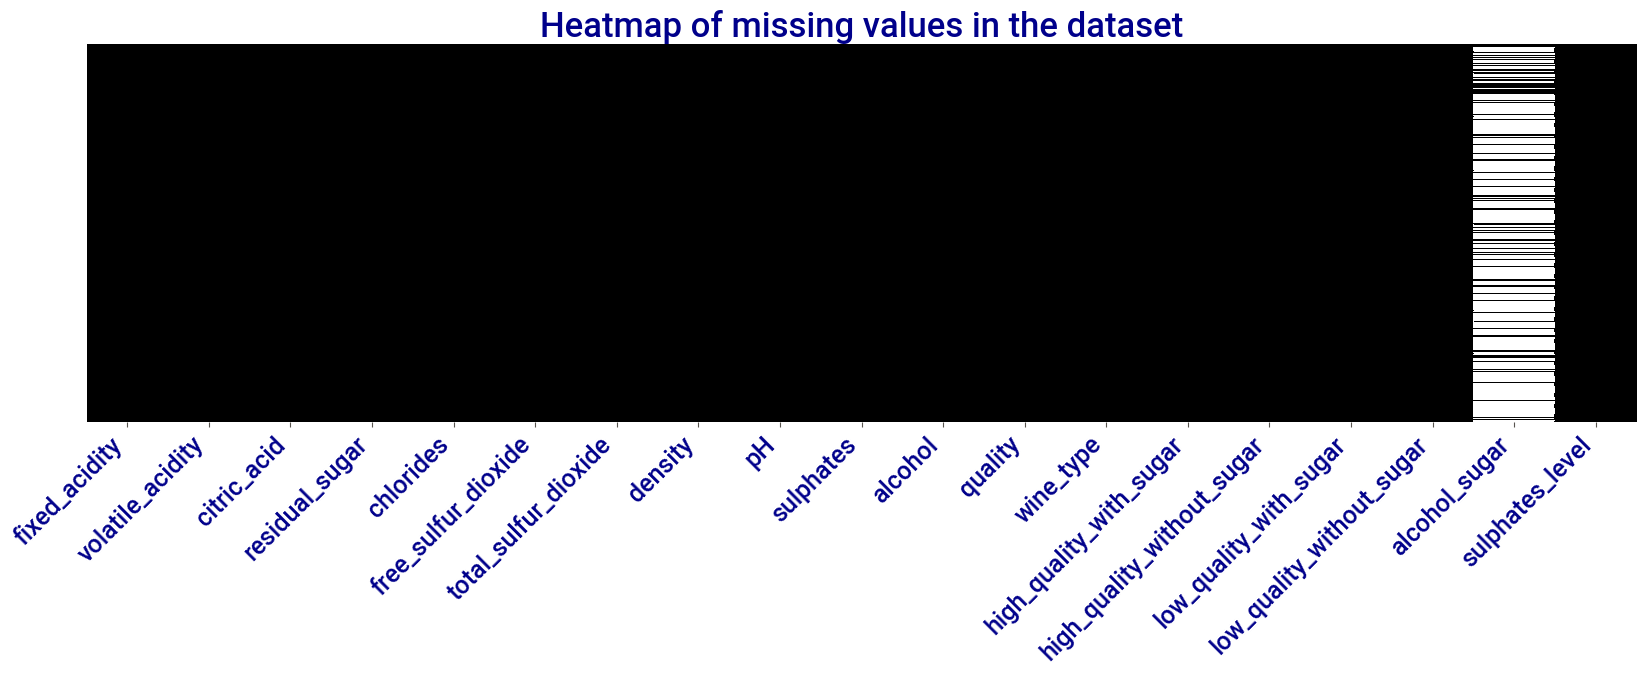

In [21]:
#Heatmap of missing values 
#Size of the plot 
plt.figure(figsize=(20,5))

#Creation of the heatmap 
sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False, 
            cmap="bone").set_title("Heatmap of missing values in the dataset", 
                                   fontsize = 25,
                                   color = "darkblue")

#X-axis descriptions in terms of rotation and size of caption 
plt.xticks(rotation=45, fontsize=18, horizontalalignment="right", color="darkblue")
plt.show()

In [321]:
#Drop of alcohol_sugar column, because > 75% of NaN is definitely too much
data.drop(columns=["alcohol_sugar"], inplace=True)

## 3.9 Outliers - Boxplot, Isolation Forest, Hampel

In [322]:
#Numeric columns from dataset - for boxplots
data_num_col = data.select_dtypes(include=["int64", "float64"])
data_num_col.drop(columns=["index"], inplace=True)
#Numeric columns from dataset without target- for Isolation Forest and Hampel
num_col = [x for x in data_num_col.columns.tolist() if x != "wine_type"]

### Boxplot

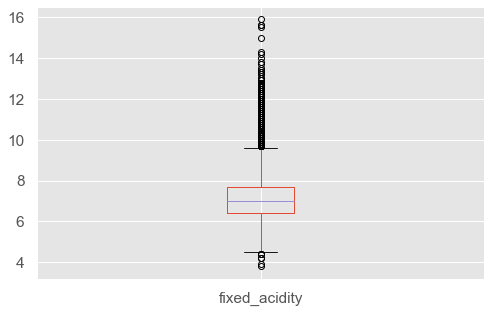

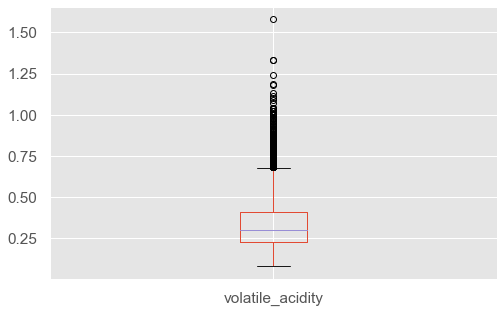

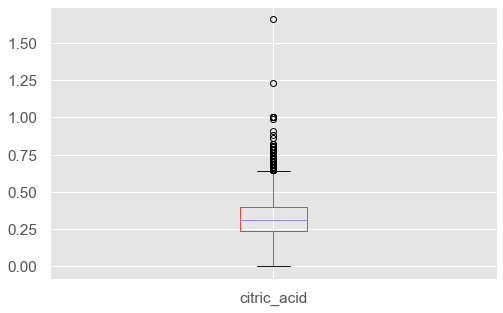

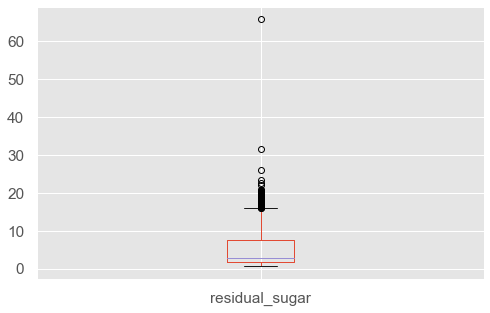

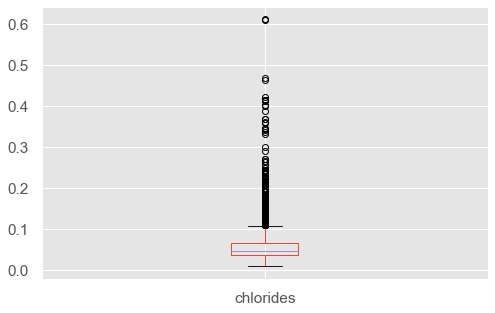

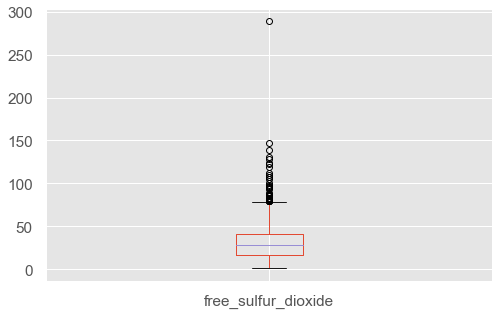

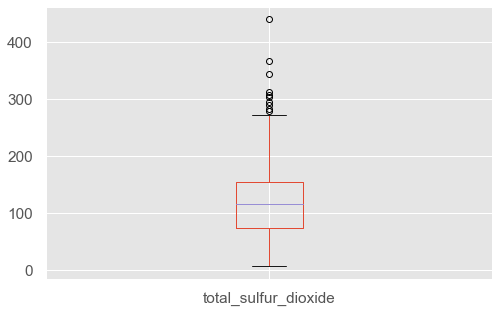

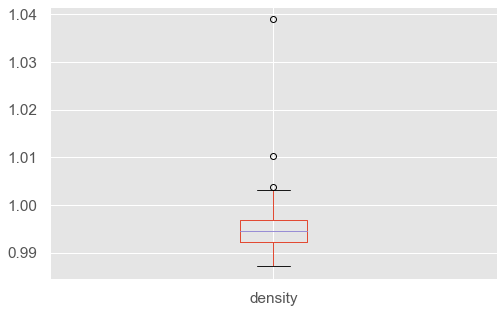

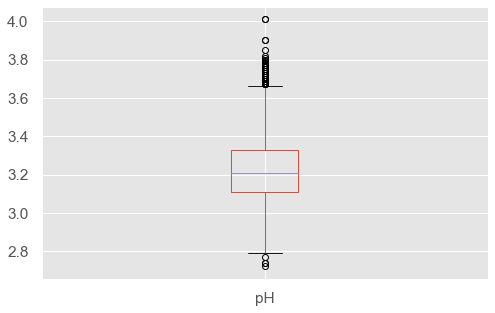

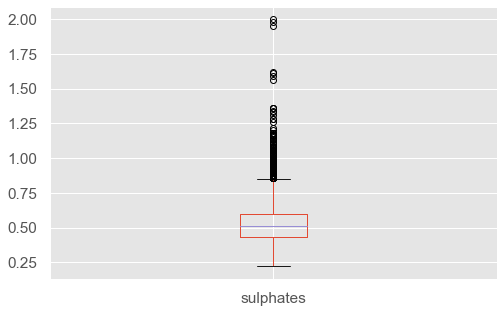

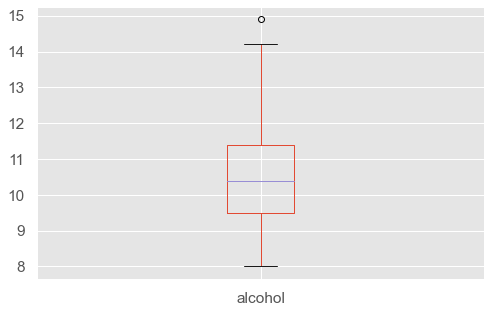

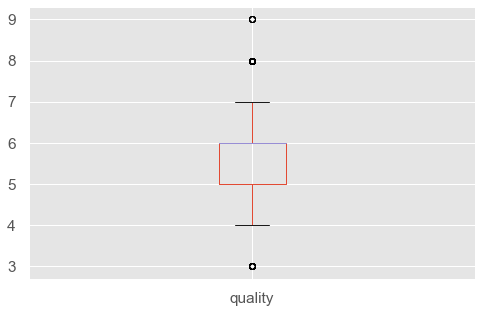

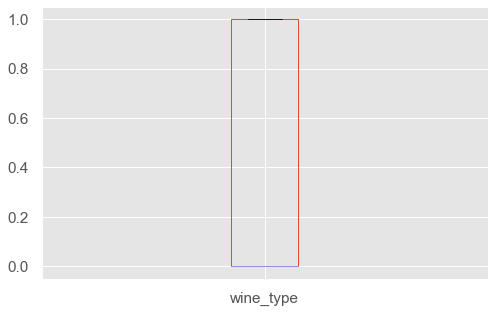

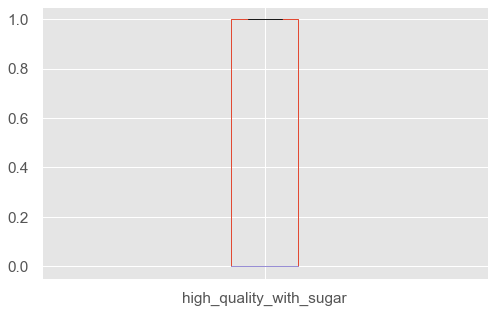

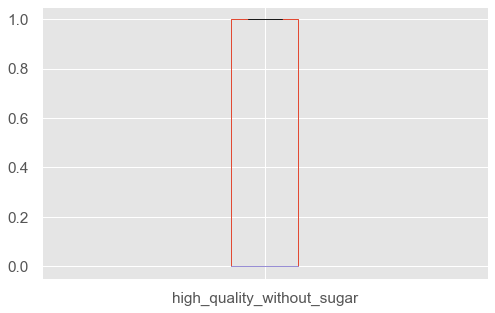

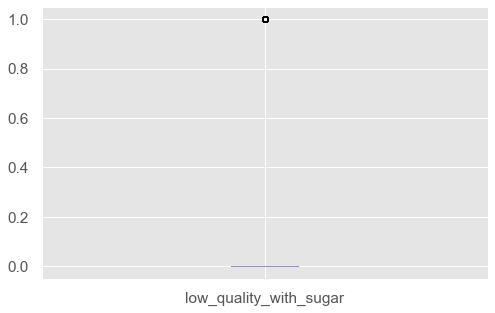

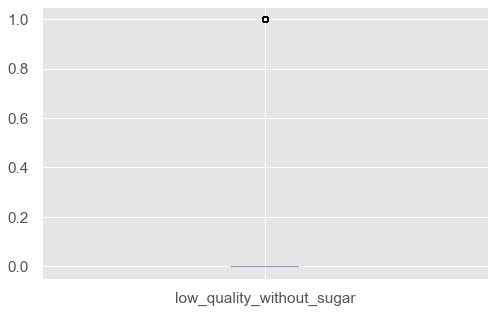

In [323]:
#Boxplots
for column in data_num_col:
    ax = plt.figure(figsize=(8,5))
    data_num_col.boxplot([column])

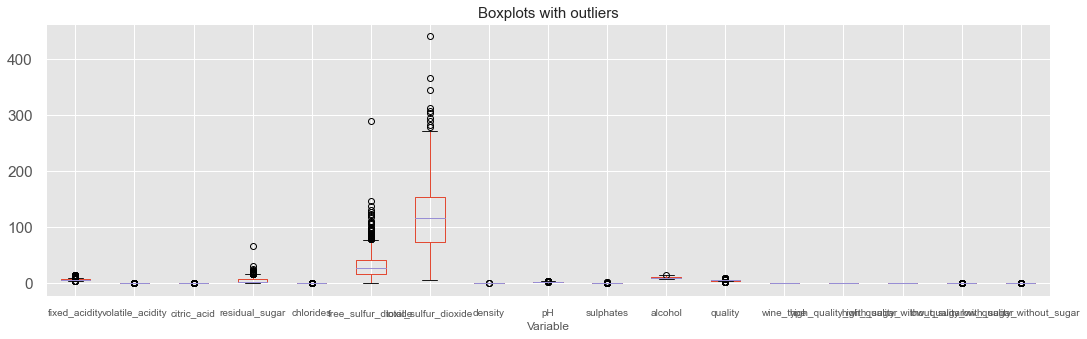

In [324]:
#Boxplots on 1 plot
rcParams["figure.figsize"] = 18,5
data_num_col.plot(kind="box")
plt.title("Boxplots with outliers", fontsize=15)
plt.xlabel("Variable", fontsize = 12)
plt.xticks(fontsize=10)
plt.show()

In [325]:
#Summary of outliers detection by boxplot
print("Based on boxplots there are outliers in following variables:")
print(
"- fixed_acidity""\n"
"- volatile_acidity""\n"
"- citric_acid""\n"
"- residual_sugar""\n"
"- chlorides""\n"
"- free_sulfur_dioxide""\n"
"- total_sulfur_dioxide""\n"
"- density""\n"
"- pH""\n"
"- sulphates""\n"
"- alcohol""\n"
"- quality""\n")

Based on boxplots there are outliers in following variables:
- fixed_acidity
- volatile_acidity
- citric_acid
- residual_sugar
- chlorides
- free_sulfur_dioxide
- total_sulfur_dioxide
- density
- pH
- sulphates
- alcohol
- quality



### Isolation Forest

In [326]:
#Isolation Forest model to find obserwations with outliers
model = IsolationForest(n_estimators=50, max_samples='auto', max_features=1.0)
#Traning of IF model on numeric columns of dataset
model.fit(data[num_col])

#Adding score and animaly columns which show obserwations with outliers in dataset
data["scores"] = model.decision_function(data[num_col])
data["anomaly"] = model.predict(data[num_col])
data

index  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0         0          7.400             0.700        0.000           1.900   
1         1          7.800             0.880        0.000           2.600   
2         2          7.800             0.760        0.040           2.300   
3         3         11.200             0.280        0.560           1.900   
4         5          7.400             0.660        0.000           1.800   
...     ...            ...               ...          ...             ...   
5315   4893          6.200             0.210        0.290           1.600   
5316   4894          6.600             0.320        0.360           8.000   
5317   4895          6.500             0.240        0.190           1.200   
5318   4896          5.500             0.290        0.300           1.100   
5319   4897          6.000             0.210        0.380           0.800   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0         0.076               11.000                34.000    0.998 3.510   
1         0.098               25.000                67.000    0.997 3.200   
2         0.092               15.000                54.000    0.997 3.260   
3         0.075               17.000                60.000    0.998 3.160   
4         0.075               13.000                40.000    0.998 3.510   
...         ...                  ...                   ...      ...   ...   
5315      0.039               24.000                92.000    0.991 3.270   
5316      0.047               57.000               168.000    0.995 3.150   
5317      0.041               30.000               111.000    0.993 2.990   
5318      0.022               20.000               110.000    0.989 3.340   
5319      0.020               22.000                98.000    0.989 3.260   

      ...  alcohol  quality  wine_type  high_quality_with_sugar  \
0     ...    9.400        5          1                        0   
1     ...    9.800        5          1                        0   
2     ...    9.800        5          1                        0   
3     ...    9.800        6          1                        0   
4     ...    9.400        5          1                        0   
...   ...      ...      ...        ...                      ...   
5315  ...   11.200        6          0                        0   
5316  ...    9.600        5          0                        0   
5317  ...    9.400        6          0                        0   
5318  ...   12.800        7          0                        0   
5319  ...   11.800        6          0                        0   

      high_quality_without_sugar  low_quality_with_sugar  \
0                              0                       0   
1                              0                       1   
2                              0                       0   
3                              1                       0   
4                              0                       0   
...                          ...                     ...   
5315                           1                       0   
5316                           0                       1   
5317                           1                       0   
5318                           1                       0   
5319                           1                       0   

      low_quality_without_sugar  sulphates_level scores  anomaly  
0                             1           medium  0.028        1  
1                             0           medium  0.001        1  
2                             1           medium  0.034        1  
3                             0           medium  0.025        1  
4                             1           medium  0.031        1  
...                         ...              ...    ...      ...  
5315                          0              low  0.087        1  
5316                          0              low  0.071        1  
5317                       

In [327]:
#DataFrame with outliers from dataset
outliers = data.loc[data["anomaly"]== - 1]
#Indexes of obserwations with outliers
anomaly_index = outliers.index.tolist()

In [328]:
#Observations with outliers
outliers

index  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
11       13          7.800             0.610        0.290           1.600   
12       14          8.900             0.620        0.180           3.800   
13       15          8.900             0.620        0.190           3.900   
15       17          8.100             0.560        0.280           1.700   
16       18          7.400             0.590        0.080           4.400   
...     ...            ...               ...          ...             ...   
5243   4813          5.800             0.360        0.500           1.000   
5245   4815          6.200             0.760        0.010           3.200   
5265   4839          5.200             0.405        0.150           1.450   
5290   4867          5.300             0.600        0.340           1.400   
5305   4883          4.900             0.470        0.170           1.900   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
11        0.114                9.000                29.000    0.997 3.260   
12        0.176               52.000               145.000    0.999 3.160   
13        0.170               51.000               148.000    0.999 3.170   
15        0.368               16.000                56.000    0.997 3.110   
16        0.086                6.000                29.000    0.997 3.380   
...         ...                  ...                   ...      ...   ...   
5243      0.127               63.000               178.000    0.992 3.100   
5245      0.041               18.000               120.000    0.990 3.200   
5265      0.038               10.000                44.000    0.991 3.520   
5290      0.031                3.000                60.000    0.989 3.270   
5305      0.035               60.000               148.000    0.990 3.270   

      ...  alcohol  quality  wine_type  high_quality_with_sugar  \
11    ...    9.100        5          1                        0   
12    ...    9.200        5          1                        0   
13    ...    9.200        5          1                        0   
15    ...    9.300        5          1                        0   
16    ...    9.000        4          1                        0   
...   ...      ...      ...        ...                      ...   
5243  ...    9.700        5          0                        0   
5245  ...   13.700        7          0                        1   
5265  ...   11.600        4          0                        0   
5290  ...   13.000        6          0                        0   
5305  ...   11.500        6          0                        0   

      high_quality_without_sugar  low_quality_with_sugar  \
11                             0                       0   
12                             0                       1   
13                             0                       1   
15                             0                       0   
16                             0                       1   
...                          ...                     ...   
5243                           0                       0   
5245                           0                       0   
5265                           0                       0   
5290                           1                       0   
5305                           1                       0   

      low_quality_without_sugar  sulphates_level scores  anomaly  
11                            1             high -0.038       -1  
12                            0             high -0.014       -1  
13                            0             high -0.008       -1  
15                            1             high -0.063       -1  
16                            0              low -0.019       -1  
...                         ...              ...    ...      ...  
5243                          1              low -0.003       -1  
5245                          0             high -0.037       -1  
5265                       

In [329]:
#Printing amount of observations with outliers and indexes of observations with outliers
print("Dataset contains:",outliers.shape[0], "observations with outliers.")
print("Outliers are in following indexes:", anomaly_index)

Dataset contains: 687 observations with outliers.
Outliers are in following indexes: [11, 12, 13, 15, 16, 17, 32, 35, 37, 38, 39, 41, 42, 52, 60, 70, 73, 75, 77, 80, 82, 85, 86, 87, 96, 99, 109, 113, 114, 115, 116, 119, 121, 135, 141, 142, 150, 151, 159, 175, 176, 182, 185, 200, 202, 208, 211, 212, 214, 215, 226, 229, 232, 234, 236, 237, 242, 244, 245, 247, 250, 251, 252, 255, 256, 258, 259, 260, 263, 266, 268, 269, 276, 277, 282, 283, 284, 285, 287, 291, 294, 295, 296, 301, 302, 304, 305, 306, 308, 311, 312, 313, 314, 317, 318, 319, 320, 321, 322, 323, 328, 329, 330, 331, 334, 341, 344, 345, 346, 356, 357, 361, 363, 364, 366, 369, 375, 377, 378, 381, 383, 385, 387, 389, 390, 393, 397, 400, 403, 404, 406, 409, 410, 411, 417, 420, 421, 422, 423, 424, 426, 427, 437, 439, 440, 442, 444, 447, 448, 449, 450, 455, 458, 463, 467, 468, 472, 473, 482, 483, 484, 485, 486, 487, 491, 492, 494, 496, 499, 503, 504, 510, 514, 517, 518, 520, 521, 522, 528, 531, 534, 535, 537, 538, 542, 543, 544, 547, 

Removing all observations (above indexes) containing outliers in each column would result in the loss of a lot of information when looking at the number of rows that would need to be removed. Thus, it is more reasonable to use the Hampel method for outliers.

### Hampel

In [330]:
#Hampel method used on variables where are outliers based on boxplots

fixed_acidity_hampel = hampel(data["fixed_acidity"], window_size=2, n=3).to_frame()
volatile_acidity_hampel = hampel(data["volatile_acidity"], window_size=2, n=3).to_frame()
citric_acid_hampel = hampel(data["citric_acid"], window_size=2, n=3).to_frame()
residual_sugar_hampel = hampel(data["residual_sugar"], window_size=2, n=3).to_frame()
chlorides_hampel = hampel(data["chlorides"], window_size=2, n=3).to_frame()
free_sulfur_dioxide_hampel = hampel(data["free_sulfur_dioxide"], window_size=2, n=3).to_frame()
total_sulfur_dioxide_hampel = hampel(data["total_sulfur_dioxide"], window_size=2, n=3).to_frame()
density_hampel = hampel(data["density"], window_size=2, n=3).to_frame()
pH_hampel = hampel(data["pH"], window_size=2, n=3).to_frame()
sulphates_hampel = hampel(data["sulphates"], window_size=2, n=3).to_frame()
alcohol_hampel = hampel(data["alcohol"], window_size=2, n=3).to_frame()
quality_hampel = hampel(data["quality"], window_size=2, n=3).to_frame()

In [331]:
#Dataset with index and target variable - dataset to merge with variables after Hampel method by index
data = data[["wine_type", "high_quality_with_sugar", "high_quality_without_sugar", "low_quality_with_sugar",
             "low_quality_without_sugar", "sulphates_level"]]
data

wine_type  high_quality_with_sugar  high_quality_without_sugar  \
0             1                        0                           0   
1             1                        0                           0   
2             1                        0                           0   
3             1                        0                           1   
4             1                        0                           0   
...         ...                      ...                         ...   
5315          0                        0                           1   
5316          0                        0                           0   
5317          0                        0                           1   
5318          0                        0                           1   
5319          0                        0                           1   

      low_quality_with_sugar  low_quality_without_sugar sulphates_level  
0                          0                          1          medium  
1                          1                          0          medium  
2                          0                          1          medium  
3                          0                          0          medium  
4                          0                          1          medium  
...                      ...                        ...             ...  
5315                       0                          0             low  
5316                       1                          0             low  
5317                       0                          0             low  
5318                       0                          0             low  
5319                       0                          0             low  

[5320 rows x 6 columns]

In [332]:
#Merge of dataset with target and variables after Hampel method by index

df1 = pd.merge(data, fixed_acidity_hampel, left_index=True, right_index=True)
df2 = pd.merge(df1, volatile_acidity_hampel, left_index=True, right_index=True)
df3 = pd.merge(df2, citric_acid_hampel, left_index=True, right_index=True)
df4 = pd.merge(df3, residual_sugar_hampel, left_index=True, right_index=True)
df5 = pd.merge(df4, chlorides_hampel, left_index=True, right_index=True)
df6 = pd.merge(df5, free_sulfur_dioxide_hampel, left_index=True, right_index=True)
df7 = pd.merge(df6, total_sulfur_dioxide_hampel, left_index=True, right_index=True)
df8 = pd.merge(df7, density_hampel, left_index=True, right_index=True)
df9 = pd.merge(df8, pH_hampel, left_index=True, right_index=True)
df10 = pd.merge(df9, sulphates_hampel, left_index=True, right_index=True)
df11 = pd.merge(df10, alcohol_hampel, left_index=True, right_index=True)
df12 = pd.merge(df11, quality_hampel, left_index=True, right_index=True)

#Dataset after used Hampel method on variables with outliers
data= df12.copy()

In [333]:
#Dataset after using Hampel method to change outliers values
data

wine_type  high_quality_with_sugar  high_quality_without_sugar  \
0             1                        0                           0   
1             1                        0                           0   
2             1                        0                           0   
3             1                        0                           1   
4             1                        0                           0   
...         ...                      ...                         ...   
5315          0                        0                           1   
5316          0                        0                           0   
5317          0                        0                           1   
5318          0                        0                           1   
5319          0                        0                           1   

      low_quality_with_sugar  low_quality_without_sugar sulphates_level  \
0                          0                          1          medium   
1                          1                          0          medium   
2                          0                          1          medium   
3                          0                          0          medium   
4                          0                          1          medium   
...                      ...                        ...             ...   
5315                       0                          0             low   
5316                       1                          0             low   
5317                       0                          0             low   
5318                       0                          0             low   
5319                       0                          0             low   

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.400             0.700        0.000           1.900      0.076   
1             7.800             0.880        0.000           2.600      0.098   
2             7.800             0.760        0.040           2.300      0.092   
3             7.800             0.280        0.020           1.900      0.075   
4             7.400             0.660        0.000           1.800      0.075   
...             ...               ...          ...             ...        ...   
5315          6.200             0.210        0.290           1.600      0.039   
5316          6.600             0.235        0.360           1.450      0.047   
5317          6.500             0.240        0.190           1.200      0.041   
5318          5.500             0.290        0.300           1.100      0.022   
5319          6.000             0.210        0.380           0.800      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  11.000                34.000    0.998 3.230      0.560   
1                  25.000                67.000    0.997 3.200      0.680   
2                  15.000                54.000    0.997 3.260      0.650   
3                  17.000                60.000    0.998 3.160      0.580   
4                  13.000                56.500    0.998 3.510      0.560   
...                   ...                   ...      ...   ...        ...   
5315               24.000                92.000    0.991 3.270      0.500   
5316               29.500               111.500    0.995 3.150      0.460   
5317               30.000               111.000    0.993 2.990      0.460   
5318               20.000               110.000    0.989 3.340      0.380   
5319               22.000                98.000    0.989 3.260      0.320   

      alcohol  quality  
0       9.800    5.000  
1       9.800    5.000  
2       9.800    5.000  
3       9.800    5.000  
4       9.400    5.000  
...       ...      ...  
5315   11.200    6.000  
5316    9.600    5.000  
5317    9.400    6.000  
5318   12.800    7.000  
5319   11.800    6.000  

[5320 rows x 18 columns]

## 3.10 Balance of target variable (wine_type)

In [334]:
#Distribution of wine_type (target variable) in percent in the dataset
default_percent_dist = data["wine_type"].value_counts(normalize=True).round(3).to_frame()*100
default_percent_dist["wine_type distribution"] = data["wine_type"].value_counts().round(3).to_frame()
default_percent_dist.columns=["wine_type distribution in %", "wine_type distribution"]
default_percent_dist

wine_type distribution in %  wine_type distribution
0                       74.500                    3961
1                       25.500                    1359

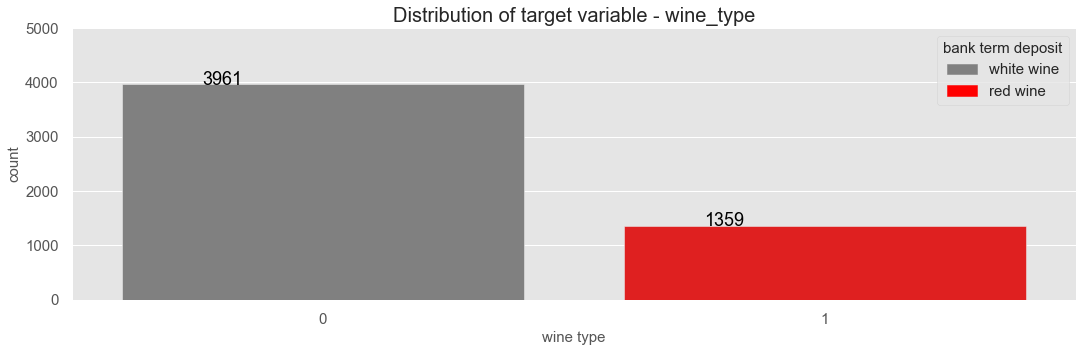

In [335]:
#Distribution of target variable
plt.figure(figsize=(18, 5))
ax=sns.countplot(x="wine_type",
                 data=data,
                 palette = ["grey", "red"])
ax.set_title("Distribution of target variable - wine_type", fontsize=20)
plt.xlabel("wine type",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set(ylim=(0, 5000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                color="black",
                size=18)
    
#Settings of legend
darkcyan_patch = mpatches.Patch(color="grey", label= "white wine")
darkslategray_patch = mpatches.Patch(color="red", label= "red wine")
plt.legend(handles=[darkcyan_patch,
                    darkslategray_patch],
           loc="best",
           prop={"size": 15},
           title="bank term deposit",
           title_fontsize="15",
           frameon=True)
    
plt.show()

## 3.11 Analysis of distribution of explanatory variables - on 5 ways

H0 = the variable comes from a normal distribution
\
H1 = the variable does not come from a normal distribution

Adopted materiality level alpha = 0.05

No variable comes from a normal distribution.

### Histograms

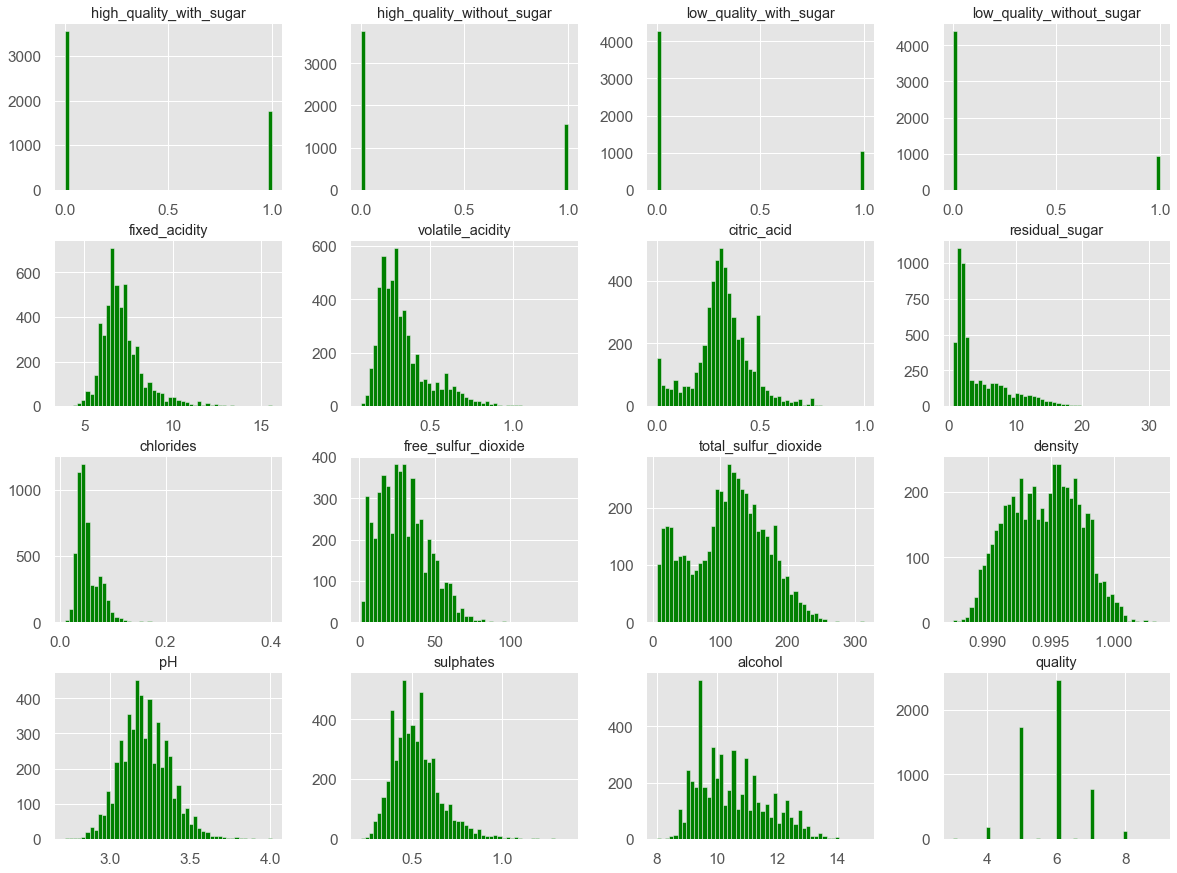

In [336]:
#Columns to histogram (all without target variable)
to_hist = data.loc[:, data.columns != "wine_type"]
#Plot histograms
to_hist.hist(bins=50, figsize=(20,15), color="green")
plt.show()

### Kolmogorov-Smirnov test

Each variables has p-value < 0.05, so need reject H0 in favor of H1, so no variable is normally distributed.

In [337]:
#Kolmogorov-Smirnov normal distirbution test

print("Kolmogorov-Smirnov test:")
print("")
print(kstest(data[["fixed_acidity"]], "norm"))
print(kstest(data[["volatile_acidity"]], "norm"))
print(kstest(data[["citric_acid"]], "norm"))
print(kstest(data[["residual_sugar"]], "norm"))
print(kstest(data[["chlorides"]], "norm"))
print(kstest(data[["free_sulfur_dioxide"]], "norm"))
print(kstest(data[["total_sulfur_dioxide"]], "norm"))
print(kstest(data[["density"]], "norm"))
print(kstest(data[["pH"]], "norm"))
print(kstest(data[["sulphates"]], "norm"))
print(kstest(data[["alcohol"]], "norm"))
print(kstest(data[["quality"]], "norm"))

Kolmogorov-Smirnov test:

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9082408643497193, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.655789938045059, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.8422359706969631, pvalue=0.0)
KstestResult(statistic=0.9999696406260734, pvalue=0.0)
KstestResult(statistic=0.913085038052915, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


### Shapiro-Wilk test

Each variables has p-value < 0.05, so need reject H0 in favor of H1, so no variable is normally distributed.

In [338]:
#Shapiro-Wilk normal distirbution test

print("Shapiro-Wilk test:")
print("")
print(shapiro(data[["fixed_acidity"]]))
print(shapiro(data[["volatile_acidity"]]))
print(shapiro(data[["citric_acid"]]))
print(shapiro(data[["residual_sugar"]]))
print(shapiro(data[["chlorides"]]))
print(shapiro(data[["free_sulfur_dioxide"]]))
print(shapiro(data[["total_sulfur_dioxide"]]))
print(shapiro(data[["density"]]))
print(shapiro(data[["pH"]]))
print(shapiro(data[["sulphates"]]))
print(shapiro(data[["alcohol"]]))
print(shapiro(data[["quality"]]))

Shapiro-Wilk test:

ShapiroResult(statistic=0.8801988363265991, pvalue=0.0)
ShapiroResult(statistic=0.8714951872825623, pvalue=0.0)
ShapiroResult(statistic=0.9716829657554626, pvalue=3.477996261484145e-31)
ShapiroResult(statistic=0.7964221835136414, pvalue=0.0)
ShapiroResult(statistic=0.8027510643005371, pvalue=0.0)
ShapiroResult(statistic=0.9628592729568481, pvalue=6.710190115524023e-35)
ShapiroResult(statistic=0.980732262134552, pvalue=2.739121661856076e-26)
ShapiroResult(statistic=0.9877816438674927, pvalue=4.574423898001533e-21)
ShapiroResult(statistic=0.9929603338241577, pvalue=1.4406398835581e-15)
ShapiroResult(statistic=0.9424290657043457, pvalue=2.2944861054854555e-41)
ShapiroResult(statistic=0.9562358856201172, pvalue=2.971662579435529e-37)
ShapiroResult(statistic=0.8756710886955261, pvalue=0.0)


Loop confirmation that each variables has p-value < 0.05, so need reject H0 in favor of H1, so no variable is normally distributed.

In [339]:
#Shapiro-Wilk normal distirbution test in loop

print("Shapiro-Wilk test:")
print("")

data_numerical = data[list(data.select_dtypes(include=["int64", "float64"]))]
results = []
for feature in data_numerical.columns:
    alpha = 0.05
    p_value = shapiro(data[feature])[1]
    results.append([feature, p_value])
    if(p_value < alpha):
        print("For variable \"" + feature +
              "\" I reject the zero hypothesis.\n The variable DOES NOT HAVE normal distribution. P-value:", p_value)
    else:
        print("For variable \"" + feature +
              "\" no grounds for rejecting the zero hypothesis have been detected. The variable HAS normal distribution. P-value:", p_value)

Shapiro-Wilk test:

For variable "wine_type" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "high_quality_with_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "high_quality_without_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "low_quality_with_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "low_quality_without_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "fixed_acidity" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "volatile_acidity" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "citric_acid" I reject the zero hypothesis.
 The variable DOES NOT HAVE norma

### normal test from Scipy

Each variables has p-value < 0.05, so need reject H0 in favor of H1, so no variable is normally distributed.

In [340]:
#Select numerical variables from the dataset
data_numerical = data[list(data.select_dtypes(include=["int64", "float64"]))]

#Verification of hypotheses
results = []
for feature in data_numerical.columns:
    alpha = 0.05
    p_value = scipy.stats.normaltest(data_numerical[feature])[1]
    results.append([feature, p_value])
    if(p_value < alpha):
        print("For variable \"" + feature +
              "\" I reject the zero hypothesis.\n The variable DOES NOT HAVE normal distribution. P-value:", p_value)
    else:
        print("For variable \"" + feature +
              "\" no grounds for rejecting the zero hypothesis have been detected. The variable HAS normal distribution. P-value:", p_value)

For variable "wine_type" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 3.418711963172467e-237
For variable "high_quality_with_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "high_quality_without_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "low_quality_with_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 7.900175265080449e-249
For variable "low_quality_without_sugar" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 1.828070619367498e-303
For variable "fixed_acidity" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "volatile_acidity" I reject the zero hypothesis.
 The variable DOES NOT HAVE normal distribution. P-value: 0.0
For variable "citric_acid" I reject the zero hypothes

###  kurtosis and skew

Normal distribution parameters should be:

* kurtosis = 0
* skew = 0


Kurtosis is a measure of flattening the decomposition. It tells how flattened (negative values of kurtosis) or bloated (positive values of kurtosis) the distribution of the examined variable is in relation to normal distribution.

Interpretation of skew:

* A factor of 0 is a symmetrical distribution.
* A negative coefficient is a left-sided oblique distribution (elongated left arm of the distribution; mean less than the median).
* A factor with a positive value is a right-hand slanted distribution (elongated right arm of the distribution; mean greater than the median).

In [341]:
#Calculation of kurtosis and skew for each numerical variables by aggregation method
data_numerical.agg(["kurtosis", "skew"]).T

kurtosis   skew
wine_type                     -0.742  1.122
high_quality_with_sugar       -1.493  0.712
high_quality_without_sugar    -1.182  0.905
low_quality_with_sugar         0.300  1.517
low_quality_without_sugar      0.905  1.704
fixed_acidity                  5.040  1.720
volatile_acidity               2.694  1.508
citric_acid                    1.039  0.110
residual_sugar                 1.712  1.486
chlorides                     19.142  2.858
free_sulfur_dioxide            0.624  0.695
total_sulfur_dioxide          -0.593 -0.038
density                       -0.726  0.034
pH                             0.391  0.347
sulphates                      2.512  1.126
alcohol                       -0.479  0.573
quality                        0.338  0.184

According to the assumptions of normal distribution, the mean value and the median should be very close (preferably equal) to each other. Then there is a chance to suspect the distribution of the variable of lack of diagonality.

Differences in values show that distribution is skewed:

* mean < median --> left oblique distribution (elongated left arm of distribution)
* mean > median --> right oblique distribution (elongated right arm of distribution)

In [342]:
#Calculation of mean and median for each numerical variables by aggregation method
data_numerical.agg(["mean", "median"]).T

mean  median
wine_type                    0.255   0.000
high_quality_with_sugar      0.332   0.000
high_quality_without_sugar   0.294   0.000
low_quality_with_sugar       0.198   0.000
low_quality_without_sugar    0.176   0.000
fixed_acidity                7.175   6.900
volatile_acidity             0.335   0.290
citric_acid                  0.314   0.310
residual_sugar               4.617   2.500
chlorides                    0.053   0.046
free_sulfur_dioxide         29.293  27.500
total_sulfur_dioxide       112.642 116.000
density                      0.994   0.995
pH                           3.221   3.210
sulphates                    0.524   0.510
alcohol                     10.506  10.300
quality                      5.786   6.000

# 4. Data visualization

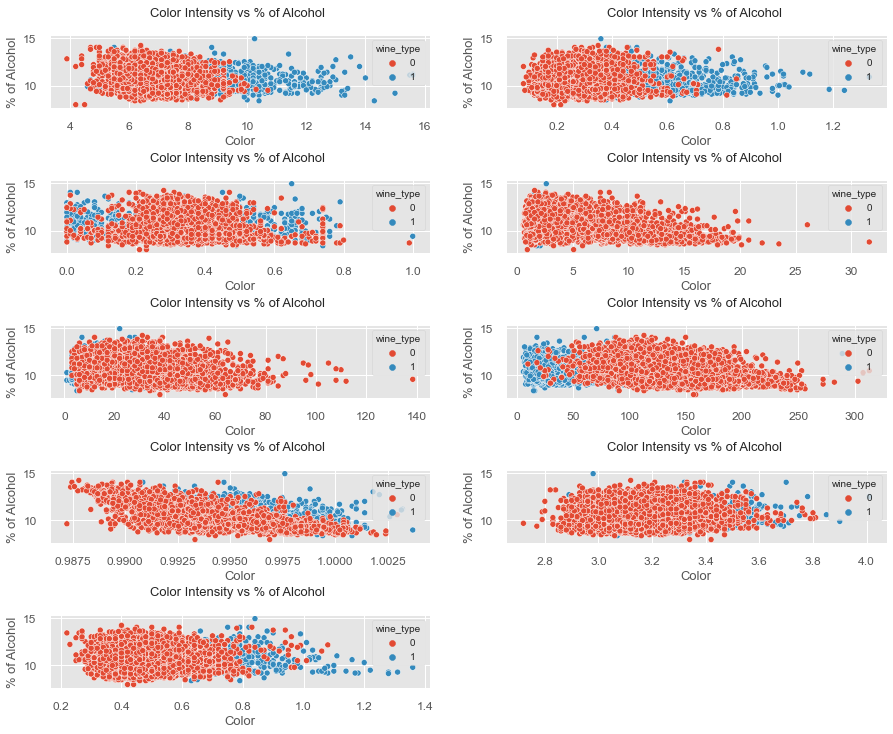

In [343]:
#Scatter plots of variables to compare alcohol strength with other features of wines
plt.figure(figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.0)

subplot(5,2,1)
sns.scatterplot(data=data,x='fixed_acidity',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,2)
sns.scatterplot(data=data,x='volatile_acidity',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,3)
sns.scatterplot(data=data,x='citric_acid',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,4)
sns.scatterplot(data=data,x='residual_sugar',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,5)
sns.scatterplot(data=data,x='free_sulfur_dioxide',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,6)
sns.scatterplot(data=data,x='total_sulfur_dioxide',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,7)
sns.scatterplot(data=data,x='density',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,8)
sns.scatterplot(data=data,x='pH',y='alcohol',hue='wine_type',legend='full')
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

subplot(5,2,9)
sns.scatterplot(data=data,x='sulphates',y='alcohol',hue='wine_type',legend="full")
plt.title('Color Intensity vs % of Alcohol \n' ,fontsize=13)
plt.xlabel('Color',fontsize=13)
plt.ylabel('% of Alcohol',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",
           prop={"size": 10},
           title="wine_type",
           title_fontsize="10",
           frameon=True)

plt.show()

# 5. Dummy coding

In [344]:
#Categorical columns without target variable
categorical_columns = [x for x in data.select_dtypes(include=["object"]).columns.tolist() if x != "wine_type"]
categorical_columns

['sulphates_level']

In [345]:
#Unique values of categorical variable - levels of variable
print(data["sulphates_level"].unique())

['medium' 'low' 'high' 'minimum']


In [346]:
#Dummy coding of "sulphates_level" 
data=pd.get_dummies(data,
                    columns=categorical_columns,
                    drop_first=True) #parameter = True, so as to avoid collinearity

In [347]:
#Dataset after dummy coding
data

wine_type  high_quality_with_sugar  high_quality_without_sugar  \
0             1                        0                           0   
1             1                        0                           0   
2             1                        0                           0   
3             1                        0                           1   
4             1                        0                           0   
...         ...                      ...                         ...   
5315          0                        0                           1   
5316          0                        0                           0   
5317          0                        0                           1   
5318          0                        0                           1   
5319          0                        0                           1   

      low_quality_with_sugar  low_quality_without_sugar  fixed_acidity  \
0                          0                          1          7.400   
1                          1                          0          7.800   
2                          0                          1          7.800   
3                          0                          0          7.800   
4                          0                          1          7.400   
...                      ...                        ...            ...   
5315                       0                          0          6.200   
5316                       1                          0          6.600   
5317                       0                          0          6.500   
5318                       0                          0          5.500   
5319                       0                          0          6.000   

      volatile_acidity  citric_acid  residual_sugar  chlorides  \
0                0.700        0.000           1.900      0.076   
1                0.880        0.000           2.600      0.098   
2                0.760        0.040           2.300      0.092   
3                0.280        0.020           1.900      0.075   
4                0.660        0.000           1.800      0.075   
...                ...          ...             ...        ...   
5315             0.210        0.290           1.600      0.039   
5316             0.235        0.360           1.450      0.047   
5317             0.240        0.190           1.200      0.041   
5318             0.290        0.300           1.100      0.022   
5319             0.210        0.380           0.800      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  11.000                34.000    0.998 3.230      0.560   
1                  25.000                67.000    0.997 3.200      0.680   
2                  15.000                54.000    0.997 3.260      0.650   
3                  17.000                60.000    0.998 3.160      0.580   
4                  13.000                56.500    0.998 3.510      0.560   
...                   ...                   ...      ...   ...        ...   
5315               24.000                92.000    0.991 3.270      0.500   
5316               29.500               111.500    0.995 3.150      0.460   
5317               30.000               111.000    0.993 2.990      0.460   
5318               20.000               110.000    0.989 3.340      0.380   
5319               22.000                98.000    0.989 3.260      0.320   

      alcohol  quality  sulphates_level_low  sulphates_level_medium  \
0       9.800    5.000                    0                       1   
1       9.800    5.000                    0                       1   
2       9.800    5.000                    0                       1   
3       9.800    5.000                    0                       1   
4       9.400    5.000                    0                       1   
...       ...      ...                  ...                     ...   
5315   11.200    6.000               

## 6. Data Selection

Finally, because of small dataset, as a data selection were used only CORR and VIF methods.

## 6.1 CORR - Correlation - Pearson / Spearman

### Correlation between target and independent variables

In [348]:
#Pearson correlation
corr_pearson = data.corr(method="pearson").abs()[["wine_type"]].sort_values(by="wine_type", ascending=False)
corr_pearson.rename(columns={"wine_type" : "wine_type_corr_pearson"}, inplace=True)

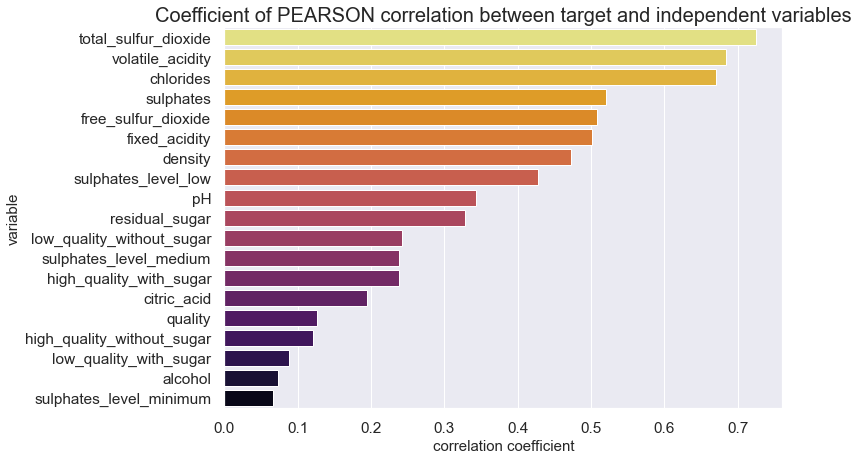

In [349]:
correlation_matrix = pd.DataFrame(np.abs( data.corr(method="pearson")), columns = data.columns, index = data.columns)
correlation_matrix.drop("wine_type", axis = 0, inplace = True)
correlation_matrix.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.barplot(data = correlation_matrix.sort_values('wine_type', ascending=False),
            x = 'wine_type',
            y = 'index',
            palette = "inferno_r")
plt.title("Coefficient of PEARSON correlation between target and independent variables", fontsize=20)
plt.xlabel("correlation coefficient", fontsize=15)
plt.ylabel("variable", fontsize=15)
plt.show()

In [350]:
#Spearman correlation
corr_spearman = data.corr(method="spearman").abs()[["wine_type"]].sort_values(by="wine_type", ascending=False)
corr_spearman.rename(columns={"wine_type" : "wine_type_corr_spearman"}, inplace=True)

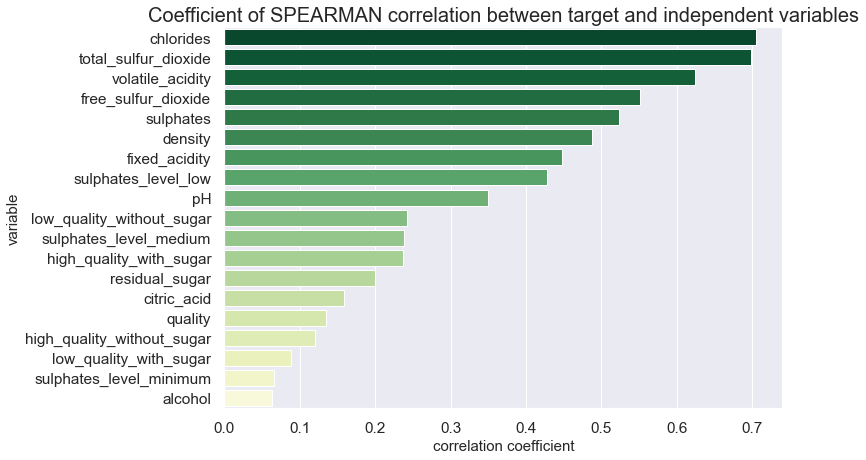

In [351]:
correlation_matrix = pd.DataFrame(np.abs(data.corr(method="spearman")), columns = data.columns, index = data.columns)
correlation_matrix.drop('wine_type', axis = 0, inplace = True)
correlation_matrix.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.barplot(data = correlation_matrix.sort_values('wine_type', ascending=False),
            x = 'wine_type',
            y = 'index',
            palette = 'YlGn_r')
plt.title("Coefficient of SPEARMAN correlation between target and independent variables", fontsize=20)
plt.xlabel("correlation coefficient", fontsize=15)
plt.ylabel("variable", fontsize=15)
plt.show()

In [352]:
#Merge of correlations data frames
corr_merge=pd.merge(corr_pearson,corr_spearman,left_index=True,right_index=True).sort_values(by=["wine_type_corr_spearman",
                                                                                                 "wine_type_corr_pearson"],
                                                                                                 ascending=False)
corr_merge

wine_type_corr_pearson  wine_type_corr_spearman
wine_type                                    1.000                    1.000
chlorides                                    0.670                    0.705
total_sulfur_dioxide                         0.725                    0.698
volatile_acidity                             0.685                    0.624
free_sulfur_dioxide                          0.509                    0.551
sulphates                                    0.520                    0.523
density                                      0.473                    0.487
fixed_acidity                                0.502                    0.448
sulphates_level_low                          0.428                    0.428
pH                                           0.344                    0.350
low_quality_without_sugar                    0.243                    0.243
sulphates_level_medium                       0.238                    0.238
high_quality_with_sugar                      0.238                    0.238
residual_sugar                               0.328                    0.199
citric_acid                                  0.194                    0.159
quality                                      0.126                    0.134
high_quality_without_sugar                   0.121                    0.121
low_quality_with_sugar                       0.089                    0.089
sulphates_level_minimum                      0.066                    0.066
alcohol                                      0.073                    0.063

In [353]:
#Highest corr with target - Spearman corr does not need normal distribution (in contrast to Pearson), so in this dataset
#Spearman is preferable CORR to use
corr_treshold = 0.70
high_corr = corr_merge[corr_merge["wine_type_corr_spearman"] > corr_treshold][["wine_type_corr_spearman"]].index.tolist()
corr_to_drop = [column for column in high_corr if column != "wine_type"]
corr_to_drop

['chlorides']

In [354]:
#Drop column with too high correlation with target
data.drop(columns=corr_to_drop, inplace=True)

### Correlation between independent variables

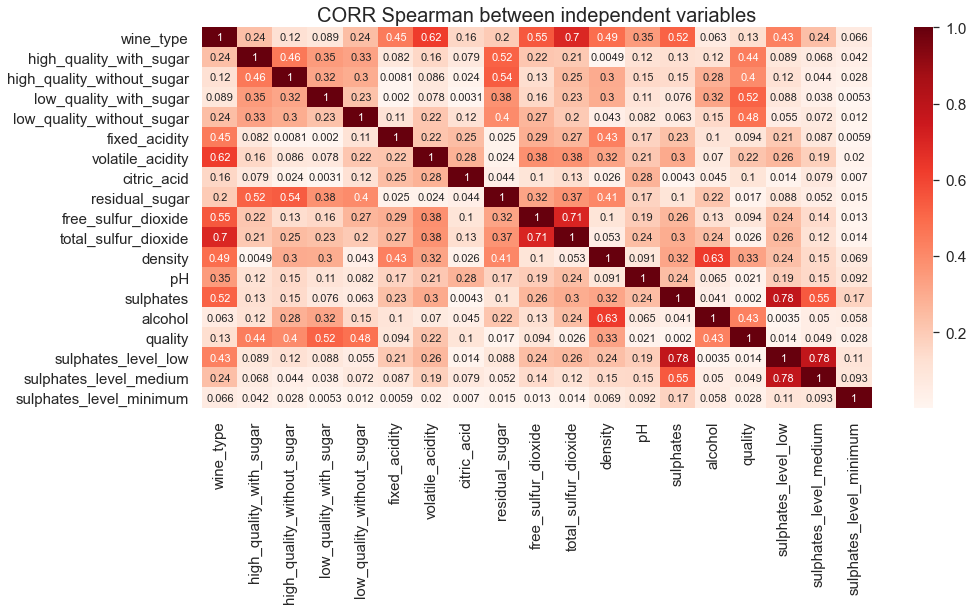

In [355]:
#Heatmap of correlations - as above in this dataset Spearman corr is preferable
plt.figure (figsize = (15,7)) 
cor = data.corr(method="spearman").abs()
sns.heatmap (cor, annot = True, annot_kws={"size": 11}, cmap = plt.cm.Reds) 
plt.title("CORR Spearman between independent variables", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

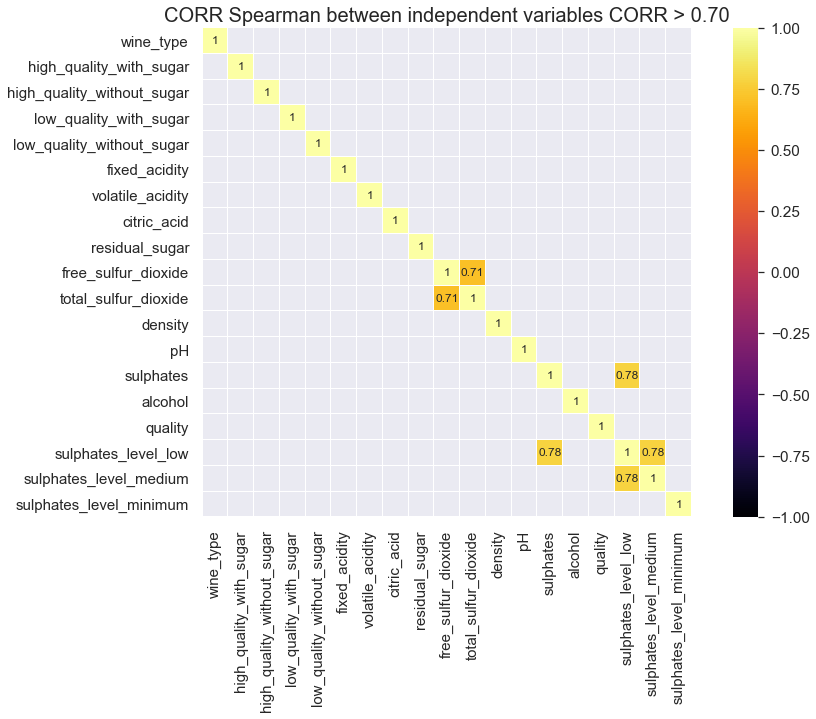

In [356]:
#Spearman correlation between independent variables, where CORR > 0.70
corr = data.corr(method="spearman").abs() 
plt.figure(figsize=(15, 9))

sns.heatmap(corr[(corr >= 0.7)], 
            cmap='inferno', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True)
plt.title("CORR Spearman between independent variables CORR > 0.70", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [357]:
#Columns to drop afret checking CORR between independent varaibles:

#free_sulfur_dioxide - high correlated (0.71) with total_sulfur_dioxide, but total_sulfur_dioxide higher correlated
#with target (but not > 0.70 correlated with target)

#sulphates_level_low - high correlated (0.71) with sulphates, but sulphates higher correlated
#with target (but not > 0.70 correlated with target), moreover sulphates_level_low also
#high correlated with sulphates_level_medium

#Data before drop - will use on the next cell
data_before_drop = [column for column in data.columns.tolist() if column != "wine_type"]
#Dropping high correlated variables (with other independent variables)
data.drop(columns=["free_sulfur_dioxide", "sulphates_level_low"], inplace=True)

In [358]:
#Column selected by IV
CORR_selected_features = [column for column in data if column != "wine_type"]
all_columns = data_before_drop
do_not_selected_CORR = [x for x in all_columns if x not in CORR_selected_features]

print("Features selected by CORR:", CORR_selected_features)
print("Number of selected features:", len(CORR_selected_features))
print()
print("Features do not selected:", do_not_selected_CORR)
print("Number of do not selected feature:", len(do_not_selected_CORR))

Features selected by CORR: ['high_quality_with_sugar', 'high_quality_without_sugar', 'low_quality_with_sugar', 'low_quality_without_sugar', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'sulphates_level_medium', 'sulphates_level_minimum']
Number of selected features: 16

Features do not selected: ['free_sulfur_dioxide', 'sulphates_level_low']
Number of do not selected feature: 2


## 6.2 Variance Inflation Factor (VIF)

VIF - factor that assesses the degree of collinearity between explanatory variables in statistical models

If the VIF is between 5–10, multicollinearity is likely present and it should be consider to drop the variable.
\
If VIF>10 there is a strong collinearity of explanatory variables, it should be removed from the dataset.

In [359]:
#Data Frame with column to VIF calculation
cols_to_VIF = data.loc[:, data.columns != "wine_type"]

In [360]:
#Option 1 - VIF calculation by created function
#Function to calculate VIF indicator for selected seatures
def calculation_VIF(X):
    """
    Building DataFrame with fetures selected to model (parameter X)
    and calculating of VIF indicator for them.
    """
    vif = pd.DataFrame()
    vif["DF_features"] = cols_to_VIF.columns
    vif["VIF"] = [variance_inflation_factor(cols_to_VIF.values, i) for i in range(cols_to_VIF.shape[1])]
    vif["VIF"] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False).set_index("DF_features")
    return(vif)

#Activation of function to calculate VIF for selected features
calculation_VIF(cols_to_VIF)

VIF
DF_features                          
high_quality_with_sugar    203472.170
high_quality_without_sugar 179854.800
low_quality_with_sugar     121210.840
low_quality_without_sugar  107505.740
density                         5.040
residual_sugar                  2.810
alcohol                         2.540
fixed_acidity                   2.470
quality                         2.380
total_sulfur_dioxide            1.950
volatile_acidity                1.890
citric_acid                     1.550
pH                              1.550
sulphates                       1.540
sulphates_level_medium          1.160
sulphates_level_minimum         1.050

In [361]:
#Option 2 - VIF calculation by function from statsmodels library
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["DF_features"] = cols_to_VIF.columns 
#Adding column with VIF
vif_data["VIF"] = [variance_inflation_factor(cols_to_VIF.values, i) 
                          for i in range(len(cols_to_VIF.columns))] 

vif_data = vif_data.sort_values(by="VIF", ascending=False).set_index("DF_features")
vif_data

VIF
DF_features                          
high_quality_with_sugar    203472.166
high_quality_without_sugar 179854.796
low_quality_with_sugar     121210.839
low_quality_without_sugar  107505.744
density                         5.037
residual_sugar                  2.811
alcohol                         2.537
fixed_acidity                   2.468
quality                         2.378
total_sulfur_dioxide            1.951
volatile_acidity                1.886
citric_acid                     1.554
pH                              1.546
sulphates                       1.537
sulphates_level_medium          1.161
sulphates_level_minimum         1.047

In [362]:
#Drop variables with too high VIF factor
data.drop(columns=vif_data[vif_data["VIF"]>10].index.tolist(), inplace=True)

In [363]:
#Column selected by IV
VIF_selected_features = vif_data[vif_data["VIF"] < 10].index.tolist()
do_not_selected_IV = vif_data[vif_data["VIF"] > 10].index.tolist()

print("Features selected by IV:", VIF_selected_features)
print("Number of selected features:", len(VIF_selected_features))
print()
print("Features do not selected:", do_not_selected_IV)
print("Number of do not selected feature:", len(do_not_selected_IV))

Features selected by IV: ['density', 'residual_sugar', 'alcohol', 'fixed_acidity', 'quality', 'total_sulfur_dioxide', 'volatile_acidity', 'citric_acid', 'pH', 'sulphates', 'sulphates_level_medium', 'sulphates_level_minimum']
Number of selected features: 12

Features do not selected: ['high_quality_with_sugar', 'high_quality_without_sugar', 'low_quality_with_sugar', 'low_quality_without_sugar']
Number of do not selected feature: 4


## 6.3 Information Value (IV)

Variables were selected based on IV determining the predictive power of each variable.
Unfortunately it was not possible to find any library with a ready-made method of determining IV indicator, so the function was made with help of Stackoverflow.com.

* <0.02 - useless for prediction
* 0.02 to 0.1 - weak predictor
* 0.1 to 0.3 - medium predictor
* 0.3 - 0.5 - strong predictor

larger than 0.5 - suspicious or too good to be true

Only variables selected for the model were those that are medium or strong predictors.

In [364]:
#Function for calculation of IV and WOE
def iv_woe_calculation(data, target, bins=10):
    """
    WoE and IV calculation function based on dataset and target value - default.
    """
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in "bifc") and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates="drop")
            d0 = pd.DataFrame({"x": binned_x, "y": data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], "y": data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ["Cutoff", "N", "Events"]
        d["% of Events"] = np.maximum(d["Events"], 0.5) / d["Events"].sum()
        d['Non-Events'] = d["N"] - d["Events"]
        d["% of Non-Events"] = np.maximum(d["Non-Events"], 0.5) / d["Non-Events"].sum()
        d["WoE"] = np.log(d["% of Events"]/d["% of Non-Events"])
        d["IV"] = d["WoE"] * (d["% of Events"] - d["% of Non-Events"])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d["IV"].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d["IV"].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

In [365]:
#Activation of the function to calculate IV for each variable
iv_woe_calculation(data,"wine_type", bins=10)

Information value of fixed_acidity is 1.460847
Information value of volatile_acidity is 3.341407
Information value of citric_acid is 1.275306
Information value of residual_sugar is 3.189856
Information value of total_sulfur_dioxide is 5.734367
Information value of density is 2.302804
Information value of pH is 0.724301
Information value of sulphates is 2.244927
Information value of alcohol is 0.142753
Information value of quality is 0.115197
Information value of sulphates_level_medium is 0.295211
Information value of sulphates_level_minimum is 0.063632


In [366]:
#Column selected by IV
IV_selected_features = ["high_quality_with_sugar", "low_quality_without_sugar", "sulphates_level_medium"]
all_columns = [column for column in data.columns.tolist() if column != "wine_type"]
do_not_selected_IV = [x for x in all_columns if x not in IV_selected_features]

print("Features selected by IV:", IV_selected_features)
print("Number of selected features:", len(IV_selected_features))
print()
print("Features do not selected:", do_not_selected_IV)
print("Number of do not selected feature:", len(do_not_selected_IV))

Features selected by IV: ['high_quality_with_sugar', 'low_quality_without_sugar', 'sulphates_level_medium']
Number of selected features: 3

Features do not selected: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'sulphates_level_minimum']
Number of do not selected feature: 11


## 6.4 Sequential feature selection - Forward / Stepwise

### Forward selection

In [367]:
#Train / Test split
X_forward = data.drop(labels=["wine_type"], axis=1)
y_forward = data["wine_type"]
X_train,X_test,y_train,y_test = train_test_split(X_forward, y_forward, train_size=0.6, test_size=0.4,random_state=10)

#Build RF classifier to use in feature selection
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

#Build step forward feature selection
forward_selection = sfs(classifier,
                        k_features="best",
                        forward=True,
                        floating=False,
                        verbose=0,
                        scoring='accuracy',
                        cv=5)

#Perform selection
forward_selection = forward_selection.fit(X_train, y_train)
##Indexes of selected variables
forward_features_selected = list(forward_selection.k_feature_idx_)

In [368]:
#Selected columns names
forward_selected_features = X_train.iloc[:,forward_features_selected].columns.tolist()
all_columns = [column for column in data.columns.tolist() if column != "wine_type"]
do_not_selected_forward = [x for x in all_columns if x not in forward_selected_features]

print("Features selected by FORWARD method:", forward_selected_features)
print("Number of selected features:", len(forward_selected_features))
print()
print("Features do not selected:", do_not_selected_forward)
print("Number of do not selected feature:", len(do_not_selected_forward))

Features selected by FORWARD method: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Number of selected features: 10

Features do not selected: ['sulphates_level_medium', 'sulphates_level_minimum']
Number of do not selected feature: 2


### Backward selection

In [369]:
#Train / Test split
X_backward = data.drop(labels=["wine_type"], axis=1)
y_backward = data["wine_type"]
X_train,X_test,y_train,y_test = train_test_split(X_backward, y_backward, train_size=0.6, test_size=0.4,random_state=10)

#Build RF classifier to use in feature selection
classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)

#Build step forward feature selection
backward_selection = sfs(classifier,
                        k_features="best",
                        forward=False,
                        floating=False,
                        verbose=0,
                        scoring='accuracy',
                        cv=5)

#Perform selection
backward_selection = backward_selection.fit(X_train, y_train)
#Indexes of selected variables
backward_features_selected = list(backward_selection.k_feature_idx_)

In [370]:
#Selected columns names
backward_selected_features = X_train.iloc[:,backward_features_selected].columns.tolist()
all_columns = [column for column in data.columns.tolist() if column != "wine_type"]
do_not_selected_backward = [x for x in all_columns if x not in backward_selected_features]

print("Features selected by FORWARD method:", backward_selected_features)
print("Number of selected features:", len(backward_selected_features))
print()
print("Features do not selected:", do_not_selected_backward)
print("Number of do not selected feature:", len(do_not_selected_backward))

Features selected by FORWARD method: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'quality', 'sulphates_level_medium']
Number of selected features: 10

Features do not selected: ['alcohol', 'sulphates_level_minimum']
Number of do not selected feature: 2


## 6.5 TREE

In [371]:
#Fit an Extra Trees model to the data
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(criterion="gini")
model.fit(X = data.drop(labels=["wine_type"], axis=1), y = data["wine_type"])
#Display the relative importance of each attribute
print(model.feature_importances_)

[0.08952319 0.17208515 0.04606284 0.08162905 0.30611802 0.12108697
 0.03798332 0.08151629 0.01847213 0.01035335 0.03404295 0.00112674]


In [372]:
#DataFrame of futures importance
importances_TREE = pd.DataFrame({"Feature":data.drop(labels=["wine_type"], axis=1).columns,
                                          "Importance":np.round(model.feature_importances_,3)})
importances_TREE = importances_TREE.sort_values("Importance",ascending=False).set_index("Feature")
importances_TREE

Importance
Feature                            
total_sulfur_dioxide          0.306
volatile_acidity              0.172
density                       0.121
fixed_acidity                 0.090
residual_sugar                0.082
sulphates                     0.082
citric_acid                   0.046
pH                            0.038
sulphates_level_medium        0.034
alcohol                       0.018
quality                       0.010
sulphates_level_minimum       0.001

In [373]:
#The most important features based on TREE
importances_TREE.index.tolist()

['total_sulfur_dioxide',
 'volatile_acidity',
 'density',
 'fixed_acidity',
 'residual_sugar',
 'sulphates',
 'citric_acid',
 'pH',
 'sulphates_level_medium',
 'alcohol',
 'quality',
 'sulphates_level_minimum']

In [374]:
#Selected columns names
TREE_selected_features = importances_TREE.head(12).index.tolist()
all_columns = [column for column in data.columns.tolist() if column != "wine_type"]
do_not_selected_TREE = [x for x in all_columns if x not in TREE_selected_features]

print("Features selected by TREE method:", TREE_selected_features)
print("Number of selected features:", len(TREE_selected_features))
print()
print("Features do not selected:", do_not_selected_TREE)
print("Number of do not selected feature:", len(do_not_selected_TREE))

Features selected by TREE method: ['total_sulfur_dioxide', 'volatile_acidity', 'density', 'fixed_acidity', 'residual_sugar', 'sulphates', 'citric_acid', 'pH', 'sulphates_level_medium', 'alcohol', 'quality', 'sulphates_level_minimum']
Number of selected features: 12

Features do not selected: []
Number of do not selected feature: 0


## 6.6 Recursive Feature Elimination (RFE)

In [375]:
#Create the RFE model and select 3 attributes
rfe = RFE(estimator = RandomForestClassifier(),
          n_features_to_select = 7,
          verbose=0)
rfe = rfe.fit(X = data.drop(labels=["wine_type"], axis=1), y = data["wine_type"])
rfe_support = rfe.get_support()
#rfe_feature = X.loc[:,rfe_support].columns.tolist()

#Summarize the selection of the attributes
#print(data.drop(labels=["wine_type"], axis=1).columns.tolist())
print(rfe.support_)
print(rfe.ranking_)
#print("Selected feature:", rfe_feature)

[ True  True  True  True  True  True False  True False False False False]
[1 1 1 1 1 1 2 1 3 4 5 6]


In [376]:
RFE_results = pd.DataFrame({"Variable" : data.drop(labels=["wine_type"], axis=1).columns.tolist(), 
                            "RFE support - is it selected? [T/F]" : rfe.support_,
                            "RFE ranking - if 1 then selected" : rfe.ranking_}).set_index("Variable")
RFE_results

RFE support - is it selected? [T/F]  \
Variable                                                       
fixed_acidity                                           True   
volatile_acidity                                        True   
citric_acid                                             True   
residual_sugar                                          True   
total_sulfur_dioxide                                    True   
density                                                 True   
pH                                                     False   
sulphates                                               True   
alcohol                                                False   
quality                                                False   
sulphates_level_medium                                 False   
sulphates_level_minimum                                False   

                         RFE ranking - if 1 then selected  
Variable                                                   
fixed_acidity                                           1  
volatile_acidity                                        1  
citric_acid                                             1  
residual_sugar                                          1  
total_sulfur_dioxide                                    1  
density                                                 1  
pH                                                      2  
sulphates                                               1  
alcohol                                                 3  
quality                                                 4  
sulphates_level_medium                                  5  
sulphates_level_minimum                                 6

In [377]:
#Variables selected by RFE (12)
features_selected_RFE = RFE_results[RFE_results["RFE ranking - if 1 then selected"]==1].index.tolist()
features_selected_RFE

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'total_sulfur_dioxide',
 'density',
 'sulphates']

In [378]:
#Selected columns names
RFE_selected_features = features_selected_RFE
all_columns = [column for column in data.columns.tolist() if column != "wine_type"]
do_not_selected_RFE = [x for x in all_columns if x not in RFE_selected_features]

print("Features selected by RFE method:", RFE_selected_features)
print("Number of selected features:", len(RFE_selected_features))
print()
print("Features do not selected:", do_not_selected_RFE)
print("Number of do not selected feature:", len(do_not_selected_RFE))

Features selected by RFE method: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide', 'density', 'sulphates']
Number of selected features: 7

Features do not selected: ['pH', 'alcohol', 'quality', 'sulphates_level_medium', 'sulphates_level_minimum']
Number of do not selected feature: 5


## 6.7 Summary of features selection

In [379]:
#Lists of features selected by different feature selection methods
CORR = CORR_selected_features
IV = IV_selected_features
FORWARD = forward_selected_features
BACKWARD = backward_selected_features 
TREE = TREE_selected_features
RFE = RFE_selected_features

print("Features selected after CORR:", CORR)
print("*" * 127)
print("Features selected after IV:", IV)
print("*" * 127)
print("Features selected after FORWARD:", FORWARD)
print("*" * 127)
print("Features selected after BACKWARD:", BACKWARD)
print("*" * 127)
print("Features selected after TREE:", TREE)
print("*" * 127)
print("Features selected after RFE:", RFE)

Features selected after CORR: ['high_quality_with_sugar', 'high_quality_without_sugar', 'low_quality_with_sugar', 'low_quality_without_sugar', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'sulphates_level_medium', 'sulphates_level_minimum']
*******************************************************************************************************************************
Features selected after IV: ['high_quality_with_sugar', 'low_quality_without_sugar', 'sulphates_level_medium']
*******************************************************************************************************************************
Features selected after FORWARD: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
***************************************************************************************************************

In [380]:
#Common elements from each list of selected features using different methods
  
#Initializing list of lists 
test_list = [CORR, IV, FORWARD, BACKWARD, TREE, RFE] 
 
#Common element extraction form list of lists with selected features
#Using reduce() + lambda + set() 
res = list(reduce(lambda i, j: i & j, (set(x) for x in test_list))) 
  
#Result 
print ("The common elements from list of lists with selected feature : " + str(res)) 

The common elements from list of lists with selected feature : []


# 7. Oversampling - SMOTE

Target variable ("wine_type") is not balanced enought, so it is neccessairy to make oversampling to get balance in target.

In [381]:
#X and y from dataset
X = data.loc[:, data.columns != "wine_type"]
y = data.loc[:, data.columns == "wine_type"]
#SMOTE algorithm
smote = SMOTE(sampling_strategy='auto', random_state=111)
#Training of SMOTE
X_os, y_os = smote.fit_resample(X, y)

#Result of SMOTE in DF
columns = [column for column in data.columns.tolist() if column != "wine_type"]
X_os = pd.DataFrame(data=X_os, columns=columns )
y_os= pd.DataFrame(data=y_os, columns=["wine_type"])

In [382]:
#Shape of the dataset after oversampling with SMOTE method
print("Dataset after oversampling with SMOTE")
print("*"*40)
print("Number of observations in oversampled data: ",
      len(X_os))
print("Number of white wine of deposit in oversampled data: ",
      len(y_os[y_os['wine_type']==0]))
print("Number of red wine of deposit in oversampled data: ",
      len(y_os[y_os['wine_type']==1]))
print("Proportion of white wine data in oversampled data: ",
      len(y_os[y_os['wine_type']==0])/len(X_os))
print("Proportion of red wine data in oversampled data: ",
      len(y_os[y_os['wine_type']==1])/len(X_os))

Dataset after oversampling with SMOTE
****************************************
Number of observations in oversampled data:  7922
Number of white wine of deposit in oversampled data:  3961
Number of red wine of deposit in oversampled data:  3961
Proportion of white wine data in oversampled data:  0.5
Proportion of red wine data in oversampled data:  0.5


In [383]:
#Merge of X and y after oversampling to one dataset which is ready to modelling
data_modelling = pd.merge(y_os, X_os, left_index=True, right_index=True)
data_modelling

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  
0                          1                        0  
1                          1                        0  
2                          1                        0  
3                          1                        0  
4                          1                        0  
...                      ...                      ...  
7917                       1                        0  
7918                       0                        0  
7919                       1                        0  
7920                       1                        0  
7921                       0                        0  

[7922 rows x 13 columns]

In [384]:
#Checking od distribution of target after oversampling
a = data_modelling["wine_type"].value_counts(normalize=True).round(3).to_frame()*100
a["wine_type distribution"] = data_modelling["wine_type"].value_counts().round(3).to_frame()
a.columns=["wine_type distribution in %", "wine_type distribution"]
a

wine_type distribution in %  wine_type distribution
1                       50.000                    3961
0                       50.000                    3961

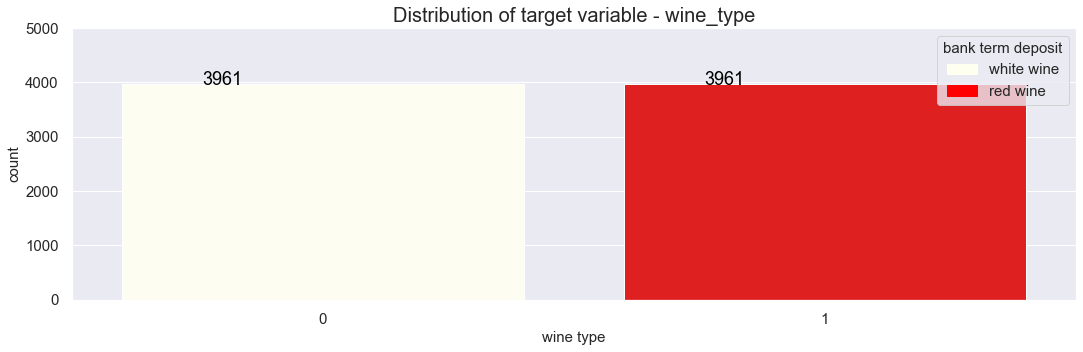

In [385]:
#Visualization of distribution of target after oversampling
plt.figure(figsize=(18, 5))
ax=sns.countplot(x="wine_type",
                 data=data_modelling,
                 palette = ["ivory", "red"])
ax.set_title("Distribution of target variable - wine_type", fontsize=20)
plt.xlabel("wine type",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set(ylim=(0, 5000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                color="black",
                size=18)
    
#Settings of legend
darkcyan_patch = mpatches.Patch(color="ivory", label= "white wine")
darkslategray_patch = mpatches.Patch(color="red", label= "red wine")
plt.legend(handles=[darkcyan_patch,
                    darkslategray_patch],
           loc="best",
           prop={"size": 15},
           title="bank term deposit",
           title_fontsize="15",
           frameon=True)
    
plt.show()

In [386]:
#Saving dataset after modifications - dataset ready to modelling
data_modelling.to_csv("data_modelling.csv")

# 8. Construction of functions for accelerating work

## 8.1 Confusion matrix

The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

In [387]:
def conf_matrix(model_name, y_test, pred_test):
    """
    Function to plot configuration matrix with statistics of this metrics.
    Input:
    model_name: name of model for example: "XGBoost" / "KNN" / "Logistic Regression" and so on
    y_test: target variable from test dataset
    pred_test: prediction on test dataset
    Output:
    Confusion matrics with other related statistics.
    """
    print("Confusion matrix of " + model_name)
    CM = confusion_matrix(y_test, pred_test)
    print(CM)

    print("-"*40)

    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1]
    sensitivity=TP/float(TP+FN)
    specificity=TN/float(TN+FP)

    print("True Negative:", TN)
    print("False Positive:", FP)
    print("False Negative:", FN)
    print("True Positive:", TP)
    print("Correct Predictions", round((TN + TP) / len(pred_test) * 100, 2), "%")

    print("-"*40)

    print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
    "The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
    "Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
    "Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
    "Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
    "Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
    "Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
    "Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

## 8.2 Classification report function

* accuracy - Percentage of correct forecasts.
* precision - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?).
* recall - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?).
* f1 - Harmonic average of precision and sensitivity.

In [388]:
def class_report(y_test, y_train, pred_test, pred_train, model_name):
    """
    Function to generate classification report for both train and test dataset.
    Input:
    y_test: target variable from test dataset
    y_train: target variables from train dataset
    pred_test: predictions from test dataset
    pred_train: predictions from train dataset
    model_name: name of the model for exampe "XGBoost", "Random Forest" and so on... 
    """
    #Classification report on train and test datasets
    print("Classification report of " + model_name + " on TRAIN dataset:")
    print(classification_report(y_train, pred_train))
    print("*"*55)
    print("Classification report of " + model_name + " on TEST dataset:")
    print(classification_report(y_test, pred_test))

## 8.3 Comparison of statistics from train and test dataset

Comparison of results on training and test sets. usually, the results on the training set will be better than on the test set, however, if results on the sets differ significantly, it means that model may be overfitted (too high a score on both sets can also indicate overfitting), if results are weak on both (train / test) datasets it means that model may be underfitted.

In [389]:
def stat_comparison(y_test, y_train, X_test, X_train, pred_test, pred_train, model):
    """
    Function to generate DF with comparision of different statiscts on both train and test dataset.
    Input:
    y_test: target variable from test dataset
    y_train: target variables from train dataset
    X_test: independent variables from test dataset
    X_train: independent variables from train dataset
    pred_test: predictions from test dataset
    pred_train: predictions from train dataset
    model: built classifier
    Output:
    DataFrame with statistics on both train and test dataset.
    """
    #TRAIN
    accuracy_TRAIN = round(accuracy_score(y_train, pred_train),2)
    recall_TRAIN = round(recall_score(y_train, pred_train),2)
    precision_TRAIN = round(precision_score(y_train, pred_train),2)
    f1_TRAIN = round(f1_score(y_train, pred_train),2)
    y_prob_TRAIN = model.predict_proba(X_train)[::,1]
    AUC_TRAIN = metrics.roc_auc_score(y_train, y_prob_TRAIN)
    ginig_TRAIN = round((2*AUC_TRAIN) - 1,2)

    #TEST
    accuracy_TEST = round(accuracy_score(y_test, pred_test),2)
    recall_TEST = round(recall_score(y_test, pred_test),2)
    precision_TEST = round(precision_score(y_test, pred_test),2)
    f1_TEST = round(f1_score(y_test, pred_test),2)
    y_prob_TEST = model.predict_proba(X_test)[::,1]
    AUC_TEST = metrics.roc_auc_score(y_test, y_prob_TEST)
    ginig_TEST = round((2*AUC_TEST) - 1,2)

    indicators = pd.DataFrame({"Dataset" : ["TRAIN", "TEST"],
                                  "Accuracy" : [accuracy_TRAIN, accuracy_TEST],
                                  "Precision" : [precision_TRAIN, precision_TEST],
                                  "Recall" : [recall_TRAIN, recall_TEST],
                                  "F1" : [f1_TRAIN, f1_TEST],
                                  "AUC" : [AUC_TRAIN, AUC_TEST],
                                  "Gini" : [ginig_TRAIN, ginig_TEST]}).set_index("Dataset")
    print("Comparison of results on train and test dataset:")
    return indicators

## 8.4 ROC curve for train and test dataset

In [390]:
def plot_roc_cur(model, X, y, df, color, model_name):  
    """
    Funtion to plot ROC curve with value of AUC metric.
    Input: 
    model: created model
    X: X_train/test dataset
    y: y_train/test dataset
    df: name of dataset "train" / "test"
    color: color of ROC plot
    model_name: name of built model for exampe: XGboost / Random Forest / Logistic Regression and so on
    Output:
    ROC curve with value of AUC
    """
    probs = model.predict_proba(X)[::,1]
    auc = metrics.roc_auc_score(y, probs)
    fper, tper, thresholds = roc_curve(y, probs)
    plt.plot(fper, tper, label= model_name + " (auc = %0.3f)" % auc, color=color)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    if df == "train":
        plt.title('Receiver Operating Characteristic (ROC) Curve on TRAIN dataset', fontsize=20)
    elif df == "test":
        plt.title('Receiver Operating Characteristic (ROC) Curve on TEST dataset', fontsize=20)
    else:
        plt.title("CHECK CORRECT DATASET train / test!")
    plt.legend(loc="best", 
               fontsize=15,
               prop={"size": 14},
               title="Area Under Curve (AUC)",
               title_fontsize="16",
               frameon=True)
    plt.show()

# 9. Machine Learning Models

## 9.1 Logistic Regression

### Model building with tunning of hyper parameters

In [391]:
#X and y from dataset
X_LR = data_modelling.loc[:, data.columns != "wine_type"]
y_LR = data_modelling.loc[:, data.columns == "wine_type"]

In [392]:
#Loop to find optimal train / test split
for k in range(1, 10):
    X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR,
                                                                    y_LR,
                                                                    test_size = 0.1*k,
                                                                    random_state = 2021)
    #Scaling data
    scaler = StandardScaler()
    X_train_LR = scaler.fit_transform(X_train_LR)
    X_test_LR = scaler.transform(X_test_LR)
    
    #Logistic Regression model
    LR = LogisticRegression()
    LR.fit(X = X_train_LR, y = y_train_LR)
    
    #Prediction on train dataset
    prediction_train = LR.predict(X_train_LR)
    #Prediction on test dataset
    prediction_test = LR.predict(X_test_LR)
    
    #Printing results
    print(f"test: {k/10}, Train AUC:", round(roc_auc_score(y_train_LR, prediction_train), 3),
          "Test AUC:", round(roc_auc_score(y_test_LR, prediction_test), 3))

test: 0.1, Train AUC: 0.995 Test AUC: 0.991
test: 0.2, Train AUC: 0.995 Test AUC: 0.995
test: 0.3, Train AUC: 0.994 Test AUC: 0.996
test: 0.4, Train AUC: 0.994 Test AUC: 0.996
test: 0.5, Train AUC: 0.994 Test AUC: 0.996
test: 0.6, Train AUC: 0.994 Test AUC: 0.995
test: 0.7, Train AUC: 0.995 Test AUC: 0.995
test: 0.8, Train AUC: 0.994 Test AUC: 0.994
test: 0.9, Train AUC: 0.995 Test AUC: 0.992


Configuration test = 0.2 and train = 0.8 gives the highest AUC on test dataset, moreover AUC results on train adn test datasets in this configuration gives similar results.

In [393]:
#Train / Test split
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR,
                                                                y_LR,
                                                                train_size = 0.8,
                                                                test_size = 0.2,
                                                                random_state = 1)
# #Scaling data
# scaler = StandardScaler()
# X_train_LR = scaler.fit_transform(X_train_LR)
# X_test_LR = scaler.transform(X_test_LR)

#Hyperparameters tunning - GridSearch
#Combinations of hyperparameters
grid={"C":[0.001,0.01,0.1,1,10,100,1000],
      "penalty":["none","l2", "elasticnet"],# l1 lasso l2 ridge
      "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}
#Grid parameters
grid_search_LR = GridSearchCV(estimator = LogisticRegression(),
                              param_grid = grid,
                              verbose = 0)
#Training of GridSearch
grid_search_LR.fit(X_train_LR, y_train_LR)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['none', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [394]:
#Best values of hiperparameters in Logistic Regression
best_parameters_LR = grid_search_LR.best_params_
best_parameters_LR

{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}

In [395]:
#Creating classifier with best hyper parameters
LR = LogisticRegression(C = 1,
                        penalty = 'l2',
                        solver = 'liblinear')
#Training Logistic Regressio model with best hyper parameters
LR = LR.fit(X = X_train_LR, y = y_train_LR)

In [396]:
#Prediction of train dataset
TRAIN_pred_LR = LR.predict(X_train_LR)
#Prediction on test dataset
TEST_pred_LR = LR.predict(X_test_LR)

### Model evaluation

### Confusion matrix

In [397]:
#Activation of early build function to calculate confusion matrix  
conf_matrix(model_name= "Logistic Regression",
            y_test = y_test_LR,
            pred_test = TEST_pred_LR)

Confusion matrix of Logistic Regression
[[1168   21]
 [  19 1169]]
----------------------------------------
True Negative: 1168
False Positive: 21
False Negative: 19
True Positive: 1169
Correct Predictions 98.32 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.98 
 The Missclassification = 1-Accuracy =  0.02 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.98 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.98 
 Positive Predictive value = TP/(TP+FP) =  0.98 
 Negative predictive Value = TN/(TN+FN) =  0.98 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  55.71 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.02


### Classifivation report

In [398]:
#Activation of early build function to calculate classification report 
class_report(y_test = y_test_LR,
             y_train = y_train_LR,
             pred_test = TEST_pred_LR,
             pred_train = TRAIN_pred_LR,
             model_name = "Logistic Regression")

Classification report of Logistic Regression on TRAIN dataset:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2772
           1       0.98      0.98      0.98      2773

    accuracy                           0.98      5545
   macro avg       0.98      0.98      0.98      5545
weighted avg       0.98      0.98      0.98      5545

*******************************************************
Classification report of Logistic Regression on TEST dataset:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1189
           1       0.98      0.98      0.98      1188

    accuracy                           0.98      2377
   macro avg       0.98      0.98      0.98      2377
weighted avg       0.98      0.98      0.98      2377



### Comparision of statistics on train and test datasets

In [399]:
#Activation of early build function to compare statistics on train and test datasets
stat_comparison(y_test = y_test_LR,
                y_train = y_train_LR,
                X_test = X_test_LR, 
                X_train = X_train_LR,
                pred_test = TEST_pred_LR,
                pred_train = TRAIN_pred_LR,
                model = LR)

Comparison of results on train and test dataset:


Accuracy  Precision  Recall    F1   AUC  Gini
Dataset                                               
TRAIN       0.980      0.980   0.980 0.980 0.997 0.990
TEST        0.980      0.980   0.980 0.980 0.997 0.990

### ROC curve

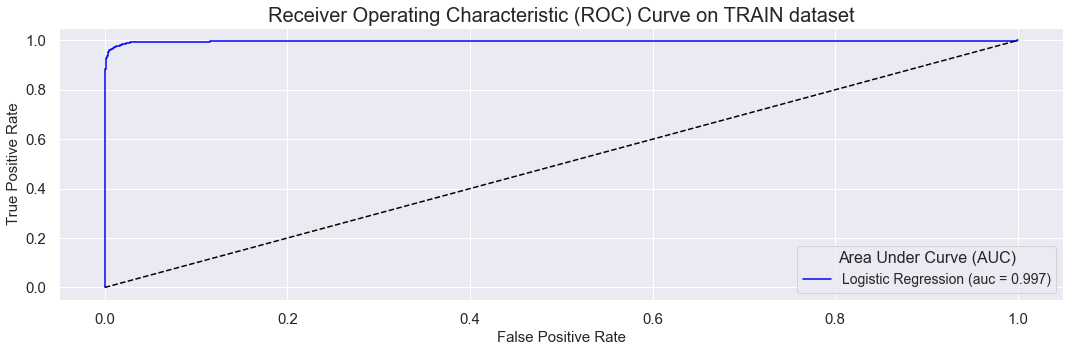

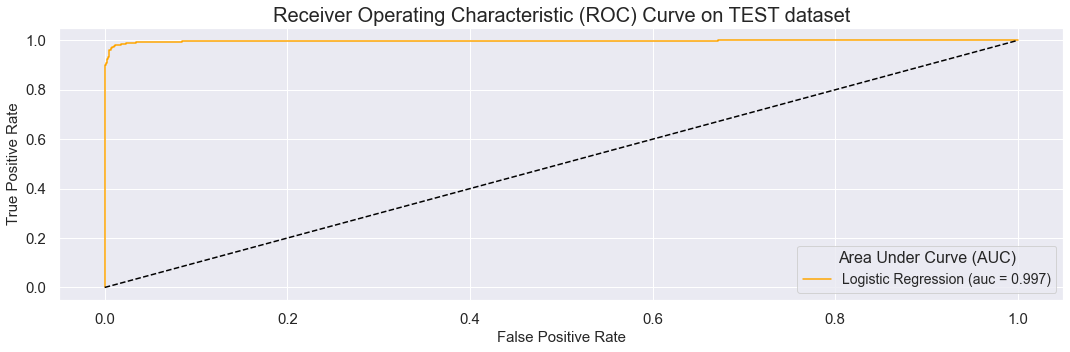

In [400]:
#Activation of early build function to plot ROC curves
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = LR, X = X_train_LR, y = y_train_LR, df="train", color="blue", model_name = "Logistic Regression")
plot_roc_cur(model = LR, X = X_test_LR, y = y_test_LR, df="test", color="orange", model_name = "Logistic Regression")

### Easy to business interpretation plots - PROFIT and LIFT curves

In [401]:
#Probabilities
y_prob = LR.predict_proba(X_test_LR)

The graph shows what percentage of red and white wines the model catches in a given percentage of the scoring list. For example, in the top 10% of the list of both red and white wines with the highest score, the model catches 30% of the correct wine classifications. Model catches red and white wines at the similar effectiveness.

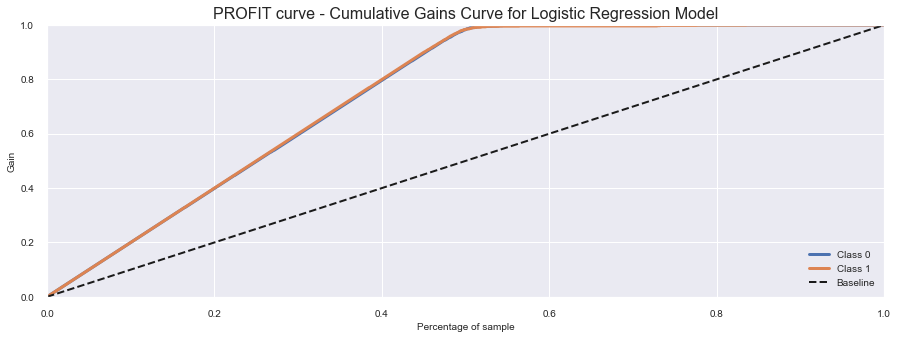

In [402]:
#PROFIT curve
skplt.metrics.plot_cumulative_gain(y_test_LR,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for Logistic Regression Model')
plt.show()

The graph illustrates how many times the model is more effective at capturing wine type relative to classifying wines without using the model. For example, in the top 10% of the list of red and white wines with the highest score, the model correctly catches 2 times as many wines.

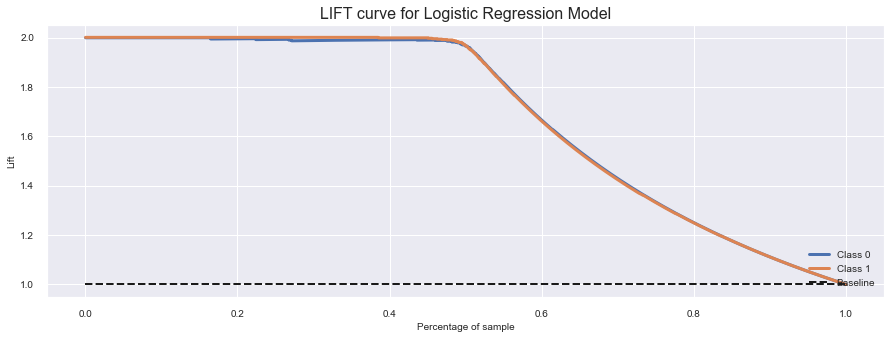

In [403]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_LR,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for Logistic Regression Model')
plt.show()

### Features importance

In [404]:
#Convert numpy array to DataFrame
array_to_df = pd.DataFrame(X_train_LR)
#Coefficient of the features
lr_importances = np.abs(LR.coef_)[0]
lr_indices = np.argsort(lr_importances)[::-1]

#Features ranking
print("Features importance:")
print()
lr_labels = []
for f in range(array_to_df.shape[1]):
    lr_labels.append(array_to_df.columns.values[lr_indices[f]])
    print(lr_labels[f], round(lr_importances[lr_indices[f]],3))

Features importance:

volatile_acidity 9.599
sulphates 6.842
density 2.719
pH 1.879
sulphates_level_minimum 1.481
citric_acid 1.03
fixed_acidity 0.9
alcohol 0.718
residual_sugar 0.224
quality 0.191
sulphates_level_medium 0.084
total_sulfur_dioxide 0.056


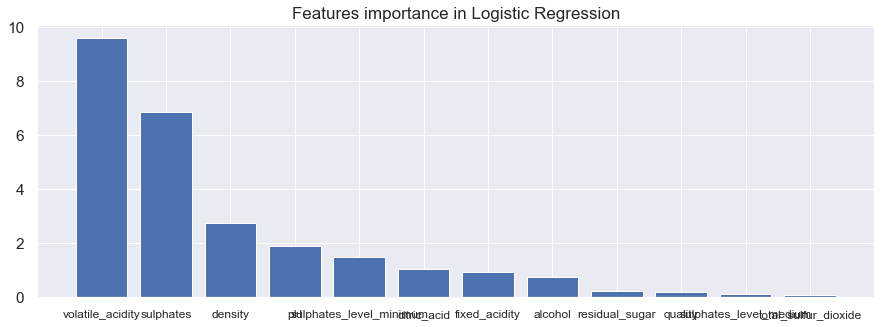

In [405]:
#Bar plot of variable importance
#Convert numpy array to DataFrame
array_to_df = pd.DataFrame(X_test_LR)

plt.figure(figsize=(15,5))
plt.bar(range(array_to_df.shape[1]),
        lr_importances[lr_indices],
        color="b"
        ,align="center")
plt.title("Features importance in Logistic Regression", fontsize=17)
plt.xticks(range(array_to_df.shape[1]), lr_labels, fontsize=12)
plt.xlim([-1, array_to_df.shape[1]])
plt.show()

### Results and export results to Excel file

In [406]:
#Results on full dataset (probabilities of 0 and 1)
X_all = data_modelling.loc[:, data.columns != "wine_type"].values
y_all_prob = LR.predict_proba(X_all)

#Main DF and DF with probabilities
df_X_all = data_modelling
df_y_all_prob = pd.DataFrame(y_all_prob)

#Concatenation DF and probabilities
df_X_all_scored = pd.concat([df_X_all, df_y_all_prob * 100], axis = 1)
df_X_all_scored.rename(columns={0 : "Prob_0_white_wine", 1 : "Prob_1_red_wine"}, inplace=True)
df_X_all_scored

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  Prob_0_white_wine  \
0                          1                        0              0.068   
1                          1                        0              0.029   
2                          1                        0              0.047   
3                          1                        0             10.328   
4                          1                        0              0.151   
...                      ...                      ...                ...   
7917                       1                        0              1.782   
7918                       0                        0              0.032   
7919                       1                        0              2.903   
7920                       1                        0             31.880   
7921                       0                        0              0.183   

      Prob_1_red_wine  
0              99.932  
1              99.971  
2              99.953  
3              89.672  
4              99.849  
...               ...  
7917           98.218  
7918           99.968  
7919           97.097  
7920           68.120  
7921           99.817  

[7922 rows x 15 columns]

In [407]:
#Save columns with wine type and probabilities to Excel file
df_X_all_scored[["wine_type", "Prob_0_white_wine", "Prob_1_red_wine"]].to_excel("probabilities_results/prob_Logistic_Regression.xlsx")
#Save all dataset with probabilities to Excel file
df_X_all_scored.to_excel("probabilities_results/all_df_Logistic_Regression.xlsx")

## 9.2 KNN

### Tunning of hyperparameters

In [408]:
#X and y from dataset
X_KNN = data_modelling.loc[:, data.columns != "wine_type"].columns.tolist()
y_KNN = data_modelling.loc[:, data.columns == "wine_type"].columns.tolist()

In [409]:
#Wrapper for cross validation with 5 folders - *args and **kwargs appear at the end - lists of parameters given as a dictionary
#or list.
def CVTestKNN(nFolds = 5, randomState=2020, debug=False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    #Lists with results
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    #Loop validating the model on successive folds
    for train_KNN, test_KNN in kf.split(data_modelling.index.values):
        # Przygotowanie estymatora
        KNN = neighbors.KNeighborsClassifier(*args, **kwargs)
        if debug:
            print(KNN)
        #Training model
        KNN.fit(data_modelling.iloc[train_KNN][X_KNN], data_modelling.iloc[train_KNN][y_KNN])

        #Preparing of predictions on train and test dataset
        predictions_train = KNN.predict_proba(data_modelling.iloc[train_KNN][X_KNN])[:,1]
        predictions_test = KNN.predict_proba(data_modelling.iloc[test_KNN][X_KNN])[:,1]
        
        #Let's keep the prediction information for this fold
        predictions.append(predictions_test.tolist().copy())
        
        #Together with the indexes in the original data frame
        indices.append(data_modelling.iloc[test_KNN].index.tolist().copy())
        
        #Calculation of ROC-AUC for folds
        trainScore = roc_auc_score((data_modelling[y_KNN].iloc[train_KNN]==1).astype(int), predictions_train)
        testScore = roc_auc_score((data_modelling[y_KNN].iloc[test_KNN]==1).astype(int), predictions_test)
        
        #Saving results for folds
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        #We can optionally display information about each folio along with the training results 
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [411]:
#Training on standard parameters
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=5, n_jobs=-1, p=2, debug=True)
print(np.mean(trainResults), np.mean(testResults), testResults)

<function clf at 0x000002D63E4331F8>
Train AUC: 0.998611372590036 Valid AUC: 0.9801087756526061
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9986254283551164 Valid AUC: 0.9878369671995203
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9984251895583033 Valid AUC: 0.9884544334975369
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9984213425170908 Valid AUC: 0.9908995181722455
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9985504103212577 Valid AUC: 0.9891956313775511
0.9985267486683608 0.9872990651798919 [0.9801087756526061, 0.9878369671995203, 0.9884544334975369, 0.9908995181722455, 0.9891956313775511]


In [412]:
#Results for differenc n_neighbors parameter values nad p=2
for k in [1, 3, 5, 10, 15, 30, 50, 100, 150, 200]:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=k, n_jobs=-1, p=2)
    print("n_neighbors, mean_train, mean_test")
    print(k, np.mean(trainResults), np.mean(testResults))

n_neighbors, mean_train, mean_test
1 0.9999050216197599 0.9715544248386557
n_neighbors, mean_train, mean_test
3 0.99942519207707 0.9841481553382578
n_neighbors, mean_train, mean_test
5 0.9985267486683608 0.9872990651798919
n_neighbors, mean_train, mean_test
10 0.9967655553563844 0.9902379566641167
n_neighbors, mean_train, mean_test
15 0.9953852071947124 0.990340543061923
n_neighbors, mean_train, mean_test
30 0.991685485692925 0.9883443808748176
n_neighbors, mean_train, mean_test
50 0.9882337330086784 0.9858474293585278
n_neighbors, mean_train, mean_test
100 0.9805243579904153 0.9790448885256418
n_neighbors, mean_train, mean_test
150 0.9755116482166223 0.9743721223207297
n_neighbors, mean_train, mean_test
200 0.9717726054209846 0.9707965607491877


In [413]:
#Results for differenc n_neighbors parameter values nad p=2
for k in [5, 10, 15, 20, 25, 30, 35, 40]:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=k, n_jobs=-1, p=2)
    print("n_neighbors, mean_train, mean_test")
    print(k, np.mean(trainResults), np.mean(testResults))

n_neighbors, mean_train, mean_test
5 0.9985267486683608 0.9872990651798919
n_neighbors, mean_train, mean_test
10 0.9967655553563844 0.9902379566641167
n_neighbors, mean_train, mean_test
15 0.9953852071947124 0.990340543061923
n_neighbors, mean_train, mean_test
20 0.993984640340404 0.9894736942151349
n_neighbors, mean_train, mean_test
25 0.9927747170514403 0.9887898253953604
n_neighbors, mean_train, mean_test
30 0.991685485692925 0.9883443808748176
n_neighbors, mean_train, mean_test
35 0.9907685624629219 0.9876955133005622
n_neighbors, mean_train, mean_test
40 0.9898341349056942 0.9869182901951106


In [414]:
#Results for differenc n_neighbors parameter values nad p=1
for k in [15, 20, 25, 30, 35, 40, 45, 50, 100, 150, 200]:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=k, n_jobs=-1, p=1)
    print("n_neighbors, mean_train, mean_test")
    print(k, np.mean(trainResults), np.mean(testResults))

n_neighbors, mean_train, mean_test
15 0.9971449690430567 0.9938310219533047
n_neighbors, mean_train, mean_test
20 0.9963814563581724 0.9934086856440161
n_neighbors, mean_train, mean_test
25 0.995628863914337 0.993079159684215
n_neighbors, mean_train, mean_test
30 0.9949096814672578 0.992587874735135
n_neighbors, mean_train, mean_test
35 0.9942757492388277 0.9919950965742295
n_neighbors, mean_train, mean_test
40 0.9936679247278306 0.9916451124854475
n_neighbors, mean_train, mean_test
45 0.993134543651767 0.9913702476316866
n_neighbors, mean_train, mean_test
50 0.9926270087529583 0.9909579524052916
n_neighbors, mean_train, mean_test
100 0.9878835712392012 0.9868640100964425
n_neighbors, mean_train, mean_test
150 0.984257792754331 0.9834964059567467
n_neighbors, mean_train, mean_test
200 0.9819487584126916 0.9814681520325557


In [415]:
#Loop to find the best configuration of hyper parameters in cross validation with 5 folds

#Empty lists for hyper parameters from loop
nn_list = list()
p_list = list()
mean_TRAIN_list = list()
mean_TEST_list = list()

#Loop with hyper parameters - because of extremely long time of execution of tunning of hyper parameters in loop
#with a lot of hyper parameters, range of hyper parameters was reduced
print("n_neighbors || p || mean_test_result || mean_train_resul || train_test_difference")
print("=================================================================================")
for n_neighbors in [1, 3, 5, 10, 15, 25, 30, 35, 40, 50, 100, 150, 200]:
    for p in [1, 2]: 
        trainResults, testResults, predictions, indices = CVTestKNN(debug=False,
                                                                    n_neighbors=n_neighbors,
                                                                    p=p,
                                                                    n_jobs=-1)
        
        #Append values from loop to lists
        nn_list.append(n_neighbors)
        p_list.append(p)
        mean_TRAIN_list.append(np.mean(trainResults))
        mean_TEST_list.append(np.mean(testResults))
                
        #Display mean results for training set and test set from 5 folds in different hyper parameters config. 
        print(n_neighbors, "||",
              p, "||",
              np.mean(testResults), "||",
              np.mean(trainResults), "||",
              (np.mean(trainResults) - np.mean(testResults)))
      
        # #Save results of hyperparameters tunning in Data Frame
        df = pd.DataFrame()
        df["n_neighbors"] = nn_list
        df["p"] = p_list
        df["mean_TEST"] = mean_TEST_list
        df["mean_TRAIN"] = mean_TRAIN_list
        df["TRAIN_TEST_difference"] = df["mean_TRAIN"] - df["mean_TEST"]

n_neighbors || p || mean_test_result || mean_train_resul || train_test_difference
1 || 1 || 0.979433322149695 || 0.9999050216197599 || 0.020471699470064886
1 || 2 || 0.9715544248386557 || 0.9999050216197599 || 0.028350596781104187
3 || 1 || 0.9897660030676952 || 0.9997046383911403 || 0.009938635323445077
3 || 2 || 0.9841481553382578 || 0.99942519207707 || 0.0152770367388122
5 || 1 || 0.992199048754437 || 0.999174197764391 || 0.006975149009953996
5 || 2 || 0.9872990651798919 || 0.9985267486683608 || 0.01122768348846892
10 || 1 || 0.9936321746103747 || 0.9980755674277285 || 0.004443392817353842
10 || 2 || 0.9902379566641167 || 0.9967655553563844 || 0.006527598692267711
15 || 1 || 0.9938310219533047 || 0.9971449690430567 || 0.0033139470897519674
15 || 2 || 0.990340543061923 || 0.9953852071947124 || 0.005044664132789367
25 || 1 || 0.993079159684215 || 0.995628863914337 || 0.0025497042301220185
25 || 2 || 0.9887898253953604 || 0.9927747170514403 || 0.0039848916560798475
30 || 1 || 0.9925878

As we can see n_neighbors = 15 and p = 1 get the best results on test dataset, moreover results on test and train dataset are similar, what is also good. Nevertheless, results (AUC) are really huge and we can expect overfitting, what is likely because of really small input dataset.

In [416]:
#The best combination of hyper parameters in KNN model based on mean results on TEST dataset
df.sort_values(by="mean_TEST", ascending=False)

n_neighbors  p  mean_TEST  mean_TRAIN  TRAIN_TEST_difference
8            15  1      0.994       0.997                  0.003
6            10  1      0.994       0.998                  0.004
10           25  1      0.993       0.996                  0.003
12           30  1      0.993       0.995                  0.002
4             5  1      0.992       0.999                  0.007
14           35  1      0.992       0.994                  0.002
16           40  1      0.992       0.994                  0.002
18           50  1      0.991       0.993                  0.002
9            15  2      0.990       0.995                  0.005
7            10  2      0.990       0.997                  0.007
2             3  1      0.990       1.000                  0.010
11           25  2      0.989       0.993                  0.004
13           30  2      0.988       0.992                  0.003
15           35  2      0.988       0.991                  0.003
5             5  2      0.987       0.999                  0.011
17           40  2      0.987       0.990                  0.003
20          100  1      0.987       0.988                  0.001
19           50  2      0.986       0.988                  0.002
3             3  2      0.984       0.999                  0.015
22          150  1      0.983       0.984                  0.001
24          200  1      0.981       0.982                  0.000
0             1  1      0.979       1.000                  0.020
21          100  2      0.979       0.981                  0.001
23          150  2      0.974       0.976                  0.001
1             1  2      0.972       1.000                  0.028
25          200  2      0.971       0.972                  0.001

### Tunning of hyperparameters in train_test_split 

In [417]:
#X and y from dataset
X_KNN = data_modelling.loc[:, data.columns != "wine_type"]
y_KNN = data_modelling.loc[:, data.columns == "wine_type"]

#Loop to find optimal train / test split
for k in range(1, 10):
    X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_KNN,
                                                                        y_KNN,
                                                                        test_size = 0.1*k,
                                                                        random_state = 222)
#     #Scaling data
#     scaler = StandardScaler()
#     X_train_KNN = scaler.fit_transform(X_train_KNN)
#     X_test_KNN = scaler.transform(X_test_KNN)
    
    #Logistic Regression model
    KNN = neighbors.KNeighborsClassifier(n_neighbors = 15,
                                         p =1,
                                         n_jobs=-1)
    KNN.fit(X = X_train_KNN, y = y_train_KNN)
    
    #Prediction on train dataset
    prediction_train_KNN = KNN.predict(X_train_KNN)
    #Prediction on test dataset
    prediction_test_KNN = KNN.predict(X_test_KNN)
    
    #Printing results
    print(f"test: {k/10}, Train AUC:", round(roc_auc_score(y_train_KNN, prediction_train_KNN), 3),
          "Test AUC:", round(roc_auc_score(y_test_KNN, prediction_test_KNN), 3))

test: 0.1, Train AUC: 0.97 Test AUC: 0.971
test: 0.2, Train AUC: 0.969 Test AUC: 0.974
test: 0.3, Train AUC: 0.968 Test AUC: 0.967
test: 0.4, Train AUC: 0.968 Test AUC: 0.966
test: 0.5, Train AUC: 0.967 Test AUC: 0.967
test: 0.6, Train AUC: 0.963 Test AUC: 0.963
test: 0.7, Train AUC: 0.961 Test AUC: 0.958
test: 0.8, Train AUC: 0.955 Test AUC: 0.949
test: 0.9, Train AUC: 0.944 Test AUC: 0.934


Configuration test = 0.2 and train = 0.8 gives the highest AUC on test dataset, moreover AUC results on train adn test datasets in this configuration gives similar results.

### Model building

In [418]:
#X and y from dataset
X_KNN = data_modelling.loc[:, data.columns != "wine_type"]
y_KNN = data_modelling.loc[:, data.columns == "wine_type"]

#Split dataset to train and test
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_KNN,
                                                                    y_KNN,
                                                                    test_size = 0.2,
                                                                    random_state = 222)
# #Scaling data
# scaler = StandardScaler()
# X_train_KNN = scaler.fit_transform(X_train_KNN)
# X_test_KNN = scaler.transform(X_test_KNN)

#Build and train KNN model
KNN = neighbors.KNeighborsClassifier(n_neighbors = 15, n_jobs=-1, p = 1)
KNN = KNN.fit(X = X_train_KNN, y = y_train_KNN)

#Predictions on train and test datasets
TRAIN_pred_KNN = KNN.predict(X_train_KNN)
TEST_pred_KNN = KNN.predict(X_test_KNN)

## Model evaluation

### Confusion matrix

In [419]:
#Activation of early build function to calculate confusion matrix
conf_matrix(model_name = "KNN",
            y_test = y_test_KNN,
            pred_test = TEST_pred_KNN)

Confusion matrix of KNN
[[2658  123]
 [ 108 2657]]
----------------------------------------
True Negative: 2658
False Positive: 123
False Negative: 108
True Positive: 2657
Correct Predictions 95.83 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.96 
 The Missclassification = 1-Accuracy =  0.04 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.96 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.96 
 Positive Predictive value = TP/(TP+FP) =  0.96 
 Negative predictive Value = TN/(TN+FN) =  0.96 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  21.73 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.04


### Classification report

In [420]:
#Activation of early build function to calculate classification report 
class_report(y_test = y_test_KNN,
             y_train = y_train_KNN,
             pred_test = TEST_pred_KNN,
             pred_train = TRAIN_pred_KNN,
             model_name = "KNN")

Classification report of KNN on TRAIN dataset:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1180
           1       0.96      0.97      0.96      1196

    accuracy                           0.96      2376
   macro avg       0.96      0.96      0.96      2376
weighted avg       0.96      0.96      0.96      2376

*******************************************************
Classification report of KNN on TEST dataset:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2781
           1       0.96      0.96      0.96      2765

    accuracy                           0.96      5546
   macro avg       0.96      0.96      0.96      5546
weighted avg       0.96      0.96      0.96      5546



### Comparison of statistics on train and test datasets

In [421]:
#Activation of early build function to compare statistics on train adn test datasets
stat_comparison(y_test = y_test_KNN,
                y_train = y_train_KNN,
                X_test = X_test_KNN, 
                X_train = X_train_KNN,
                pred_test = TEST_pred_KNN,
                pred_train = TRAIN_pred_KNN,
                model=KNN)

Comparison of results on train and test dataset:


Accuracy  Precision  Recall    F1   AUC  Gini
Dataset                                               
TRAIN       0.960      0.960   0.970 0.960 0.994 0.990
TEST        0.960      0.960   0.960 0.960 0.990 0.980

### ROC curve

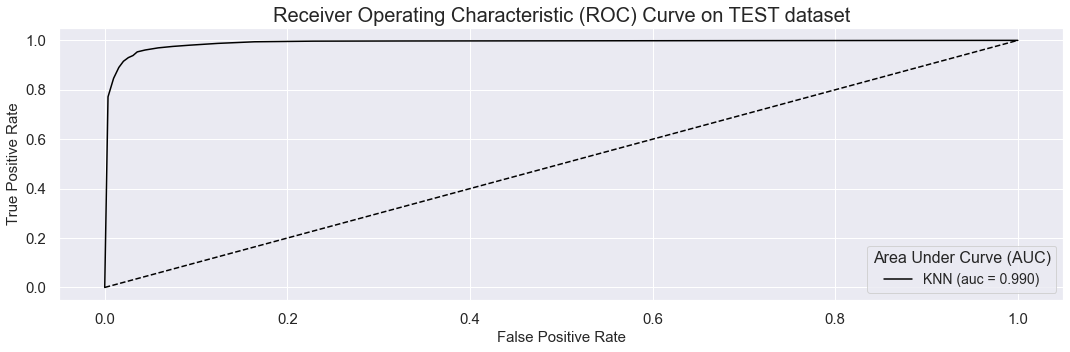

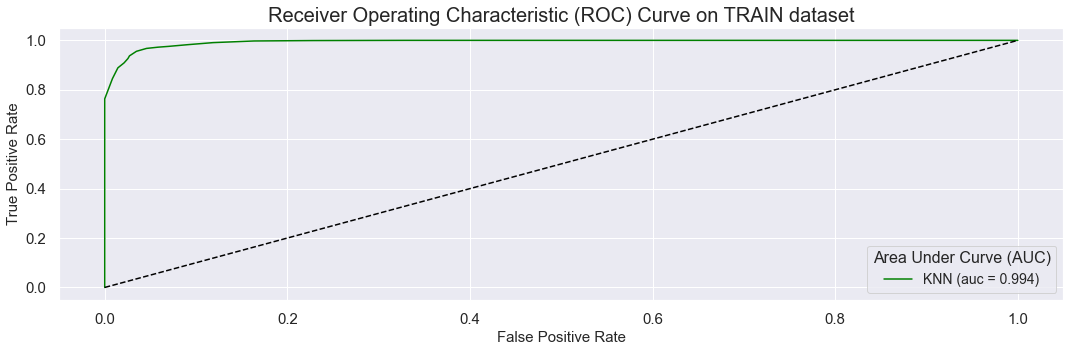

In [422]:
#Activation of early build function to plot ROC curves
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = KNN, X = X_test_KNN, y = y_test_KNN, df="test", color="black", model_name = "KNN")
plot_roc_cur(model = KNN, X = X_train_KNN, y = y_train_KNN, df="train", color="green", model_name = "KNN")

### Easy to business interpretation plots - PROFIT and LIFT curves

In [423]:
#Probabilities
y_prob = LR.predict_proba(X_test_KNN)

The graph shows what percentage of red and white wines the model catches in a given percentage of the scoring list. For example, in the top 10% of the list of both red and white wines with the highest score, the model catches 30% of the correct wine classifications. Model catches red and white wines at the similar effectiveness.

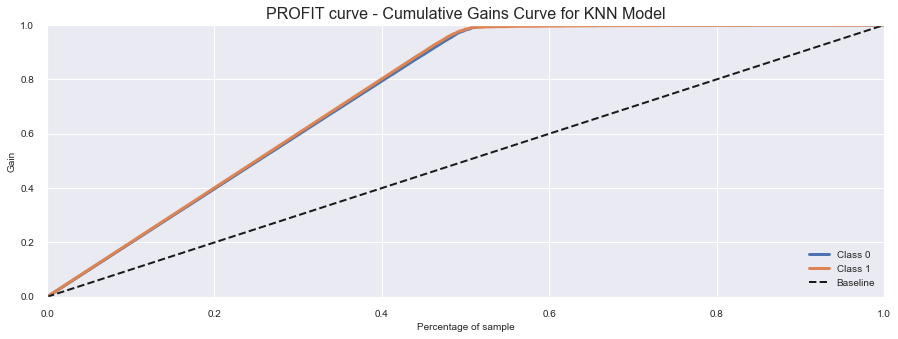

In [424]:
#PROFIT curve
skplt.metrics.plot_cumulative_gain(y_test_KNN,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for KNN Model')
plt.show()

The graph illustrates how many times the model is more effective at capturing wine type relative to classifying wines without using the model. For example, in the top 10% of the list of red and white wines with the highest score, the model correctly catches 2 times as many wines.

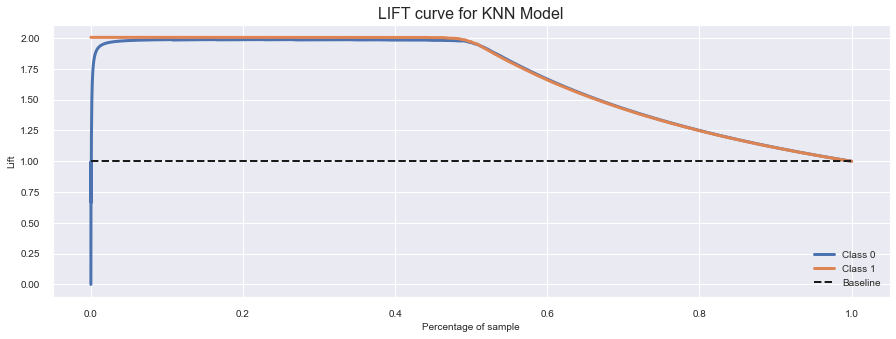

In [425]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_KNN,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for KNN Model')
plt.show()

### Results and export results to Excel file

In [426]:
#Results on full dataset (probabilities of 0 and 1)
X_all = data_modelling.loc[:, data.columns != "wine_type"].values
y_all_prob = KNN.predict_proba(X_all)

#Main DF and DF with probabilities
df_X_all = data_modelling
df_y_all_prob = pd.DataFrame(y_all_prob)

#Concatenation DF and probabilities
df_X_all_scored = pd.concat([df_X_all, df_y_all_prob * 100], axis = 1)
df_X_all_scored.rename(columns={0 : "Prob_0_white_wine", 1 : "Prob_1_red_wine"}, inplace=True)
df_X_all_scored

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  Prob_0_white_wine  \
0                          1                        0              0.000   
1                          1                        0              0.000   
2                          1                        0              0.000   
3                          1                        0              0.000   
4                          1                        0              6.667   
...                      ...                      ...                ...   
7917                       1                        0              0.000   
7918                       0                        0              0.000   
7919                       1                        0              0.000   
7920                       1                        0             53.333   
7921                       0                        0              0.000   

      Prob_1_red_wine  
0             100.000  
1             100.000  
2             100.000  
3             100.000  
4              93.333  
...               ...  
7917          100.000  
7918          100.000  
7919          100.000  
7920           46.667  
7921          100.000  

[7922 rows x 15 columns]

In [427]:
#Save columns with wine type and probabilities to Excel file
df_X_all_scored[["wine_type", "Prob_0_white_wine", "Prob_1_red_wine"]].to_excel("probabilities_results/prob_KNN.xlsx")
#Save all dataset with probabilities to Excel file
df_X_all_scored.to_excel("probabilities_results/all_df_KNN.xlsx")

# 9.3 SVM

### Tunning of hyperparameters

In [428]:
#X and y from dataset
X_SVM = data_modelling.loc[:, data.columns != "wine_type"].columns.tolist()
y_SVM = data_modelling.loc[:, data.columns == "wine_type"].columns.tolist()

In [429]:
#Wrapper for cross validation with 5 folders - *args and **kwargs appear at the end - lists of parameters given as a dictionary
#or list.
def CVTestSVM(nFolds = 5, randomState=2020, debug=False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    #Lists with results
    testResults = []
    trainResults = []
    predictions = []
    indexes = []
    
    for train_SVM, test_SVM in kf.split(data_modelling.index.values):
        #Preparing of estimator
        SVM = SVC(probability=True, max_iter=-1, random_state=2020, tol=0.001, cache_size=500, *args, **kwargs)
        #Display of function results
        if debug:
            print(SVM)
        X = data_modelling.iloc[train_SVM]
        #Training the model
        SVM.fit(X[X_SVM], X[y_SVM])

        #Predictions for train adn test datasets
        predictions_train = SVM.predict_proba(data_modelling.iloc[train_SVM][X_SVM])[:,1]
        predictions_test = SVM.predict_proba(data_modelling.iloc[test_SVM][X_SVM])[:,1]
        
        # Let's keep the prediction information for this fold
        predictions.append(predictions_test.tolist().copy())
        
        #Together with the indexes in the original data frame
        indexes.append(data_modelling.iloc[test_SVM].index.tolist().copy())
        
        #Calculation of statistics on each fold
        trainScore = roc_auc_score((data_modelling[y_SVM].iloc[train_SVM]==1).astype(int), predictions_train)
        testScore = roc_auc_score((data_modelling[y_SVM].iloc[test_SVM]==1).astype(int), predictions_test)
        
        #Saving results to lists
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        #We can optionally display information about each folio along with the training results
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indexes

In [430]:
#Training of linear model (with default hyperparameter C)
trainResults, testResults, predictions, indexes = CVTestSVM(debug=False, kernel="linear")
#Display mean results for training set and test set from 5 folds
print(np.mean(trainResults),"***", np.mean(testResults), testResults)

0.9975837914452704 *** 0.997522617783198 [0.9965079638179171, 0.997583181302068, 0.9984254958013221, 0.9976004339640703, 0.9974960140306123]


In [431]:
#SVM with polynomial kernel, degree two
trainResults, testResults, predictions, indexes = CVTestSVM(debug=True, degree=2, kernel="poly")
#Display mean results for training set and test set from 5 folds
print(np.mean(trainResults),"***", np.mean(testResults))

<function clf at 0x000002D63E4331F8>
Train AUC: 0.9748276978399351 Valid AUC: 0.9728347623280665
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9744605714058017 Valid AUC: 0.9711919357513746
<function clf at 0x000002D63E4331F8>
Train AUC: 0.972892039870701 Valid AUC: 0.9758113402588121
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9740801628985716 Valid AUC: 0.9714118191390919
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9725544852042275 Valid AUC: 0.9774370216836735
0.9737629914438474 *** 0.9737373758322038


In [432]:
#SVM with "rbf" kernel
trainResults, testResults, predictions, indexes = CVTestSVM(debug=True, kernel="rbf",)
#Display mean results for training set and test set from 5 folds
print(np.mean(trainResults),"***", np.mean(testResults))

<function clf at 0x000002D63E4331F8>
Train AUC: 0.9774517011071766 Valid AUC: 0.9742661466846367
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9773425047816384 Valid AUC: 0.9743861870558667
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9758665988326617 Valid AUC: 0.9792028254932489
<function clf at 0x000002D63E4331F8>
Train AUC: 0.9768717168768971 Valid AUC: 0.9750598296052841
<function clf at 0x000002D63E4331F8>
Train AUC: 0.975584707667824 Valid AUC: 0.9795041454081632
0.9766234458532395 *** 0.9764838268494399


In [433]:
#Loop to find the best configuration of hyper parameters in cross validation with 5 folds

#Empty lists for hyper parameters from loop
c_list = list()
kernel_list = list()
gamma_list = list()
decision_function_shape_list = list()
mean_TRAIN_list = list()
mean_TEST_list = list()

#Loop with hyper parameters - because of extremely long time of execution of tunning of hyper parameters in loop
#with a lot of hyper parameters, range of hyper parameters was reduced
print("C || kernel || gamma || decision_function_shape || mean_test_result || mean_train_resul || train_test_difference")
print("================================================================================================================")
for c in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 25, 50, 100]:
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']: #possible also:'precomputed'
        for gamma in ['scale']: #possible aslo: 'auto'
            for dec_fk_shp in ['ovr']: #possible also 'ovo'
                trainResults, testResults, predictions, indices = CVTestSVM(debug=False,
                                                                            kernel=kernel,
                                                                            C=c,
                                                                            gamma=gamma,
                                                                            decision_function_shape=dec_fk_shp)
                #Append values from loop to lists
                c_list.append(c)
                kernel_list.append(kernel)
                gamma_list.append(gamma)
                decision_function_shape_list.append(dec_fk_shp)
                mean_TRAIN_list.append(np.mean(trainResults))
                mean_TEST_list.append(np.mean(testResults))
                
                #Display mean results for training set and test set from 5 folds in different hyper parameters config. 
                print(c, "||",
                      kernel, "||",
                      gamma,"||",
                      dec_fk_shp, "||",
                      np.mean(testResults), "||",
                      np.mean(trainResults), "||",
                      (np.mean(trainResults) - np.mean(testResults)))
      
                # #Save results of hyperparameters tunning in Data Frame
                df = pd.DataFrame()
                df["C"] =  c_list
                df["kernel"] = kernel_list
                df["gamma"] = gamma_list
                df["decision_function_shape"] = decision_function_shape_list
                df["mean_TEST"] = mean_TEST_list
                df["mean_TRAIN"] = mean_TRAIN_list
                df["TRAIN_TEST_difference"] = df["mean_TRAIN"] - df["mean_TEST"]

C || kernel || gamma || decision_function_shape || mean_test_result || mean_train_resul || train_test_difference
0.01 || linear || scale || ovr || 0.9922776048266353 || 0.9923870287806966 || 0.00010942395406132732
0.01 || poly || scale || ovr || 0.9603699525195252 || 0.9603597025199708 || -1.0249999554345912e-05
0.01 || rbf || scale || ovr || 0.9576582315870965 || 0.9576121705784792 || -4.60610086172597e-05
0.01 || sigmoid || scale || ovr || 0.639232818771579 || 0.6393410927968765 || 0.00010827402529745012
0.1 || linear || scale || ovr || 0.9972688314338255 || 0.9973279797393222 || 5.9148305496692366e-05
0.1 || poly || scale || ovr || 0.9630739481137983 || 0.9630584038085456 || -1.554430525274597e-05
0.1 || rbf || scale || ovr || 0.955829875761298 || 0.9557478466181489 || -8.202914314903165e-05
0.1 || sigmoid || scale || ovr || 0.5627206340277462 || 0.5627254587064732 || 4.8246787269778935e-06
0.25 || linear || scale || ovr || 0.9974819892125051 || 0.9975127742976934 || 3.0785085188278

As we can see combination of hyper parameters: C=100, kernel="linear", gamma = "scale" and decision_function_shape="ovr" give the best results on the test dataset. Moreover results on test and train dataset are simillar, which is also good. Nevertheless, all dataset is really small, so unfortunately model will be probably overfitted.

In [434]:
#The best combination of hyper parameters in SVM model based on mean results on TEST dataset
df.sort_values(by="mean_TEST", ascending=False)

C   kernel  gamma decision_function_shape  mean_TEST  mean_TRAIN  \
40 100.000   linear  scale                     ovr      0.998       0.998   
36  50.000   linear  scale                     ovr      0.998       0.998   
32  25.000   linear  scale                     ovr      0.998       0.998   
28  10.000   linear  scale                     ovr      0.998       0.998   
24   5.000   linear  scale                     ovr      0.998       0.998   
20   2.000   linear  scale                     ovr      0.998       0.998   
16   1.000   linear  scale                     ovr      0.998       0.998   
12   0.500   linear  scale                     ovr      0.998       0.998   
8    0.250   linear  scale                     ovr      0.997       0.998   
4    0.100   linear  scale                     ovr      0.997       0.997   
42 100.000      rbf  scale                     ovr      0.995       0.995   
41 100.000     poly  scale                     ovr      0.993       0.993   
0    0.010   linear  scale                     ovr      0.992       0.992   
38  50.000      rbf  scale                     ovr      0.992       0.992   
37  50.000     poly  scale                     ovr      0.991       0.991   
34  25.000      rbf  scale                     ovr      0.989       0.989   
33  25.000     poly  scale                     ovr      0.989       0.989   
29  10.000     poly  scale                     ovr      0.986       0.986   
30  10.000      rbf  scale                     ovr      0.986       0.986   
25   5.000     poly  scale                     ovr      0.985       0.985   
26   5.000      rbf  scale                     ovr      0.983       0.984   
21   2.000     poly  scale                     ovr      0.981       0.981   
22   2.000      rbf  scale                     ovr      0.980       0.980   
17   1.000     poly  scale                     ovr      0.977       0.977   
18   1.000      rbf  scale                     ovr      0.976       0.977   
14   0.500      rbf  scale                     ovr      0.972       0.972   
13   0.500     poly  scale                     ovr      0.972       0.972   
9    0.250     poly  scale                     ovr      0.967       0.967   
5    0.100     poly  scale                     ovr      0.963       0.963   
10   0.250      rbf  scale                     ovr      0.962       0.962   
1    0.010     poly  scale                     ovr      0.960       0.960   
2    0.010      rbf  scale                     ovr      0.958       0.958   
6    0.100      rbf  scale                     ovr      0.956       0.956   
15   0.500  sigmoid  scale                     ovr      0.937       0.937   
19   1.000  sigmoid  scale                     ovr      0.932       0.933   
23   2.000  sigmoid  scale                     ovr      0.929       0.930   
27   5.000  sigmoid  scale                     ovr      0.927       0.928   
31  10.000  sigmoid  scale                     ovr      0.927       0.928   
35  25.000  sigmoid  scale                     ovr      0.926       0.927   
39  50.000  sigmoid  scale                     ovr      0.926       0.927   
43 100.000  sigmoid  scale                     ovr      0.926       0.927   
3    0.010  sigmoid  scale                     ovr      0.639       0.639   
7    0.100  sigmoid  scale                     ovr      0.563       0.563   
11   0.250  sigmoid  scale                     ovr      0.557       0.557   

    TRAIN_TEST_difference  
40                  0.000  
36                  0.000  
32                  0.000  
28                  0.000  
24                  0.000  
20                  0.000  
16                  0.000  
12                  0.000  
8                   0.000  
4                   0.000  
42                  0.000  
41                  0.000  
0                   0.000  
38                  0.000  
37                  0.000  
34                  0.000  
33                  0.000  
29                  0.000  
30         

### Tunning of hyper parameters in train_test_split

In [435]:
#X and y from dataset
X_SVM = data_modelling.loc[:, data.columns != "wine_type"]
y_SVM = data_modelling.loc[:, data.columns == "wine_type"]

#Loop to find optimal train / test split
for k in range(1, 10):
    X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM,
                                                                        y_SVM,
                                                                        test_size = 0.1*k,
                                                                        random_state = 333)
#     #Scaling data
#     scaler = StandardScaler()
#     X_train_SVM = scaler.fit_transform(X_train_SVM)
#     X_test_SVM = scaler.transform(X_test_SVM)
    
    #SVM model wtih hyper parameters after tunning
    SVM = SVC(C=100,
              kernel = "linear",
              gamma="scale",
              decision_function_shape="ovr")
    SVM.fit(X = X_train_SVM, y = y_train_SVM)
    
    #Prediction on train dataset
    prediction_train_SVM = SVM.predict(X_train_SVM)
    #Prediction on test dataset
    prediction_test_SVM = SVM.predict(X_test_SVM)
    
    #Printing results
    print(f"test: {k/10}, Train AUC:", round(roc_auc_score(y_train_SVM, prediction_train_SVM), 3),
          "Test AUC:", round(roc_auc_score(y_test_SVM, prediction_test_SVM), 3))

test: 0.1, Train AUC: 0.989 Test AUC: 0.99
test: 0.2, Train AUC: 0.99 Test AUC: 0.989
test: 0.3, Train AUC: 0.989 Test AUC: 0.99
test: 0.4, Train AUC: 0.989 Test AUC: 0.988
test: 0.5, Train AUC: 0.989 Test AUC: 0.988
test: 0.6, Train AUC: 0.989 Test AUC: 0.988
test: 0.7, Train AUC: 0.989 Test AUC: 0.987
test: 0.8, Train AUC: 0.991 Test AUC: 0.986
test: 0.9, Train AUC: 0.992 Test AUC: 0.986


Configuration test = 0.2 and train = 0.8 gives the highest AUC on test dataset, moreover AUC results on train adn test datasets in this configuration gives similar results.

### Model building

In [436]:
#X and y from dataset
X_SVM = data_modelling.loc[:, data.columns != "wine_type"]
y_SVM = data_modelling.loc[:, data.columns == "wine_type"]

#Split dataset to train and test
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM,
                                                                    y_SVM,
                                                                    train_size = 0.8,
                                                                    test_size = 0.2,
                                                                    random_state = 444)
# #Scaling data
# scaler = StandardScaler()
# X_train_KNN = scaler.fit_transform(X_train_KNN)
# X_test_KNN = scaler.transform(X_test_KNN)

#Build and train SVM model with hyper parameters after tunning and choosing the best train test split combination
SVM = SVC(C=100,
          kernel = "linear",
          gamma="scale",
          decision_function_shape="ovr",
          probability=True)
SVM = SVM.fit(X = X_train_SVM, y = y_train_SVM)

#Predictions on train and test datasets
TRAIN_pred_SVM = SVM.predict(X_train_SVM)
TEST_pred_SVM = SVM.predict(X_test_SVM)

## Model evaluation

### Confusion matrix

In [437]:
#Activation of early build function to calculate confusion matrix
conf_matrix(model_name = "SVM",
            y_test = y_test_SVM,
            pred_test = TEST_pred_SVM)

Confusion matrix of SVM
[[1595   16]
 [  23 1535]]
----------------------------------------
True Negative: 1595
False Positive: 16
False Negative: 23
True Positive: 1535
Correct Predictions 98.77 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.99 
 The Missclassification = 1-Accuracy =  0.01 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.99 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.99 
 Positive Predictive value = TP/(TP+FP) =  0.99 
 Negative predictive Value = TN/(TN+FN) =  0.99 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  99.2 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.01


### Classification report

In [438]:
#Activation of early build function to calculate classification report 
class_report(y_test = y_test_SVM,
             y_train = y_train_SVM,
             pred_test = TEST_pred_SVM,
             pred_train = TRAIN_pred_SVM,
             model_name = "SVM")

Classification report of SVM on TRAIN dataset:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2350
           1       0.99      0.99      0.99      2403

    accuracy                           0.99      4753
   macro avg       0.99      0.99      0.99      4753
weighted avg       0.99      0.99      0.99      4753

*******************************************************
Classification report of SVM on TEST dataset:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1611
           1       0.99      0.99      0.99      1558

    accuracy                           0.99      3169
   macro avg       0.99      0.99      0.99      3169
weighted avg       0.99      0.99      0.99      3169



### Comparision of statistics on train and test dataset

In [439]:
#Activation of early build function to calculate statistics to compare train and test datasets 
stat_comparison(y_test = y_test_SVM,
                y_train = y_train_SVM,
                X_test = X_test_SVM, 
                X_train = X_train_SVM,
                pred_test = TEST_pred_SVM,
                pred_train = TRAIN_pred_SVM,
                model = SVM)

Comparison of results on train and test dataset:


Accuracy  Precision  Recall    F1   AUC  Gini
Dataset                                               
TRAIN       0.990      0.990   0.990 0.990 0.998 1.000
TEST        0.990      0.990   0.990 0.990 0.998 1.000

### ROC curve

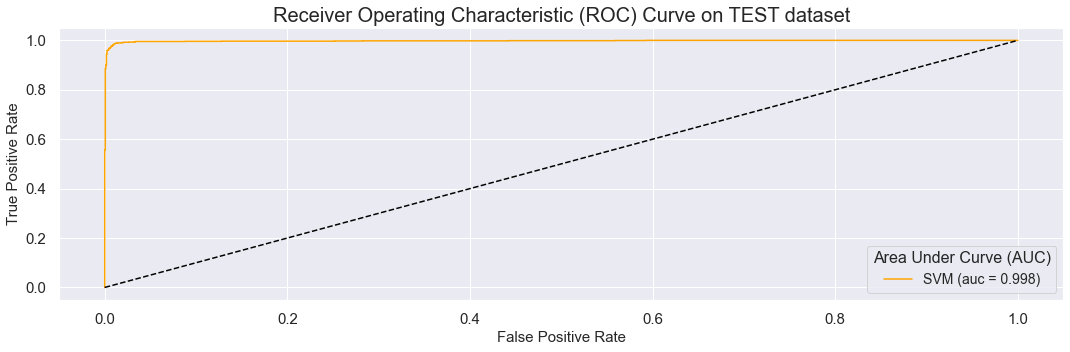

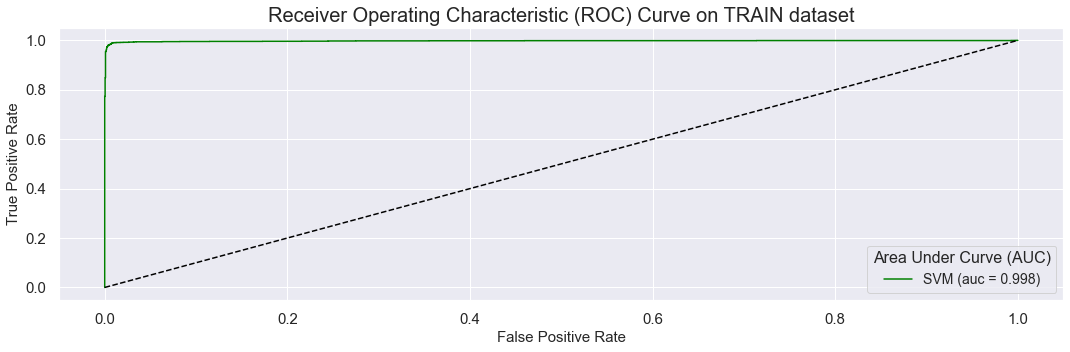

In [440]:
#Activation of early build function to plot ROC curves
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = SVM, X = X_test_SVM, y = y_test_SVM, df="test", color="orange", model_name = "SVM")
plot_roc_cur(model = SVM, X = X_train_SVM, y = y_train_SVM, df="train", color="green", model_name = "SVM")

### Easy to business interpretation plots - PROFIT and LIFT curves

In [441]:
#Probabilities
y_prob = SVM.predict_proba(X_test_SVM)

The graph shows what percentage of red and white wines the model catches in a given percentage of the scoring list. For example, in the top 10% of the list of both red and white wines with the highest score, the model catches 30% of the correct wine classifications. Model slightly better catches red wines.

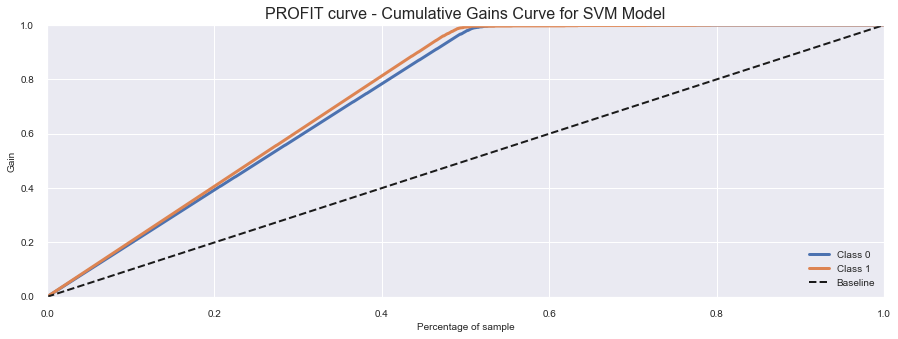

In [442]:
#PROFIT curve
skplt.metrics.plot_cumulative_gain(y_test_SVM,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for SVM Model')
plt.show()

The graph illustrates how many times the model is more effective at capturing wine type relative to classifying wines without using the model. For example, in the top 10% of the list of red and white wines with the highest score, the model correctly catches 2 times as many red wines, slightly worse is in terms of white wines.

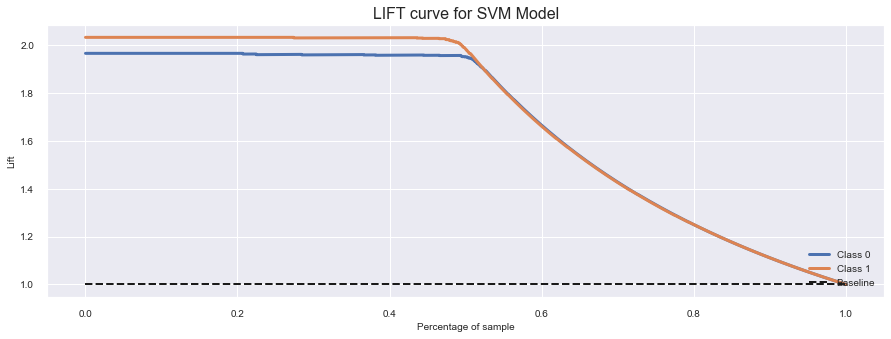

In [443]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_SVM,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for SVM Model')
plt.show()

### Results and export results to Excel file

In [444]:
#Results on full dataset (probabilities of 0 and 1)
X_all = data_modelling.loc[:, data.columns != "wine_type"].values
y_all_prob = SVM.predict_proba(X_all)

#Main DF and DF with probabilities
df_X_all = data_modelling
df_y_all_prob = pd.DataFrame(y_all_prob)

#Concatenation DF and probabilities
df_X_all_scored = pd.concat([df_X_all, df_y_all_prob * 100], axis = 1)
df_X_all_scored.rename(columns={0 : "Prob_0_white_wine", 1 : "Prob_1_red_wine"}, inplace=True)
df_X_all_scored

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  Prob_0_white_wine  \
0                          1                        0              0.000   
1                          1                        0              0.000   
2                          1                        0              0.000   
3                          1                        0             33.838   
4                          1                        0              0.000   
...                      ...                      ...                ...   
7917                       1                        0              0.001   
7918                       0                        0              0.000   
7919                       1                        0              0.569   
7920                       1                        0              9.480   
7921                       0                        0              0.000   

      Prob_1_red_wine  
0             100.000  
1             100.000  
2             100.000  
3              66.162  
4             100.000  
...               ...  
7917           99.999  
7918          100.000  
7919           99.431  
7920           90.520  
7921          100.000  

[7922 rows x 15 columns]

In [445]:
#Save columns with wine type and probabilities to Excel file
df_X_all_scored[["wine_type", "Prob_0_white_wine", "Prob_1_red_wine"]].to_excel("probabilities_results/prob_SVM.xlsx")
#Save all dataset with probabilities to Excel file
df_X_all_scored.to_excel("probabilities_results/all_df_SVM.xlsx")

## 9.4 Naive Bayes

### Tunning of hyper parameters in train test split

In [446]:
#X and y from dataset
X_NB = data_modelling.loc[:, data.columns != "wine_type"]
y_NB = data_modelling.loc[:, data.columns == "wine_type"]

#Loop to find optimal train / test split
for k in range(1, 10):
    X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_NB,
                                                                    y_NB,
                                                                    test_size = 0.1*k,
                                                                    random_state = 555)
    #NB model
    NB = GaussianNB()
    NB.fit(X = X_train_NB, y = y_train_NB)
    
    #Prediction on train dataset
    prediction_train_NB = NB.predict(X_train_NB)
    #Prediction on test dataset
    prediction_test_NB = NB.predict(X_test_NB)
    
    #Printing results
    print(f"test: {k/10}, Train AUC:", round(roc_auc_score(y_train_NB, prediction_train_NB), 3),
          "Test AUC:", round(roc_auc_score(y_test_NB, prediction_test_NB), 3))

test: 0.1, Train AUC: 0.941 Test AUC: 0.956
test: 0.2, Train AUC: 0.942 Test AUC: 0.945
test: 0.3, Train AUC: 0.941 Test AUC: 0.945
test: 0.4, Train AUC: 0.943 Test AUC: 0.944
test: 0.5, Train AUC: 0.946 Test AUC: 0.946
test: 0.6, Train AUC: 0.944 Test AUC: 0.946
test: 0.7, Train AUC: 0.942 Test AUC: 0.943
test: 0.8, Train AUC: 0.941 Test AUC: 0.945
test: 0.9, Train AUC: 0.94 Test AUC: 0.943


Configuration test = 0.5 and train = 0.5 gives the highest AUC on test dataset, moreover AUC results on train adn test datasets in this configuration gives similar results.

### Model building

In [447]:
#X and y from dataset
X_NB = data_modelling.loc[:, data.columns != "wine_type"]
y_NB = data_modelling.loc[:, data.columns == "wine_type"]

#Loop to find optimal train / test split
for k in range(1, 10):
    X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_NB,
                                                                    y_NB,
                                                                    train_size=0.5,
                                                                    test_size = 0.5,
                                                                    random_state = 666)
#NB model
NB = GaussianNB()
NB.fit(X = X_train_NB, y = y_train_NB)    
    
#Predictions on train and test datasets
TRAIN_pred_NB = NB.predict(X_train_NB)
TEST_pred_NB = NB.predict(X_test_NB)

## Model evaluation

### Confusion matrix

In [448]:
#Activation of early build function to calculate confusion matrix
conf_matrix(model_name = "NB",
            y_test = y_test_NB,
            pred_test = TEST_pred_NB)

Confusion matrix of NB
[[1774  217]
 [  18 1952]]
----------------------------------------
True Negative: 1774
False Positive: 217
False Negative: 18
True Positive: 1952
Correct Predictions 94.07 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.94 
 The Missclassification = 1-Accuracy =  0.06 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.99 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.89 
 Positive Predictive value = TP/(TP+FP) =  0.9 
 Negative predictive Value = TN/(TN+FN) =  0.99 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  9.09 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.01


### Classification report

In [449]:
#Activation of early build function to calculate classification report 
class_report(y_test = y_test_NB,
             y_train = y_train_NB,
             pred_test = TEST_pred_NB,
             pred_train = TRAIN_pred_NB,
             model_name = "NB")

Classification report of NB on TRAIN dataset:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1970
           1       0.90      0.99      0.94      1991

    accuracy                           0.94      3961
   macro avg       0.95      0.94      0.94      3961
weighted avg       0.95      0.94      0.94      3961

*******************************************************
Classification report of NB on TEST dataset:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1991
           1       0.90      0.99      0.94      1970

    accuracy                           0.94      3961
   macro avg       0.94      0.94      0.94      3961
weighted avg       0.95      0.94      0.94      3961



### Comparision of statistics on train and test datasets

In [450]:
#Activation of early build function to calculate statistics to compare train and test datasets 
stat_comparison(y_test = y_test_NB,
                y_train = y_train_NB,
                X_test = X_test_NB, 
                X_train = X_train_NB,
                pred_test = TEST_pred_NB,
                pred_train = TRAIN_pred_NB,
                model=NB)

Comparison of results on train and test dataset:


Accuracy  Precision  Recall    F1   AUC  Gini
Dataset                                               
TRAIN       0.940      0.900   0.990 0.940 0.995 0.990
TEST        0.940      0.900   0.990 0.940 0.995 0.990

### ROC curve

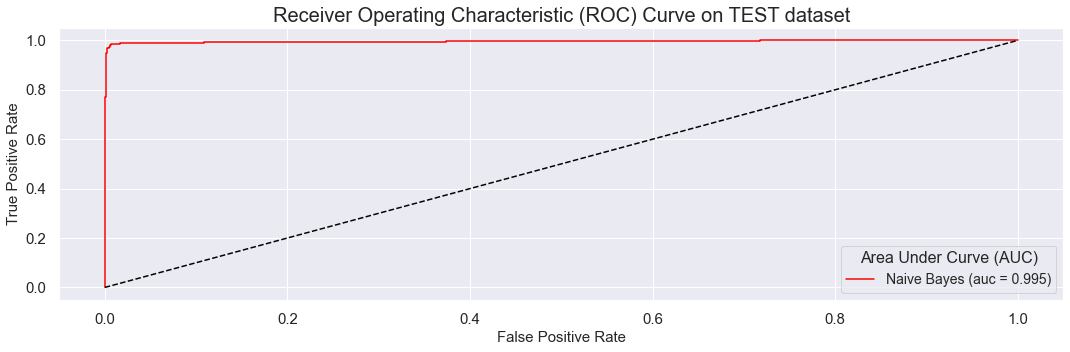

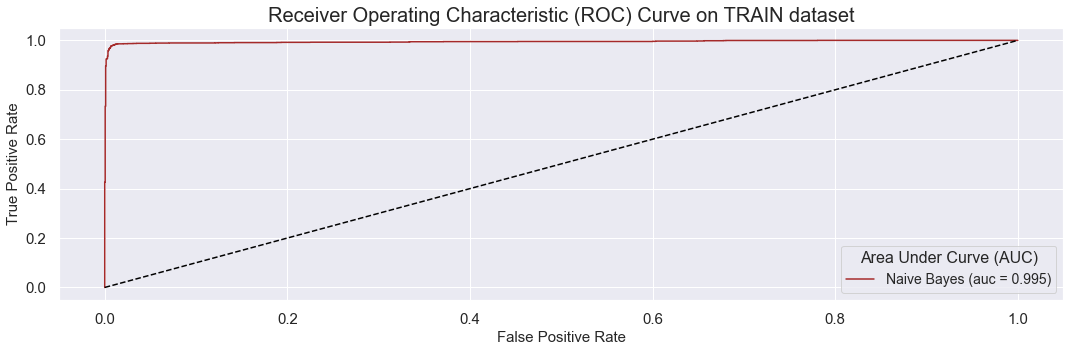

In [451]:
#Activation of early build function to plot ROC curves 
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = NB, X = X_test_NB, y = y_test_NB, df="test", color="red", model_name = "Naive Bayes")
plot_roc_cur(model = NB, X = X_train_NB, y = y_train_NB, df="train", color="brown", model_name = "Naive Bayes")

### Easy to business interpretation plots - PROFIT and LIFT curves

In [452]:
#Probabilities
y_prob = NB.predict_proba(X_test_NB)

The graph shows what percentage of red and white wines the model catches in a given percentage of the scoring list. For example, in the top 10% of the list of both red and white wines with the highest score, the model catches 30% of the correct wine classifications. Model slightly better catches red wines.

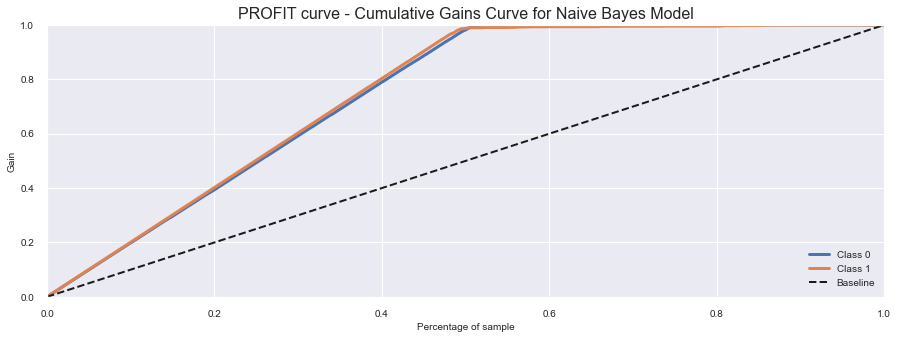

In [453]:
#PROFIT curve
skplt.metrics.plot_cumulative_gain(y_test_NB,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for Naive Bayes Model')
plt.show()

The graph illustrates how many times the model is more effective at capturing wine type relative to classifying wines without using the model. For example, in the top 10% of the list of red and white wines with the highest score, the model correctly catches 2 times as many red wines, slightly worse is in terms of white wines.

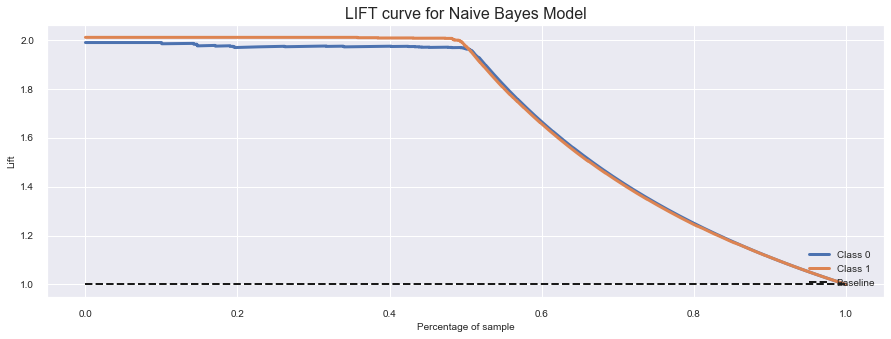

In [454]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_NB,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for Naive Bayes Model')
plt.show()

### Results and export results to Excel file

In [455]:
#Results on full dataset (probabilities of 0 and 1)
X_all = data_modelling.loc[:, data.columns != "wine_type"].values
y_all_prob = NB.predict_proba(X_all)

#Main DF and DF with probabilities
df_X_all = data_modelling
df_y_all_prob = pd.DataFrame(y_all_prob)

#Concatenation DF and probabilities
df_X_all_scored = pd.concat([df_X_all, df_y_all_prob * 100], axis = 1)
df_X_all_scored.rename(columns={0 : "Prob_0_white_wine", 1 : "Prob_1_red_wine"}, inplace=True)
df_X_all_scored

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  Prob_0_white_wine  \
0                          1                        0              0.000   
1                          1                        0              0.000   
2                          1                        0              0.000   
3                          1                        0              0.002   
4                          1                        0              0.000   
...                      ...                      ...                ...   
7917                       1                        0              0.000   
7918                       0                        0              0.000   
7919                       1                        0              0.001   
7920                       1                        0              0.009   
7921                       0                        0              0.000   

      Prob_1_red_wine  
0             100.000  
1             100.000  
2             100.000  
3              99.998  
4             100.000  
...               ...  
7917          100.000  
7918          100.000  
7919           99.999  
7920           99.991  
7921          100.000  

[7922 rows x 15 columns]

In [456]:
#Save columns with wine type and probabilities to Excel file
df_X_all_scored[["wine_type", "Prob_0_white_wine", "Prob_1_red_wine"]].to_excel("probabilities_results/prob_Naive_Bayes.xlsx")
#Save all dataset with probabilities to Excel file
df_X_all_scored.to_excel("probabilities_results/all_df_Naive_Bayes.xlsx")

## 9.5 Decision Tree

In [457]:
#X and y from dataset
X_DT = data_modelling.loc[:, data.columns != "wine_type"].columns.tolist()
y_DT = data_modelling.loc[:, data.columns == "wine_type"].columns.tolist()

In [458]:
#Wrapper for cross validation with 5 folders - *args and **kwargs appear at the end - lists of parameters given as a dictionary
#or list.
def CVTestRFClass(nFolds = 5, randomState=2020, debug=False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    #Lists for results
    testResults = []
    trainResults = []
    predictions = []
    indices = []

    #Loop validating the model on successive folds
    for train_DT, test_DT in kf.split(data_modelling.index.values):
        #Preparing of estimator
        DT = DecisionTreeClassifier(*args, **kwargs, random_state=randomState)
        if debug:
            print(DT)
        #Training model
        DT.fit(data_modelling.iloc[train_DT][X_DT], data_modelling.iloc[train_DT][y_DT])

        #Predictions for train adn test datasets
        predictions_train = DT.predict_proba(data_modelling.iloc[train_DT][X_DT])[:,1]
        predictions_test = DT.predict_proba(data_modelling.iloc[test_DT][X_DT])[:,1]
        
        #Let's keep the prediction information for this fold
        predictions.append(predictions_test.tolist().copy())
        
        #Together with the indexes in the original data frame
        indices.append(data_modelling.iloc[test_DT].index.tolist().copy())
        
        #Calculation of ROC-AUC
        trainScore = roc_auc_score((data_modelling[y_DT].iloc[train_DT]==1).astype(int), predictions_train)
        testScore = roc_auc_score((data_modelling[y_DT].iloc[test_DT]==1).astype(int), predictions_test)
        
        #Saving results to lists
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        #We can optionally display information about each folio along with the training results
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [459]:
#Training of linear model (with default hyperparameter C)
trainResults, testResults, predictions, indexes = CVTestRFClass()
#Display mean results for training set and test set from 5 folds
print(np.mean(trainResults),"***", np.mean(testResults))

0.9999999701231992 *** 0.9842447892750507


In [460]:
#Loop to find the best configuration of hyper parameters in cross validation with 5 folds

#Empty lists for hyper parameters from loop
criterion_list = list()
splitter_list = list()
max_depth_list = list()
mss_list = list()
msl_list = list()
max_features_list = list()
mean_TRAIN_list = list()
mean_TEST_list = list()

#Loop with hyper parameters - because of extremely long time of execution of tunning of hyper parameters in loop
#with a lot of hyper parameters, range of hyper parameters was reduced
print("criterion || splitter || max_depth || min_samples_split || min_samples_leaf || max_features || mean_test_result || mean_train_resul || train_test_difference")
print("============================================================================================================================================================")
for criterion  in ["gini", "entropy"]:
    for splitter in ["best", "random"]: 
        for max_depth in [3, 4, 5, 10, 12, 15, 20]: 
            for min_samples_split in [2, 3, 4]: 
                for min_samples_leaf in [1, 2, 3, 4]:
                    for max_features in ["auto", "sqrt", "log2"]:
                        trainResults, testResults, predictions, indices = CVTestRFClass(debug=False,
                                                                                        criterion=criterion,
                                                                                        splitter=splitter,
                                                                                        max_depth=max_depth,
                                                                                        min_samples_split=min_samples_split,
                                                                                        min_samples_leaf= min_samples_leaf,
                                                                                        max_features=max_features)
                        #Append values from loop to lists
                        criterion_list.append(criterion)
                        splitter_list.append(splitter)
                        max_depth_list.append(max_depth)
                        mss_list.append(min_samples_split)
                        msl_list.append(min_samples_leaf)
                        max_features_list.append(max_features)
                        mean_TRAIN_list.append(np.mean(trainResults))
                        mean_TEST_list.append(np.mean(testResults))
                
                        #Display mean results for training set and test set from 5 folds in different hyper parameters config. 
                        print(criterion, "||",
                        splitter, "||",
                        max_depth,"||",
                        min_samples_split, "||",
                        min_samples_leaf, "||",
                        max_features, "||",
                        np.mean(testResults), "||",
                        np.mean(trainResults), "||",
                        (np.mean(trainResults) - np.mean(testResults)))
      
                        # #Save results of hyperparameters tunning in Data Frame
                        df = pd.DataFrame()
                        df["criterion"] =  criterion_list
                        df["splitter"] = splitter_list
                        df["max_depth"] = max_depth_list
                        df["min_samples_split"] = mss_list
                        df["min_samples_leaf"] = msl_list
                        df["max_features"] = max_features_list
                        df["mean_TEST"] = mean_TEST_list
                        df["mean_TRAIN"] = mean_TRAIN_list
                        df["TRAIN_TEST_difference"] = df["mean_TRAIN"] - df["mean_TEST"]

criterion || splitter || max_depth || min_samples_split || min_samples_leaf || max_features || mean_test_result || mean_train_resul || train_test_difference
gini || best || 3 || 2 || 1 || auto || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 || 2 || 1 || sqrt || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 || 2 || 1 || log2 || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 || 2 || 2 || auto || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 || 2 || 2 || sqrt || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 || 2 || 2 || log2 || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 || 2 || 3 || auto || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 || 2 || 3 || sqrt || 0.951504684749651 || 0.9581014263537868 || 0.006596741604135814
gini || best || 3 |

gini || best || 5 || 2 || 2 || sqrt || 0.9789812942542149 || 0.9865340800541009 || 0.007552785799886053
gini || best || 5 || 2 || 2 || log2 || 0.9789812942542149 || 0.9865340800541009 || 0.007552785799886053
gini || best || 5 || 2 || 3 || auto || 0.9789529160055584 || 0.9865172266171864 || 0.007564310611627989
gini || best || 5 || 2 || 3 || sqrt || 0.9789529160055584 || 0.9865172266171864 || 0.007564310611627989
gini || best || 5 || 2 || 3 || log2 || 0.9789529160055584 || 0.9865172266171864 || 0.007564310611627989
gini || best || 5 || 2 || 4 || auto || 0.97988668603496 || 0.9861190743134871 || 0.006232388278527123
gini || best || 5 || 2 || 4 || sqrt || 0.97988668603496 || 0.9861190743134871 || 0.006232388278527123
gini || best || 5 || 2 || 4 || log2 || 0.97988668603496 || 0.9861190743134871 || 0.006232388278527123
gini || best || 5 || 3 || 1 || auto || 0.9792003592282452 || 0.9864246340398679 || 0.0072242748116226885
gini || best || 5 || 3 || 1 || sqrt || 0.9792003592282452 || 0.986424

gini || best || 12 || 3 || 1 || auto || 0.979268562038939 || 0.9999432086904931 || 0.020674646651554163
gini || best || 12 || 3 || 1 || sqrt || 0.979268562038939 || 0.9999432086904931 || 0.020674646651554163
gini || best || 12 || 3 || 1 || log2 || 0.979268562038939 || 0.9999432086904931 || 0.020674646651554163
gini || best || 12 || 3 || 2 || auto || 0.983681703948546 || 0.9999091411523799 || 0.016227437203833905
gini || best || 12 || 3 || 2 || sqrt || 0.983681703948546 || 0.9999091411523799 || 0.016227437203833905
gini || best || 12 || 3 || 2 || log2 || 0.983681703948546 || 0.9999091411523799 || 0.016227437203833905
gini || best || 12 || 3 || 3 || auto || 0.9870253902511532 || 0.9998110757778873 || 0.012785685526734092
gini || best || 12 || 3 || 3 || sqrt || 0.9870253902511532 || 0.9998110757778873 || 0.012785685526734092
gini || best || 12 || 3 || 3 || log2 || 0.9870253902511532 || 0.9998110757778873 || 0.012785685526734092
gini || best || 12 || 3 || 4 || auto || 0.9849791597803355 ||

gini || best || 20 || 3 || 3 || log2 || 0.9867678021639351 || 0.9998155711165999 || 0.013047768952664796
gini || best || 20 || 3 || 4 || auto || 0.9877352550580716 || 0.9996487604027766 || 0.011913505344705033
gini || best || 20 || 3 || 4 || sqrt || 0.9877352550580716 || 0.9996487604027766 || 0.011913505344705033
gini || best || 20 || 3 || 4 || log2 || 0.9877352550580716 || 0.9996487604027766 || 0.011913505344705033
gini || best || 20 || 4 || 1 || auto || 0.9813746738372175 || 0.9999861871534167 || 0.018611513316199146
gini || best || 20 || 4 || 1 || sqrt || 0.9813746738372175 || 0.9999861871534167 || 0.018611513316199146
gini || best || 20 || 4 || 1 || log2 || 0.9813746738372175 || 0.9999861871534167 || 0.018611513316199146
gini || best || 20 || 4 || 2 || auto || 0.9842009366712059 || 0.999928374547963 || 0.015727437876757122
gini || best || 20 || 4 || 2 || sqrt || 0.9842009366712059 || 0.999928374547963 || 0.015727437876757122
gini || best || 20 || 4 || 2 || log2 || 0.984200936671205

gini || random || 4 || 4 || 2 || sqrt || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 4 || 4 || 2 || log2 || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 4 || 4 || 3 || auto || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 4 || 4 || 3 || sqrt || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 4 || 4 || 3 || log2 || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 4 || 4 || 4 || auto || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 4 || 4 || 4 || sqrt || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 4 || 4 || 4 || log2 || 0.914483375562704 || 0.9154005790796708 || 0.0009172035169667803
gini || random || 5 || 2 || 1 || auto || 0.9309592147632779 || 0.9334837700586818 || 0.002524555295403852
gini || random || 5 || 2 || 1 || sqrt || 0.930

gini || random || 10 || 4 || 4 || sqrt || 0.982124592094635 || 0.9899309432128884 || 0.007806351118253452
gini || random || 10 || 4 || 4 || log2 || 0.982124592094635 || 0.9899309432128884 || 0.007806351118253452
gini || random || 12 || 2 || 1 || auto || 0.9806740713699409 || 0.9981742044371196 || 0.01750013306717868
gini || random || 12 || 2 || 1 || sqrt || 0.9806740713699409 || 0.9981742044371196 || 0.01750013306717868
gini || random || 12 || 2 || 1 || log2 || 0.9806740713699409 || 0.9981742044371196 || 0.01750013306717868
gini || random || 12 || 2 || 2 || auto || 0.9789841280999161 || 0.9900904454886954 || 0.011106317388779319
gini || random || 12 || 2 || 2 || sqrt || 0.9789841280999161 || 0.9900904454886954 || 0.011106317388779319
gini || random || 12 || 2 || 2 || log2 || 0.9789841280999161 || 0.9900904454886954 || 0.011106317388779319
gini || random || 12 || 2 || 3 || auto || 0.9834410737389454 || 0.9931054912362139 || 0.00966441749726854
gini || random || 12 || 2 || 3 || sqrt || 0

gini || random || 20 || 2 || 2 || sqrt || 0.9845430073794693 || 0.9987859125008072 || 0.014242905121337857
gini || random || 20 || 2 || 2 || log2 || 0.9845430073794693 || 0.9987859125008072 || 0.014242905121337857
gini || random || 20 || 2 || 3 || auto || 0.9856897992152028 || 0.9981083873815209 || 0.012418588166318023
gini || random || 20 || 2 || 3 || sqrt || 0.9856897992152028 || 0.9981083873815209 || 0.012418588166318023
gini || random || 20 || 2 || 3 || log2 || 0.9856897992152028 || 0.9981083873815209 || 0.012418588166318023
gini || random || 20 || 2 || 4 || auto || 0.984983223245526 || 0.9945496792086658 || 0.009566455963139764
gini || random || 20 || 2 || 4 || sqrt || 0.984983223245526 || 0.9945496792086658 || 0.009566455963139764
gini || random || 20 || 2 || 4 || log2 || 0.984983223245526 || 0.9945496792086658 || 0.009566455963139764
gini || random || 20 || 3 || 1 || auto || 0.9797557880107737 || 0.9999600626989082 || 0.02020427468813457
gini || random || 20 || 3 || 1 || sqrt ||

entropy || best || 4 || 2 || 4 || sqrt || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 2 || 4 || log2 || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 1 || auto || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 1 || sqrt || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 1 || log2 || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 2 || auto || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 2 || sqrt || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 2 || log2 || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 3 || auto || 0.9817909604232433 || 0.9848250399338573 || 0.003034079510613963
entropy || best || 4 || 3 || 3 || sqr

entropy || best || 10 || 3 || 2 || sqrt || 0.9860064822449663 || 0.9999065148666443 || 0.013900032621677938
entropy || best || 10 || 3 || 2 || log2 || 0.9860064822449663 || 0.9999065148666443 || 0.013900032621677938
entropy || best || 10 || 3 || 3 || auto || 0.9862800585209772 || 0.9998160490746745 || 0.013535990553697252
entropy || best || 10 || 3 || 3 || sqrt || 0.9862800585209772 || 0.9998160490746745 || 0.013535990553697252
entropy || best || 10 || 3 || 3 || log2 || 0.9862800585209772 || 0.9998160490746745 || 0.013535990553697252
entropy || best || 10 || 3 || 4 || auto || 0.9878756725532438 || 0.9997160689863117 || 0.01184039643306789
entropy || best || 10 || 3 || 4 || sqrt || 0.9878756725532438 || 0.9997160689863117 || 0.01184039643306789
entropy || best || 10 || 3 || 4 || log2 || 0.9878756725532438 || 0.9997160689863117 || 0.01184039643306789
entropy || best || 10 || 4 || 1 || auto || 0.9854220126816354 || 0.9999541603673616 || 0.014532147685726193
entropy || best || 10 || 4 || 1

entropy || best || 15 || 3 || 4 || sqrt || 0.98700135535219 || 0.9997735308665417 || 0.012772175514351725
entropy || best || 15 || 3 || 4 || log2 || 0.98700135535219 || 0.9997735308665417 || 0.012772175514351725
entropy || best || 15 || 4 || 1 || auto || 0.9830582054250753 || 0.9999938353421272 || 0.016935629917051886
entropy || best || 15 || 4 || 1 || sqrt || 0.9830582054250753 || 0.9999938353421272 || 0.016935629917051886
entropy || best || 15 || 4 || 1 || log2 || 0.9830582054250753 || 0.9999938353421272 || 0.016935629917051886
entropy || best || 15 || 4 || 2 || auto || 0.9833174261647593 || 0.999954118272165 || 0.016636692107405704
entropy || best || 15 || 4 || 2 || sqrt || 0.9833174261647593 || 0.999954118272165 || 0.016636692107405704
entropy || best || 15 || 4 || 2 || log2 || 0.9833174261647593 || 0.999954118272165 || 0.016636692107405704
entropy || best || 15 || 4 || 3 || auto || 0.9852217914010101 || 0.9998805565674296 || 0.014658765166419507
entropy || best || 15 || 4 || 3 || 

entropy || random || 3 || 4 || 2 || sqrt || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 3 || 4 || 2 || log2 || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 3 || 4 || 3 || auto || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 3 || 4 || 3 || sqrt || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 3 || 4 || 3 || log2 || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 3 || 4 || 4 || auto || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 3 || 4 || 4 || sqrt || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 3 || 4 || 4 || log2 || 0.8760696871544251 || 0.8769403604374271 || 0.0008706732830019437
entropy || random || 4 || 2 || 1 || auto || 0.9147954697018138 || 0.9154352990007031 || 0.0006398292988892829
entropy ||

entropy || random || 5 || 4 || 3 || log2 || 0.9273636983037683 || 0.9282962808999631 || 0.0009325825961947753
entropy || random || 5 || 4 || 4 || auto || 0.9272710345346601 || 0.9280615885693229 || 0.0007905540346627715
entropy || random || 5 || 4 || 4 || sqrt || 0.9272710345346601 || 0.9280615885693229 || 0.0007905540346627715
entropy || random || 5 || 4 || 4 || log2 || 0.9272710345346601 || 0.9280615885693229 || 0.0007905540346627715
entropy || random || 10 || 2 || 1 || auto || 0.9758535940936464 || 0.9899144346542222 || 0.014060840560575882
entropy || random || 10 || 2 || 1 || sqrt || 0.9758535940936464 || 0.9899144346542222 || 0.014060840560575882
entropy || random || 10 || 2 || 1 || log2 || 0.9758535940936464 || 0.9899144346542222 || 0.014060840560575882
entropy || random || 10 || 2 || 2 || auto || 0.984546874507412 || 0.9930338478080124 || 0.008486973300600442
entropy || random || 10 || 2 || 2 || sqrt || 0.984546874507412 || 0.9930338478080124 || 0.008486973300600442
entropy || r

entropy || random || 15 || 2 || 1 || auto || 0.9748583339264674 || 0.999851478206665 || 0.02499314428019761
entropy || random || 15 || 2 || 1 || sqrt || 0.9748583339264674 || 0.999851478206665 || 0.02499314428019761
entropy || random || 15 || 2 || 1 || log2 || 0.9748583339264674 || 0.999851478206665 || 0.02499314428019761
entropy || random || 15 || 2 || 2 || auto || 0.9876985472997111 || 0.9990578886859074 || 0.01135934138619632
entropy || random || 15 || 2 || 2 || sqrt || 0.9876985472997111 || 0.9990578886859074 || 0.01135934138619632
entropy || random || 15 || 2 || 2 || log2 || 0.9876985472997111 || 0.9990578886859074 || 0.01135934138619632
entropy || random || 15 || 2 || 3 || auto || 0.987838373558993 || 0.9967127635122577 || 0.008874389953264727
entropy || random || 15 || 2 || 3 || sqrt || 0.987838373558993 || 0.9967127635122577 || 0.008874389953264727
entropy || random || 15 || 2 || 3 || log2 || 0.987838373558993 || 0.9967127635122577 || 0.008874389953264727
entropy || random || 1

In [461]:
#The best combination of hyper parameters in Decision Tree model based on mean results on TEST dataset
df.sort_values(by="mean_TEST", ascending=False)

criterion splitter  max_depth  min_samples_split  min_samples_leaf  \
907   entropy   random         12                  2                 3   
908   entropy   random         12                  2                 3   
918   entropy   random         12                  3                 3   
932   entropy   random         12                  4                 3   
931   entropy   random         12                  4                 3   
..        ...      ...        ...                ...               ...   
266      gini   random          3                  3                 1   
267      gini   random          3                  3                 2   
268      gini   random          3                  3                 2   
269      gini   random          3                  3                 2   
791   entropy   random          3                  4                 4   

    max_features  mean_TEST  mean_TRAIN  TRAIN_TEST_difference  
907         sqrt      0.989       0.998                  0.009  
908         log2      0.989       0.998                  0.009  
918         auto      0.989       0.998                  0.009  
932         log2      0.989       0.998                  0.009  
931         sqrt      0.989       0.998                  0.009  
..           ...        ...         ...                    ...  
266         log2      0.876       0.877                  0.001  
267         auto      0.876       0.877                  0.001  
268         sqrt      0.876       0.877                  0.001  
269         log2      0.876       0.877                  0.001  
791         log2      0.876       0.877                  0.001  

[1008 rows x 9 columns]

### Tunning of hyper parameters in train test split

In [462]:
#X and y from dataset
X_DT = data_modelling.loc[:, data.columns != "wine_type"]
y_DT = data_modelling.loc[:, data.columns == "wine_type"]

#Loop to find optimal train / test split
for k in range(1, 10):
    X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT,
                                                                    y_DT,
                                                                    test_size = 0.1*k,
                                                                    random_state = 777)
    
    #Decision Tree model wtih hyper parameters after tunning
    DT = DecisionTreeClassifier(criterion = "gini",
                                splitter = "random",
                                max_depth = 12,
                                min_samples_split = 2,
                                min_samples_leaf = 3,
                                max_features = "sqrt")
    DT.fit(X = X_train_DT, y = y_train_DT)
    
    #Prediction on train dataset
    prediction_train_DT = DT.predict(X_train_DT)
    #Prediction on test dataset
    prediction_test_DT = DT.predict(X_test_DT)
    
    #Printing results
    print(f"test: {k/10}, Train AUC:", round(roc_auc_score(y_train_DT, prediction_train_DT), 3),
          "Test AUC:", round(roc_auc_score(y_test_DT, prediction_test_DT), 3))

test: 0.1, Train AUC: 0.943 Test AUC: 0.943
test: 0.2, Train AUC: 0.891 Test AUC: 0.887
test: 0.3, Train AUC: 0.95 Test AUC: 0.945
test: 0.4, Train AUC: 0.968 Test AUC: 0.96
test: 0.5, Train AUC: 0.956 Test AUC: 0.941
test: 0.6, Train AUC: 0.941 Test AUC: 0.932
test: 0.7, Train AUC: 0.976 Test AUC: 0.97
test: 0.8, Train AUC: 0.961 Test AUC: 0.955
test: 0.9, Train AUC: 0.965 Test AUC: 0.958


Configuration test = 0.4 and train = 0.6 gives the highest AUC on test dataset, moreover AUC results on train adn test datasets in this configuration gives similar results.

### Model building

In [463]:
#X and y from dataset
X_DT = data_modelling.loc[:, data.columns != "wine_type"]
y_DT = data_modelling.loc[:, data.columns == "wine_type"]

#Split dataset to train and test
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT,
                                                                y_DT,
                                                                train_size = 0.6,
                                                                test_size = 0.4,
                                                                random_state = 888)

#Build and train dECISION tREE model with hyper parameters after tunning and choosing the best train test split combination
DT = DecisionTreeClassifier(criterion = "gini",
                            splitter = "random",
                            max_depth = 12,
                            min_samples_split = 2,
                            min_samples_leaf = 3,
                            max_features = "sqrt")
DT = DT.fit(X = X_train_DT, y = y_train_DT)

#Predictions on train and test datasets
TRAIN_pred_DT = DT.predict(X_train_DT)
TEST_pred_DT = DT.predict(X_test_DT)

## Model evaluation

### Confusion matrix

In [464]:
#Activation of early build function to calculate cofusion matrix
conf_matrix(model_name = "Decision Tree",
            y_test = y_test_DT,
            pred_test = TEST_pred_DT)

Confusion matrix of Decision Tree
[[789  28]
 [ 23 745]]
----------------------------------------
True Negative: 789
False Positive: 28
False Negative: 23
True Positive: 745
Correct Predictions 96.78 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.97 
 The Missclassification = 1-Accuracy =  0.03 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.97 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.97 
 Positive Predictive value = TP/(TP+FP) =  0.96 
 Negative predictive Value = TN/(TN+FN) =  0.97 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  28.3 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.03


### Classification report

In [465]:
#Activation of early build function to calculate classification report 
class_report(y_test = y_test_DT,
             y_train = y_train_DT,
             pred_test = TEST_pred_DT,
             pred_train = TRAIN_pred_DT,
             model_name = "Decision Tree")

Classification report of Decision Tree on TRAIN dataset:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3144
           1       0.98      0.97      0.98      3193

    accuracy                           0.98      6337
   macro avg       0.98      0.98      0.98      6337
weighted avg       0.98      0.98      0.98      6337

*******************************************************
Classification report of Decision Tree on TEST dataset:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       817
           1       0.96      0.97      0.97       768

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585



### Comparision of statistics on train and test datasets

In [466]:
#Activation of early build function to calculate statistics to compare train and test datasets 
stat_comparison(y_test = y_test_DT,
                y_train = y_train_DT,
                X_test = X_test_DT, 
                X_train = X_train_DT,
                pred_test = TEST_pred_DT,
                pred_train = TRAIN_pred_DT,
                model = DT)

Comparison of results on train and test dataset:


Accuracy  Precision  Recall    F1   AUC  Gini
Dataset                                               
TRAIN       0.980      0.980   0.970 0.980 0.997 0.990
TEST        0.970      0.960   0.970 0.970 0.986 0.970

### ROC curve

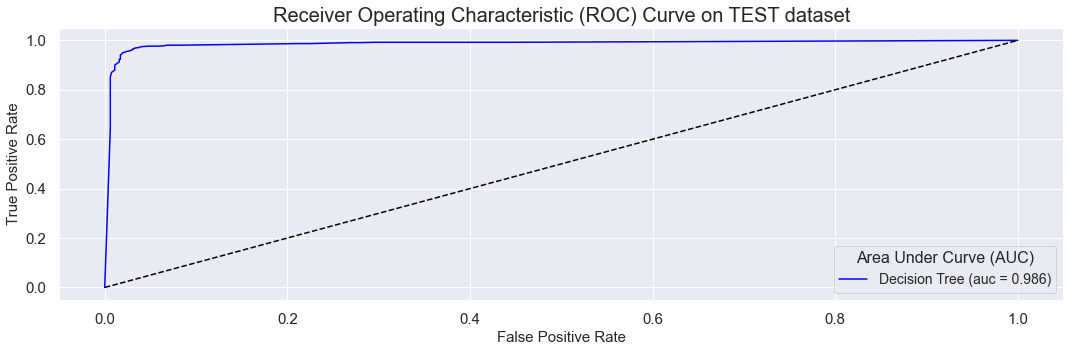

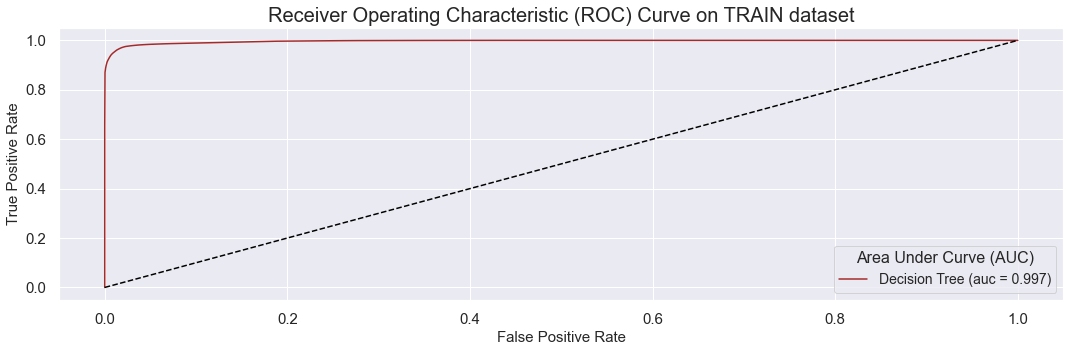

In [467]:
#Activation of early build function to calculate statistics to plot ROC curves
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = DT, X = X_test_DT, y = y_test_DT, df="test", color="blue", model_name = "Decision Tree")
plot_roc_cur(model = DT, X = X_train_DT, y = y_train_DT, df="train", color="brown", model_name = "Decision Tree")

### Easy to business interpretation plots - PROFIT and LIFT curves

In [468]:
#Probabilities
y_prob = NB.predict_proba(X_test_NB)

The graph shows what percentage of red and white wines the model catches in a given percentage of the scoring list. For example, in the top 10% of the list of both red and white wines with the highest score, the model catches 30% of the correct wine classifications. Model slightly better catches red wines.

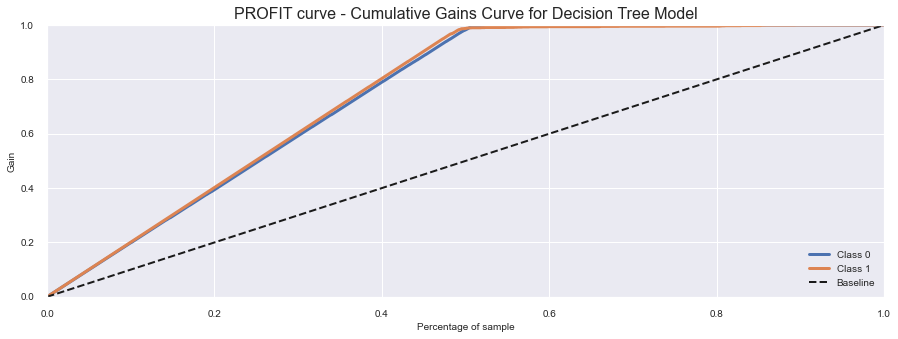

In [469]:
#PROFIT curve
skplt.metrics.plot_cumulative_gain(y_test_NB,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for Decision Tree Model')
plt.show()

The graph illustrates how many times the model is more effective at capturing wine type relative to classifying wines without using the model. For example, in the top 10% of the list of red and white wines with the highest score, the model correctly catches 2 times as many red wines, slightly worse is in terms of white wines.

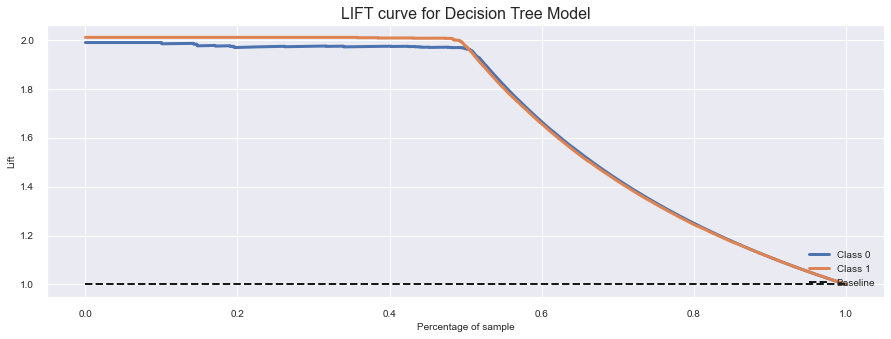

In [470]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_NB,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for Decision Tree Model')
plt.show()

### Results and export results to Excel file

In [471]:
#Results on full dataset (probabilities of 0 and 1)
X_all = data_modelling.loc[:, data.columns != "wine_type"].values
y_all_prob = DT.predict_proba(X_all)

#Main DF and DF with probabilities
df_X_all = data_modelling
df_y_all_prob = pd.DataFrame(y_all_prob)

#Concatenation DF and probabilities
df_X_all_scored = pd.concat([df_X_all, df_y_all_prob * 100], axis = 1)
df_X_all_scored.rename(columns={0 : "Prob_0_white_wine", 1 : "Prob_1_red_wine"}, inplace=True)
df_X_all_scored

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  Prob_0_white_wine  \
0                          1                        0              0.146   
1                          1                        0              0.000   
2                          1                        0              0.000   
3                          1                        0              0.000   
4                          1                        0              0.000   
...                      ...                      ...                ...   
7917                       1                        0              0.000   
7918                       0                        0              0.000   
7919                       1                        0              0.000   
7920                       1                        0             25.000   
7921                       0                        0              0.000   

      Prob_1_red_wine  
0              99.854  
1             100.000  
2             100.000  
3             100.000  
4             100.000  
...               ...  
7917          100.000  
7918          100.000  
7919          100.000  
7920           75.000  
7921          100.000  

[7922 rows x 15 columns]

In [472]:
#Save columns with wine type and probabilities to Excel file
df_X_all_scored[["wine_type", "Prob_0_white_wine", "Prob_1_red_wine"]].to_excel("probabilities_results/prob_Decision_Tree.xlsx")
#Save all dataset with probabilities to Excel file
df_X_all_scored.to_excel("probabilities_results/all_df_Decision_Tree.xlsx")

## 9.6 Random Forest

In [473]:
#X and y from dataset
X_RF = data_modelling.loc[:, data.columns != "wine_type"].columns.tolist()
y_RF = data_modelling.loc[:, data.columns == "wine_type"].columns.tolist()

In [474]:
#Wrapper for cross validation with 5 folders - *args and **kwargs appear at the end - lists of parameters given as a dictionary
#or list.
def CVTestRFClass(nFolds = 5, randomState=2020, debug=False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    #Lists for results
    testResults = []
    trainResults = []
    predictions = []
    indices = []

    #Loop validating the model on successive folds
    for train_RF, test_RF in kf.split(data_modelling.index.values):
        #Preparation of estimator
        RF = RandomForestClassifier(*args, **kwargs, random_state=randomState, n_jobs=-1)
        if debug:
            print(RF)
        #Model training
        RF.fit(data_modelling.iloc[train_RF][X_RF], data_modelling.iloc[train_RF][y_RF])

        #Predictions for train and test datasets
        predictions_train = RF.predict_proba(data_modelling.iloc[train_RF][X_RF])[:,1]
        predictions_test = RF.predict_proba(data_modelling.iloc[test_RF][X_RF])[:,1]
        
        #Let's keep the prediction information for this folio
        predictions.append(predictions_test.tolist().copy())
        
        #Together with the indexes in the original data frame
        indices.append(data_modelling.iloc[test_RF].index.tolist().copy())
        
        #Calculation of ROC-AUC
        trainScore = roc_auc_score((data_modelling[y_RF].iloc[train_RF]==1).astype(int), predictions_train)
        testScore = roc_auc_score((data_modelling[y_RF].iloc[test_RF]==1).astype(int), predictions_test)
        
        #Saving results to lists
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        #We can optionally display information about each folio along with the training results
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [475]:
trainResults, testResults, predictions, indices = CVTestRFClass(debug=True)
print(np.mean(testResults),"**", np.mean(trainResults))

RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999999501944905 Valid AUC: 0.9986530490000223
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 1.0 Valid AUC: 0.9998756107829505
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999999502099199 Valid AUC: 0.9998588210520942
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 1.0 Valid AUC: 0.999507801780529
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999998506347575 Valid AUC: 0.9999234693877551
0.9995637504006701 ** 0.9999999502078335


In [476]:
#Loop to find the best configuration of hyper parameters in cross validation with 5 folds

#Empty lists for hyper parameters from loop
criterion_list = list()
max_depth_list = list()
mss_list = list()
msl_list = list()
max_features_list = list()
bootstrap_list = list()
estimators_list = list()
mean_TRAIN_list = list()
mean_TEST_list = list()

#Loop with hyper parameters - because of extremely long time of execution of tunning of hyper parameters in loop
#with a lot of hyper parameters, range of hyper parameters was reduced
print("criterion || max_depth || min_samples_split || min_samples_leaf || max_features || n_estimators || bootstrap || mean_test || mean_train || train_test_difference")
print("================================================================================================================================================================")
for criterion  in ["gini", "entropy"]:
    for max_depth in [3, 5, 10, 15, 20]: 
        for min_samples_split in [2, 3, 4]: 
            for min_samples_leaf in [1, 2, 3]:
                for max_features in ["auto", "sqrt", "log2"]:
                    for n_estimators in [10, 50, 200, 500, 1000]:
                        for bootstrap in [True]:
                            trainResults, testResults, predictions, indices = CVTestRFClass(debug=False,
                                                                                        criterion=criterion,
                                                                                        max_depth=max_depth,
                                                                                        min_samples_split=min_samples_split,
                                                                                        min_samples_leaf= min_samples_leaf,
                                                                                        max_features=max_features,
                                                                                        n_estimators = n_estimators,
                                                                                        bootstrap = bootstrap)
                        #Append values from loop to lists
                        criterion_list.append(criterion)
                        splitter_list.append(splitter)
                        max_depth_list.append(max_depth)
                        mss_list.append(min_samples_split)
                        msl_list.append(min_samples_leaf)
                        max_features_list.append(max_features)
                        estimators_list.append(n_estimators)
                        bootstrap_list.append(bootstrap)
                        mean_TRAIN_list.append(np.mean(trainResults))
                        mean_TEST_list.append(np.mean(testResults))
                
                        #Display mean results for training set and test set from 5 folds in different hyper parameters config. 
                        print(criterion, "||",
                        max_depth,"||",
                        min_samples_split, "||",
                        min_samples_leaf, "||",
                        max_features, "||",
                        n_estimators, "||",
                        bootstrap, "||",
                        np.mean(testResults), "||",
                        np.mean(trainResults), "||",
                        (np.mean(trainResults) - np.mean(testResults)))
      
                        # #Save results of hyperparameters tunning in Data Frame
                        df = pd.DataFrame()
                        df["criterion"] =  criterion_list
                        df["max_depth"] = max_depth_list
                        df["min_samples_split"] = mss_list
                        df["min_samples_leaf"] = mss_list
                        df["max_features"] = max_features_list
                        df["n_estimators"] = estimators_list
                        df["bootstrap"] = bootstrap_list
                        df["mean_TEST"] = mean_TEST_list
                        df["mean_TRAIN"] = mean_TRAIN_list
                        df["TRAIN_TEST_difference"] = df["mean_TRAIN"] - df["mean_TEST"]

criterion || max_depth || min_samples_split || min_samples_leaf || max_features || n_estimators || bootstrap || mean_test || mean_train || train_test_difference
gini || 3 || 2 || 1 || auto || 10 || True || 0.9979967722699934 || 0.9980476973359039 || 5.092506591053425e-05
gini || 3 || 2 || 1 || auto || 50 || True || 0.9985279565642795 || 0.9985833172820021 || 5.5360717722607866e-05
gini || 3 || 2 || 1 || auto || 200 || True || 0.9986046671013851 || 0.9987433709792469 || 0.00013870387786185656
gini || 3 || 2 || 1 || auto || 500 || True || 0.9985865075434477 || 0.9987399824131492 || 0.0001534748697015198
gini || 3 || 2 || 1 || auto || 1000 || True || 0.998585535402111 || 0.9987341487031376 || 0.00014861330102655668
gini || 3 || 2 || 1 || sqrt || 10 || True || 0.9979967722699934 || 0.9980476973359039 || 5.092506591053425e-05
gini || 3 || 2 || 1 || sqrt || 50 || True || 0.9985279565642795 || 0.9985833172820021 || 5.5360717722607866e-05
gini || 3 || 2 || 1 || sqrt || 200 || True || 0.9986046

gini || 3 || 3 || 2 || log2 || 50 || True || 0.9985292312911505 || 0.998583058359154 || 5.382706800349801e-05
gini || 3 || 3 || 2 || log2 || 200 || True || 0.9986088130783497 || 0.9987410006029951 || 0.00013218752464538852
gini || 3 || 3 || 2 || log2 || 500 || True || 0.9985826812568728 || 0.9987389268592608 || 0.00015624560238802765
gini || 3 || 3 || 2 || log2 || 1000 || True || 0.9985801142917922 || 0.998731837923615 || 0.0001517236318228088
gini || 3 || 3 || 3 || auto || 10 || True || 0.9979967722699934 || 0.9980476973359039 || 5.092506591053425e-05
gini || 3 || 3 || 3 || auto || 50 || True || 0.9985305073080266 || 0.9985829190066239 || 5.241169859726558e-05
gini || 3 || 3 || 3 || auto || 200 || True || 0.9986107267967185 || 0.998737037122013 || 0.0001263103252945319
gini || 3 || 3 || 3 || auto || 500 || True || 0.9985833186273789 || 0.9987355811395296 || 0.00015226251215072484
gini || 3 || 3 || 3 || auto || 1000 || True || 0.9985823463973735 || 0.9987279542269991 || 0.0001456078296

gini || 5 || 2 || 1 || log2 || 10 || True || 0.9990925300670087 || 0.9992346844540299 || 0.0001421543870211428
gini || 5 || 2 || 1 || log2 || 50 || True || 0.9991216147675782 || 0.9993179400378944 || 0.00019632527031621105
gini || 5 || 2 || 1 || log2 || 200 || True || 0.9991021463156053 || 0.9993917203782472 || 0.0002895740626418508
gini || 5 || 2 || 1 || log2 || 500 || True || 0.9991148994261799 || 0.9994083539886157 || 0.00029345456243579093
gini || 5 || 2 || 1 || log2 || 1000 || True || 0.999115863182204 || 0.9994097875374743 || 0.00029392435527031413
gini || 5 || 2 || 2 || auto || 10 || True || 0.999033814898987 || 0.9992030974133321 || 0.00016928251434511488
gini || 5 || 2 || 2 || auto || 50 || True || 0.9990759680050925 || 0.9992716491790337 || 0.00019568117394119788
gini || 5 || 2 || 2 || auto || 200 || True || 0.9990785340712293 || 0.9993698296716811 || 0.0002912956004518241
gini || 5 || 2 || 2 || auto || 500 || True || 0.9990836486687733 || 0.999388275331559 || 0.0003046266627

gini || 5 || 3 || 3 || sqrt || 1000 || True || 0.9990705904412817 || 0.9993720029644354 || 0.00030141252315374345
gini || 5 || 3 || 3 || log2 || 10 || True || 0.9990776950581874 || 0.9991456402057853 || 6.794514759789205e-05
gini || 5 || 3 || 3 || log2 || 50 || True || 0.9990712061571493 || 0.9992775846663197 || 0.0002063785091703796
gini || 5 || 3 || 3 || log2 || 200 || True || 0.9990782224951078 || 0.9993506682633487 || 0.00027244576824092537
gini || 5 || 3 || 3 || log2 || 500 || True || 0.9990858864475142 || 0.9993688154737124 || 0.0002829290261981976
gini || 5 || 3 || 3 || log2 || 1000 || True || 0.9990705904412817 || 0.9993720029644354 || 0.00030141252315374345
gini || 5 || 4 || 1 || auto || 10 || True || 0.9990759251431094 || 0.9992079199442372 || 0.00013199480112779938
gini || 5 || 4 || 1 || auto || 50 || True || 0.9990791903520148 || 0.9992856340399049 || 0.00020644368789013434
gini || 5 || 4 || 1 || auto || 200 || True || 0.9990810973489903 || 0.9993793911424959 || 0.000298293

gini || 10 || 2 || 2 || sqrt || 200 || True || 0.9995976711230234 || 0.9999936162680306 || 0.0003959451450071816
gini || 10 || 2 || 2 || sqrt || 500 || True || 0.9996327329927576 || 0.9999935564968705 || 0.0003608235041129282
gini || 10 || 2 || 2 || sqrt || 1000 || True || 0.9996572811255529 || 0.9999937955133994 || 0.00033651438784654264
gini || 10 || 2 || 2 || log2 || 10 || True || 0.9993276188454739 || 0.999972762113725 || 0.0006451432682510472
gini || 10 || 2 || 2 || log2 || 50 || True || 0.9994833083165577 || 0.9999923615736158 || 0.0005090532570580786
gini || 10 || 2 || 2 || log2 || 200 || True || 0.9995976711230234 || 0.9999936162680306 || 0.0003959451450071816
gini || 10 || 2 || 2 || log2 || 500 || True || 0.9996327329927576 || 0.9999935564968705 || 0.0003608235041129282
gini || 10 || 2 || 2 || log2 || 1000 || True || 0.9996572811255529 || 0.9999937955133994 || 0.00033651438784654264
gini || 10 || 2 || 3 || auto || 10 || True || 0.9992080545202201 || 0.9999434123832283 || 0.000

gini || 10 || 4 || 1 || sqrt || 10 || True || 0.9993440272089458 || 0.9999859871372181 || 0.0006419599282723176
gini || 10 || 4 || 1 || sqrt || 50 || True || 0.9996421567502976 || 0.9999965842094729 || 0.0003544274591753549
gini || 10 || 4 || 1 || sqrt || 200 || True || 0.9996346323065086 || 0.9999972214658646 || 0.0003625891593559416
gini || 10 || 4 || 1 || sqrt || 500 || True || 0.9996493031617266 || 0.9999970621112982 || 0.00034775894957161935
gini || 10 || 4 || 1 || sqrt || 1000 || True || 0.9996617522488018 || 0.9999971417960646 || 0.0003353895472627544
gini || 10 || 4 || 1 || log2 || 10 || True || 0.9993440272089457 || 0.9999859871372181 || 0.0006419599282724286
gini || 10 || 4 || 1 || log2 || 50 || True || 0.9996421567502976 || 0.9999965842094729 || 0.0003544274591753549
gini || 10 || 4 || 1 || log2 || 200 || True || 0.9996346323065086 || 0.9999972214658646 || 0.0003625891593559416
gini || 10 || 4 || 1 || log2 || 500 || True || 0.9996493031617266 || 0.9999970621112982 || 0.00034

gini || 15 || 2 || 3 || auto || 500 || True || 0.999597374654986 || 0.9999917837497879 || 0.00039440909480192854
gini || 15 || 2 || 3 || auto || 1000 || True || 0.9996317823119216 || 0.999992022762725 || 0.0003602404508034063
gini || 15 || 2 || 3 || sqrt || 10 || True || 0.9989455043743402 || 0.999969604164539 || 0.0010240997901987958
gini || 15 || 2 || 3 || sqrt || 50 || True || 0.9995035051203229 || 0.9999907877806556 || 0.0004872826603327107
gini || 15 || 2 || 3 || sqrt || 200 || True || 0.999549874541309 || 0.9999922019369318 || 0.0004423273956228879
gini || 15 || 2 || 3 || sqrt || 500 || True || 0.999597374654986 || 0.9999917837497879 || 0.00039440909480192854
gini || 15 || 2 || 3 || sqrt || 1000 || True || 0.9996317823119215 || 0.999992022762725 || 0.0003602404508035173
gini || 15 || 2 || 3 || log2 || 10 || True || 0.99894582299078 || 0.9999696240898286 || 0.001023801099048538
gini || 15 || 2 || 3 || log2 || 50 || True || 0.9995033458121029 || 0.9999907877806559 || 0.000487441968

gini || 15 || 4 || 2 || auto || 50 || True || 0.9994746176129723 || 0.9999978588075276 || 0.0005232411945552684
gini || 15 || 4 || 2 || auto || 200 || True || 0.9996826336005045 || 0.9999983368386166 || 0.0003157032381121416
gini || 15 || 4 || 2 || auto || 500 || True || 0.9996821541049998 || 0.9999982571785374 || 0.00031610307353757694
gini || 15 || 4 || 2 || auto || 1000 || True || 0.9996936250097992 || 0.9999983766929118 || 0.000304751683112614
gini || 15 || 4 || 2 || sqrt || 10 || True || 0.999390198054926 || 0.9999937559596717 || 0.0006035579047456441
gini || 15 || 4 || 2 || sqrt || 50 || True || 0.9994747770863276 || 0.9999978588075276 || 0.0005230817211999694
gini || 15 || 4 || 2 || sqrt || 200 || True || 0.9996826336005047 || 0.9999983368386168 || 0.0003157032381121416
gini || 15 || 4 || 2 || sqrt || 500 || True || 0.9996821541049996 || 0.9999982571785374 || 0.000316103073537799
gini || 15 || 4 || 2 || sqrt || 1000 || True || 0.9996936250097992 || 0.9999983766929118 || 0.000304

gini || 20 || 2 || 3 || log2 || 1000 || True || 0.9996314627886635 || 0.9999920426787569 || 0.0003605798900933044
gini || 20 || 3 || 1 || auto || 10 || True || 0.99908478638901 || 0.999998556040809 || 0.0009137696517990124
gini || 20 || 3 || 1 || auto || 50 || True || 0.9994922499612298 || 0.9999998008331301 || 0.000507550871900353
gini || 20 || 3 || 1 || auto || 200 || True || 0.9996432529976251 || 0.9999999502078335 || 0.00035669721020836764
gini || 20 || 3 || 1 || auto || 500 || True || 0.9996933205088162 || 0.9999999302918015 || 0.00030660978298524544
gini || 20 || 3 || 1 || auto || 1000 || True || 0.9997097305152247 || 0.9999999502071673 || 0.00029021969194253927
gini || 20 || 3 || 1 || sqrt || 10 || True || 0.99908478638901 || 0.999998556040809 || 0.0009137696517990124
gini || 20 || 3 || 1 || sqrt || 50 || True || 0.9994922499612298 || 0.999999810790813 || 0.0005075608295832534
gini || 20 || 3 || 1 || sqrt || 200 || True || 0.9996434124364008 || 0.9999999502078335 || 0.0003565377

gini || 20 || 4 || 2 || log2 || 200 || True || 0.9996845490119334 || 0.9999983567546487 || 0.00031380774271527745
gini || 20 || 4 || 2 || log2 || 500 || True || 0.9996832709480152 || 0.9999983368566323 || 0.00031506590861707373
gini || 20 || 4 || 2 || log2 || 1000 || True || 0.9996949017477407 || 0.9999983966151156 || 0.0003034948673749094
gini || 20 || 4 || 3 || auto || 10 || True || 0.9989450264496801 || 0.9999696141318127 || 0.0010245876821326494
gini || 20 || 4 || 3 || auto || 50 || True || 0.9995046218754269 || 0.9999908076966879 || 0.0004861858212610315
gini || 20 || 4 || 3 || auto || 200 || True || 0.9995501934880192 || 0.999992241768496 || 0.00044204828047678113
gini || 20 || 4 || 3 || auto || 500 || True || 0.9995970555637577 || 0.9999917837497879 || 0.0003947281860302576
gini || 20 || 4 || 3 || auto || 1000 || True || 0.9996314627886635 || 0.9999920426787569 || 0.0003605798900933044
gini || 20 || 4 || 3 || sqrt || 10 || True || 0.9989456636825601 || 0.9999696440058606 || 0.00

entropy || 3 || 3 || 1 || sqrt || 1000 || True || 0.9985258942431567 || 0.9986741162960996 || 0.00014822205294284796
entropy || 3 || 3 || 1 || log2 || 10 || True || 0.9976833275422458 || 0.9978711436717633 || 0.00018781612951757065
entropy || 3 || 3 || 1 || log2 || 50 || True || 0.9984181386192492 || 0.998519803200282 || 0.00010166458103277876
entropy || 3 || 3 || 1 || log2 || 200 || True || 0.9985756471223993 || 0.998702541117401 || 0.00012689399500165344
entropy || 3 || 3 || 1 || log2 || 500 || True || 0.9985396134543734 || 0.998691544908494 || 0.00015193145412062403
entropy || 3 || 3 || 1 || log2 || 1000 || True || 0.9985258942431567 || 0.9986741162960996 || 0.00014822205294284796
entropy || 3 || 3 || 2 || auto || 10 || True || 0.9976833275422458 || 0.9978711436717633 || 0.00018781612951757065
entropy || 3 || 3 || 2 || auto || 50 || True || 0.9984187763743513 || 0.9985205799373587 || 0.00010180356300737436
entropy || 3 || 3 || 2 || auto || 200 || True || 0.9985759658405989 || 0.9987

entropy || 3 || 4 || 3 || sqrt || 10 || True || 0.9976820513483664 || 0.9978698092976181 || 0.00018775794925174338
entropy || 3 || 4 || 3 || sqrt || 50 || True || 0.9984187763743513 || 0.9985203608636718 || 0.00010158448932051645
entropy || 3 || 4 || 3 || sqrt || 200 || True || 0.9985769224040926 || 0.9987030589268183 || 0.0001261365227257505
entropy || 3 || 4 || 3 || sqrt || 500 || True || 0.9985405702579453 || 0.9986906485509793 || 0.0001500782930340394
entropy || 3 || 4 || 3 || sqrt || 1000 || True || 0.9985258942431567 || 0.9986735585275645 || 0.0001476642844077114
entropy || 3 || 4 || 3 || log2 || 10 || True || 0.9976820513483664 || 0.9978698092976181 || 0.00018775794925174338
entropy || 3 || 4 || 3 || log2 || 50 || True || 0.9984187763743513 || 0.9985203608636718 || 0.00010158448932051645
entropy || 3 || 4 || 3 || log2 || 200 || True || 0.9985769224040926 || 0.9987030589268183 || 0.0001261365227257505
entropy || 3 || 4 || 3 || log2 || 500 || True || 0.9985405702579453 || 0.998690

entropy || 5 || 3 || 2 || auto || 200 || True || 0.9990702782939707 || 0.99944229083113 || 0.0003720125371593497
entropy || 5 || 3 || 2 || auto || 500 || True || 0.999106921877412 || 0.999460041692666 || 0.0003531198152539883
entropy || 5 || 3 || 2 || auto || 1000 || True || 0.9991104197232412 || 0.9994621321076247 || 0.0003517123843834735
entropy || 5 || 3 || 2 || sqrt || 10 || True || 0.998866133965457 || 0.9991748082488849 || 0.00030867428342795655
entropy || 5 || 3 || 2 || sqrt || 50 || True || 0.9990428876232642 || 0.9993527575764702 || 0.0003098699532060323
entropy || 5 || 3 || 2 || sqrt || 200 || True || 0.9990702782939707 || 0.99944229083113 || 0.0003720125371593497
entropy || 5 || 3 || 2 || sqrt || 500 || True || 0.999106921877412 || 0.999460041692666 || 0.0003531198152539883
entropy || 5 || 3 || 2 || sqrt || 1000 || True || 0.9991104197232412 || 0.9994621321076247 || 0.0003517123843834735
entropy || 5 || 3 || 2 || log2 || 10 || True || 0.998866133965457 || 0.9991748082488849 

entropy || 5 || 4 || 3 || log2 || 1000 || True || 0.9991027681354769 || 0.9994402413742318 || 0.0003374732387548818
entropy || 10 || 2 || 1 || auto || 10 || True || 0.999381265383135 || 0.9999935368291741 || 0.0006122714460391476
entropy || 10 || 2 || 1 || auto || 50 || True || 0.999600954553063 || 0.9999996115983867 || 0.0003986570453237137
entropy || 10 || 2 || 1 || auto || 200 || True || 0.9997084240060558 || 0.9999998307068024 || 0.00029140670074667696
entropy || 10 || 2 || 1 || auto || 500 || True || 0.9997201003646985 || 0.9999998107906037 || 0.0002797104259052441
entropy || 10 || 2 || 1 || auto || 1000 || True || 0.9997280729262528 || 0.999999810776304 || 0.0002717378500511902
entropy || 10 || 2 || 1 || sqrt || 10 || True || 0.9993811058589002 || 0.9999935368291741 || 0.0006124309702739694
entropy || 10 || 2 || 1 || sqrt || 50 || True || 0.999600954553063 || 0.9999996115983867 || 0.0003986570453237137
entropy || 10 || 2 || 1 || sqrt || 200 || True || 0.9997084240060558 || 0.9999

entropy || 10 || 3 || 2 || log2 || 10 || True || 0.9994012027684228 || 0.9999873218694331 || 0.0005861191010102518
entropy || 10 || 3 || 2 || log2 || 50 || True || 0.9995387197920966 || 0.999997221487131 || 0.00045850169503436344
entropy || 10 || 3 || 2 || log2 || 200 || True || 0.9996818215198747 || 0.9999977791303207 || 0.0003159576104460049
entropy || 10 || 3 || 2 || log2 || 500 || True || 0.9997031745267535 || 0.9999977791793799 || 0.000294604652626429
entropy || 10 || 3 || 2 || log2 || 1000 || True || 0.9996872439597816 || 0.999997779133234 || 0.00031053517345236425
entropy || 10 || 3 || 3 || auto || 10 || True || 0.9992063167302089 || 0.999974733640675 || 0.0007684169104661409
entropy || 10 || 3 || 3 || auto || 50 || True || 0.9995861096683244 || 0.9999906285166181 || 0.0004045188482937334
entropy || 10 || 3 || 3 || auto || 200 || True || 0.9996397147817241 || 0.9999931580364146 || 0.00035344325469055526
entropy || 10 || 3 || 3 || auto || 500 || True || 0.9996515210130511 || 0.99

entropy || 15 || 2 || 1 || sqrt || 50 || True || 0.9996240221646084 || 0.999999930292468 || 0.00037590812785959216
entropy || 15 || 2 || 1 || sqrt || 200 || True || 0.9997404905810724 || 0.9999999701231992 || 0.0002594795421267948
entropy || 15 || 2 || 1 || sqrt || 500 || True || 0.9997425713887622 || 0.9999999701231992 || 0.0002573987344369755
entropy || 15 || 2 || 1 || sqrt || 1000 || True || 0.9997384328309806 || 0.9999999701231992 || 0.00026153729221856103
entropy || 15 || 2 || 1 || log2 || 10 || True || 0.9994174392008478 || 0.9999986954762361 || 0.0005812562753882977
entropy || 15 || 2 || 1 || log2 || 50 || True || 0.9996240221646084 || 0.999999930292468 || 0.00037590812785959216
entropy || 15 || 2 || 1 || log2 || 200 || True || 0.9997404905810724 || 0.9999999701231992 || 0.0002594795421267948
entropy || 15 || 2 || 1 || log2 || 500 || True || 0.9997425713887622 || 0.9999999701231992 || 0.0002573987344369755
entropy || 15 || 2 || 1 || log2 || 1000 || True || 0.9997384328309806 || 

entropy || 15 || 3 || 3 || auto || 200 || True || 0.9996610863726415 || 0.9999946519444507 || 0.0003335655718091912
entropy || 15 || 3 || 3 || auto || 500 || True || 0.999660771090746 || 0.9999945722522348 || 0.00033380116148873373
entropy || 15 || 3 || 3 || auto || 1000 || True || 0.9996728918444466 || 0.9999947515301711 || 0.0003218596857245126
entropy || 15 || 3 || 3 || sqrt || 10 || True || 0.9992208143411936 || 0.9999799227136759 || 0.0007591083724822756
entropy || 15 || 3 || 3 || sqrt || 50 || True || 0.9995444925216515 || 0.9999934171125044 || 0.00044892459085299485
entropy || 15 || 3 || 3 || sqrt || 200 || True || 0.9996610863726415 || 0.9999946519444507 || 0.0003335655718091912
entropy || 15 || 3 || 3 || sqrt || 500 || True || 0.9996607710907461 || 0.9999945722522348 || 0.0003338011614886227
entropy || 15 || 3 || 3 || sqrt || 1000 || True || 0.9996728918444466 || 0.9999947515301711 || 0.0003218596857245126
entropy || 15 || 3 || 3 || log2 || 10 || True || 0.9992200178000935 || 

entropy || 20 || 2 || 1 || log2 || 500 || True || 0.9997430488884056 || 0.9999999701231992 || 0.0002569212347935945
entropy || 20 || 2 || 1 || log2 || 1000 || True || 0.9997405037974196 || 0.9999999701231992 || 0.000259466325779556
entropy || 20 || 2 || 2 || auto || 10 || True || 0.9991954848100185 || 0.99999379559532 || 0.0007983107853014593
entropy || 20 || 2 || 2 || auto || 50 || True || 0.9997256465061796 || 0.9999985161787583 || 0.00027286967257877937
entropy || 20 || 2 || 2 || auto || 200 || True || 0.9997527437346312 || 0.9999989543172948 || 0.0002462105826636085
entropy || 20 || 2 || 2 || auto || 500 || True || 0.9997404735498996 || 0.9999989742401649 || 0.00025850069026533973
entropy || 20 || 2 || 2 || auto || 1000 || True || 0.9997277347078762 || 0.999999014077068 || 0.0002712793691918014
entropy || 20 || 2 || 2 || sqrt || 10 || True || 0.9991956442487939 || 0.9999938155106856 || 0.0007981712618916337
entropy || 20 || 2 || 2 || sqrt || 50 || True || 0.9997256465061796 || 0.99

entropy || 20 || 3 || 3 || sqrt || 1000 || True || 0.9996728918444466 || 0.9999947515301711 || 0.0003218596857245126
entropy || 20 || 3 || 3 || log2 || 10 || True || 0.9992201768922987 || 0.9999799326723368 || 0.0007597557800380628
entropy || 20 || 3 || 3 || log2 || 50 || True || 0.9995432180558914 || 0.9999934171125044 || 0.00045019905661303206
entropy || 20 || 3 || 3 || log2 || 200 || True || 0.9996610863726415 || 0.9999946519444507 || 0.0003335655718091912
entropy || 20 || 3 || 3 || log2 || 500 || True || 0.9996607710907461 || 0.9999945722522348 || 0.0003338011614886227
entropy || 20 || 3 || 3 || log2 || 1000 || True || 0.9996728918444466 || 0.9999947515301711 || 0.0003218596857245126
entropy || 20 || 4 || 1 || auto || 10 || True || 0.9993704424779665 || 0.9999971616285116 || 0.0006267191505451297
entropy || 20 || 4 || 1 || auto || 50 || True || 0.9997567503871897 || 0.999999651452255 || 0.00024290106506530407
entropy || 20 || 4 || 1 || auto || 200 || True || 0.9997457294497701 || 0

In [477]:
#The best combination of hyper parameters in Random Forest model based on mean results on TEST dataset
df.sort_values(by="mean_TEST", ascending=False)

criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
1316   entropy         20                  4                 4         log2   
1311   entropy         20                  4                 4         sqrt   
1306   entropy         20                  4                 4         auto   
1181   entropy         15                  4                 4         log2   
1176   entropy         15                  4                 4         sqrt   
...        ...        ...                ...               ...          ...   
750    entropy          3                  3                 3         auto   
715    entropy          3                  2                 2         log2   
710    entropy          3                  2                 2         sqrt   
705    entropy          3                  2                 2         auto   
805    entropy          3                  4                 4         log2   

      n_estimators  bootstrap  mean_TEST  mean_TRAIN  TRAIN_TEST_difference  
1316            50       True      1.000       1.000                  0.000  
1311            50       True      1.000       1.000                  0.000  
1306            50       True      1.000       1.000                  0.000  
1181            50       True      1.000       1.000                  0.000  
1176            50       True      1.000       1.000                  0.000  
...            ...        ...        ...         ...                    ...  
750             10       True      0.998       0.998                  0.000  
715             10       True      0.998       0.998                  0.000  
710             10       True      0.998       0.998                  0.000  
705             10       True      0.998       0.998                  0.000  
805             10       True      0.998       0.998                  0.000  

[1350 rows x 10 columns]

### Tunning of hiper parameters in train test split

In [478]:
#X and y from dataset
X_RF = data_modelling.loc[:, data.columns != "wine_type"]
y_RF = data_modelling.loc[:, data.columns == "wine_type"]

#Loop to find optimal train / test split
for k in range(1, 10):
    X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF,
                                                                    y_RF,
                                                                    test_size = 0.1*k,
                                                                    random_state = 888)
    
    #Random Forest model wtih hyper parameters after tunning
    RF = RandomForestClassifier(criterion = "entropy",
                                max_depth = 20,
                                min_samples_split = 4,
                                min_samples_leaf = 4,
                                max_features = "log2",
                                n_estimators = 50,
                                bootstrap = True)
    RF.fit(X = X_train_RF, y = y_train_RF)
    
    #Prediction on train dataset
    prediction_train_RF = RF.predict(X_train_RF)
    #Prediction on test dataset
    prediction_test_RF = RF.predict(X_test_RF)
    
    #Printing results
    print(f"test: {k/10}, Train AUC:", round(roc_auc_score(y_train_RF, prediction_train_RF), 3),
          "Test AUC:", round(roc_auc_score(y_test_RF, prediction_test_RF), 3))

test: 0.1, Train AUC: 0.998 Test AUC: 0.996
test: 0.2, Train AUC: 0.998 Test AUC: 0.997
test: 0.3, Train AUC: 0.998 Test AUC: 0.995
test: 0.4, Train AUC: 0.998 Test AUC: 0.992
test: 0.5, Train AUC: 0.999 Test AUC: 0.993
test: 0.6, Train AUC: 0.999 Test AUC: 0.994
test: 0.7, Train AUC: 0.999 Test AUC: 0.992
test: 0.8, Train AUC: 0.999 Test AUC: 0.993
test: 0.9, Train AUC: 1.0 Test AUC: 0.99


Configuration test = 0.2 and train = 0.8 gives the highest AUC on test dataset, moreover AUC results on train adn test datasets in this configuration gives similar results.

### Model building

In [479]:
#X and y from dataset
X_RF = data_modelling.loc[:, data.columns != "wine_type"]
y_RF = data_modelling.loc[:, data.columns == "wine_type"]

#Split dataset to train and test
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF,
                                                                y_RF,
                                                                train_size = 0.8,
                                                                test_size = 0.2,
                                                                random_state = 999)

#Build and train Random Forest model with hyper parameters after tunning and choosing the best train test split combination
RF = RandomForestClassifier(criterion = "entropy",
                            max_depth = 20,
                            min_samples_split = 4,
                            min_samples_leaf = 4,
                            max_features = "log2",
                            n_estimators = 50,
                            bootstrap = True)
RF = RF.fit(X = X_train_RF, y = y_train_RF)

#Predictions on train and test datasets
TRAIN_pred_RF = RF.predict(X_train_RF)
TEST_pred_RF = RF.predict(X_test_RF)

## Model evaluation

### Confusion matrix

In [480]:
#Activation of early build function to calculate cofusion matrix
conf_matrix(model_name = "Random Forest",
            y_test = y_test_RF,
            pred_test = TEST_pred_RF)

Confusion matrix of Random Forest
[[792   3]
 [  4 786]]
----------------------------------------
True Negative: 792
False Positive: 3
False Negative: 4
True Positive: 786
Correct Predictions 99.56 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  1.0 
 The Missclassification = 1-Accuracy =  0.0 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.99 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.99 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  263.66 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.01


### Classification report

In [481]:
#Activation of early build function to calculate classification report 
class_report(y_test = y_test_RF,
             y_train = y_train_RF,
             pred_test = TEST_pred_RF,
             pred_train = TRAIN_pred_RF,
             model_name = "Random Forest")

Classification report of Random Forest on TRAIN dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3166
           1       1.00      1.00      1.00      3171

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337

*******************************************************
Classification report of Random Forest on TEST dataset:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       795
           1       1.00      0.99      1.00       790

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585



### Comparision of statistics on train and test dataset

In [482]:
#Activation of early build function to calculate statistics to compare train and test datasets 
stat_comparison(y_test = y_test_RF,
                y_train = y_train_RF,
                X_test = X_test_RF, 
                X_train = X_train_RF,
                pred_test = TEST_pred_RF,
                pred_train = TRAIN_pred_RF,
                model=RF)

Comparison of results on train and test dataset:


Accuracy  Precision  Recall    F1   AUC  Gini
Dataset                                               
TRAIN       1.000      1.000   1.000 1.000 1.000 1.000
TEST        1.000      1.000   0.990 1.000 1.000 1.000

### ROC curve

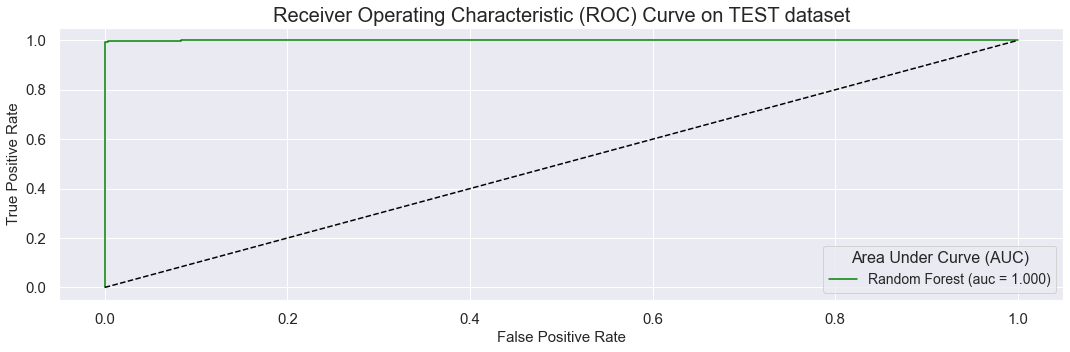

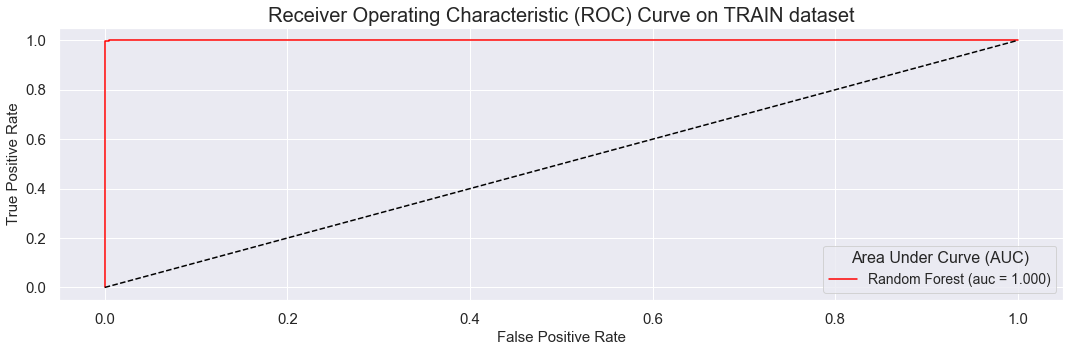

In [483]:
#Activation of early build function to calculate statistics to plot ROC curves
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = RF, X = X_test_RF, y = y_test_RF, df="test", color="green", model_name = "Random Forest")
plot_roc_cur(model = RF, X = X_train_RF, y = y_train_RF, df="train", color="red", model_name = "Random Forest")

### Easy to business interpretation plots - PROFIT and LIFT curves

In [484]:
#Probabilities
y_prob = RF.predict_proba(X_test_RF)

The graph shows what percentage of red and white wines the model catches in a given percentage of the scoring list. For example, in the top 10% of the list of both red and white wines with the highest score, the model catches 30% of the correct wine classifications. Model catches red and white wines at the similar effectiveness.

In [485]:
#PROFIT curve
skplt.metrics.plot_cumulative_gain(y_test_RF,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for Random Forest Model')
plt.show()

The graph illustrates how many times the model is more effective at capturing wine type relative to classifying wines without using the model. For example, in the top 10% of the list of red and white wines with the highest score, the model correctly catches 2 times as many red wines, slightly worse is in terms of white wines.

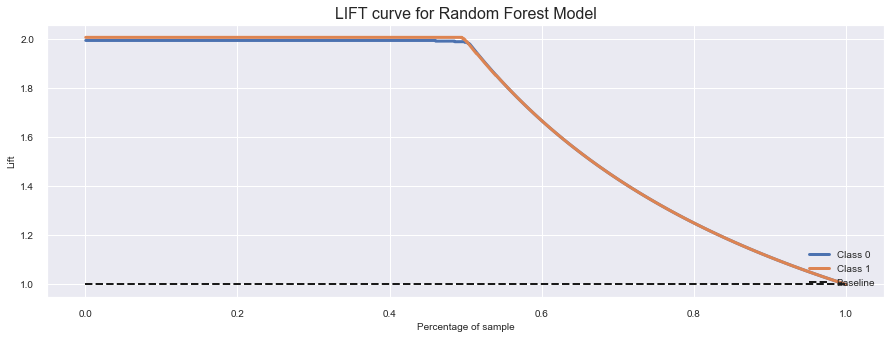

In [486]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_RF,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for Random Forest Model')
plt.show()

### Results and export results to Excel file

In [487]:
#Results on full dataset (probabilities of 0 and 1)
X_all = data_modelling.loc[:, data.columns != "wine_type"].values
y_all_prob = RF.predict_proba(X_all)

#Main DF and DF with probabilities
df_X_all = data_modelling
df_y_all_prob = pd.DataFrame(y_all_prob)

#Concatenation DF and probabilities
df_X_all_scored = pd.concat([df_X_all, df_y_all_prob * 100], axis = 1)
df_X_all_scored.rename(columns={0 : "Prob_0_white_wine", 1 : "Prob_1_red_wine"}, inplace=True)
df_X_all_scored

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  Prob_0_white_wine  \
0                          1                        0              0.000   
1                          1                        0              0.000   
2                          1                        0              0.000   
3                          1                        0              5.188   
4                          1                        0              0.000   
...                      ...                      ...                ...   
7917                       1                        0              0.000   
7918                       0                        0              0.000   
7919                       1                        0              0.000   
7920                       1                        0              0.000   
7921                       0                        0              0.000   

      Prob_1_red_wine  
0             100.000  
1             100.000  
2             100.000  
3              94.812  
4             100.000  
...               ...  
7917          100.000  
7918          100.000  
7919          100.000  
7920          100.000  
7921          100.000  

[7922 rows x 15 columns]

In [488]:
#Save columns with wine type and probabilities to Excel file
df_X_all_scored[["wine_type", "Prob_0_white_wine", "Prob_1_red_wine"]].to_excel("probabilities_results/prob_Random_Forest.xlsx")
#Save all dataset with probabilities to Excel file
df_X_all_scored.to_excel("probabilities_results/all_df_Random_Forest.xlsx")

## 9.7 XGBoost

In [535]:
#X and y from dataset
X_XGB = data_modelling.loc[:, data.columns != "wine_type"].columns.tolist()
y_XGB = data_modelling.loc[:, data.columns == "wine_type"].columns.tolist()

### Tunning of hiper parameters

In [536]:
#Wrapper for cross validation with 5 folders - *args and **kwargs appear at the end - lists of parameters given as a dictionary
#or list.
def CVTestXGB(nFolds = 5, randomState=2020, debug=False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    #Lists for results
    testResults = []
    trainResults = []
    predictions = []
    indices = []

    #Loop validating the model on successive folds
    for train_XGB, test_XGB in kf.split(data_modelling.index.values):
        #Preparation of estimator
        XGB = XGBClassifier(*args, **kwargs, random_state=randomState, n_jobs=-1, verbosity=0)
        if debug:
            print(XGB)
        #Model training
        XGB.fit(data_modelling.iloc[train_XGB][X_XGB], data_modelling.iloc[train_XGB][y_XGB])

        #Predictions for train and test datasets
        predictions_train = XGB.predict_proba(data_modelling.iloc[train_XGB][X_XGB])[:,1]
        predictions_test = XGB.predict_proba(data_modelling.iloc[test_XGB][X_XGB])[:,1]
        
        #Let's keep the prediction information for this fold
        predictions.append(predictions_test.tolist().copy())
        
        #Together with the indexes in the original data frame
        indices.append(data_modelling.iloc[test_XGB].index.tolist().copy())
        
        #Calculation of ROC-AUC
        trainScore = roc_auc_score((data_modelling[y_XGB].iloc[train_XGB]==1).astype(int), predictions_train)
        testScore = roc_auc_score((data_modelling[y_XGB].iloc[test_XGB]==1).astype(int), predictions_test)
        
        #Saving results to lists 
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        #We can optionally display information about each folio along with the training results
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [537]:
#Loop to find the best configuration of hyper parameters in cross validation with 5 folds

#Empty lists for hyper parameters from loop
eta_list = list()
max_depth_list = list()
subsample_list = list()
colsample_bytree_list = list()
colsample_bylevel_list = list()
gamma_list = list()
min_child_weight_list = list()
rate_drop_list = list()
skip_drop_list = list()
mean_TRAIN_list = list()
mean_TEST_list = list()

#Loop with hyper parameters - because of extremely long time of execution of tunning of hyper parameters in loop
#with a lot of hyper parameters, range of hyper parameters was reduced
print("eta || max_depth || subsample || colsample_bytree || colsample_bylevel || gamma || min_child_weight || rate_drop || skip_drop || mean_test || mean_train || train_test_difference")
print("=================================================================================================================================================================================")
for eta in [0.01, 0.02, 0.03, 0.5]: 
    for max_depth in [5, 10, 20]: 
        for subsample in [0.7, 1]: 
            for colsample_bytree in [0.7, 1]:
                for colsample_bylevel in [0.7, 1]:
                    for gamma in [0, 5]:
                        for min_child_weight in [0, 1]:
                            for rate_drop in [0, 0.2]:
                                for skip_drop in [0, 0.5]:
                                    trainResults, testResults, predictions, indices = CVTestXGB(
                                                                    debug=False,
                                                                    eta=eta,
                                                                    max_depth=max_depth,
                                                                    subsample=subsample,
                                                                    colsample_bytree=colsample_bytree,
                                                                    colsample_bylevel=colsample_bylevel,
                                                                    gamma=gamma,
                                                                    min_child_weight=min_child_weight,
                                                                    rate_drop=rate_drop,
                                                                    skip_drop=skip_drop)
                                #Append values from loop to lists
                                eta_list.append(eta)
                                max_depth_list.append(max_depth)
                                subsample_list.append(subsample)
                                colsample_bytree_list.append(colsample_bytree)
                                colsample_bylevel_list.append(colsample_bylevel)
                                gamma_list.append(gamma)
                                min_child_weight_list.append(min_child_weight)
                                rate_drop_list.append(rate_drop)
                                skip_drop_list.append(skip_drop)
                                mean_TRAIN_list.append(np.mean(trainResults))
                                mean_TEST_list.append(np.mean(testResults))
                
                                #Display mean results for training set and test set from 5 folds in 
                                #different hyper parameters config. 
                                print(eta, "||",
                                max_depth,"||",
                                subsample, "||",
                                colsample_bytree, "||",
                                colsample_bylevel, "||",
                                gamma, "||",
                                min_child_weight, "||",
                                rate_drop, "||",
                                skip_drop, "||",
                                np.mean(testResults), "||",
                                np.mean(trainResults), "||",
                                (np.mean(trainResults) - np.mean(testResults)))
      
                                # #Save results of hyperparameters tunning in Data Frame
                                df = pd.DataFrame()
                                df["eta"] =  eta_list
                                df["max_depth"] = max_depth_list
                                df["subsample"] = subsample_list
                                df["colsample_bytree"] = colsample_bytree_list
                                df["colsample_bylevel"] = colsample_bylevel_list
                                df["gamma"] = gamma_list
                                df["min_child_weight"] = min_child_weight_list
                                df["rate_drop"] = rate_drop_list
                                df["skip_drop"] = skip_drop_list
                                df["mean_TEST"] = mean_TEST_list
                                df["mean_TRAIN"] = mean_TRAIN_list
                                df["TRAIN_TEST_difference"] = df["mean_TRAIN"] - df["mean_TEST"]

eta || max_depth || subsample || colsample_bytree || colsample_bylevel || gamma || min_child_weight || rate_drop || skip_drop || mean_test || mean_train || train_test_difference
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9987953559538285 || 0.9992613855074781 || 0.0004660295536496051
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9987953559538285 || 0.9992613855074781 || 0.0004660295536496051
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9987995292923756 || 0.999218301442582 || 0.00041877215020635905
0.01 || 5 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9987995292923756 || 0.999218301442582 || 0.00041877215020635905
0.01 || 5 || 0.7 || 0.7 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9986595080634707 || 0.9990784527121661 || 0.0004189446486954074
0.01 || 5 || 0.7 || 0.7 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9986595080634707 || 0.9990784527121661 || 0.0004189446486954074
0.01 || 5 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.998662382279799 || 0.99906

0.01 || 10 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9991241538213087 || 0.9996365043652382 || 0.0005123505439295073
0.01 || 10 || 0.7 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9991241538213087 || 0.9996365043652382 || 0.0005123505439295073
0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9988530500082723 || 0.9993028966421516 || 0.0004498466338792584
0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9988530500082723 || 0.9993028966421516 || 0.0004498466338792584
0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.998827850899357 || 0.9992831530795906 || 0.0004553021802335966
0.01 || 10 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.998827850899357 || 0.9992831530795906 || 0.0004553021802335966
0.01 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0 || 0.5 || 0.9991585123749671 || 0.9997383841793075 || 0.0005798718043403817
0.01 || 10 || 0.7 || 0.7 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9991585123749671 || 0.9997383841793075 || 0.0005798718043403817
0.01 || 10 || 

0.01 || 20 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9988284884625074 || 0.9992836510716531 || 0.0004551626091456873
0.01 || 20 || 0.7 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9988284884625074 || 0.9992836510716531 || 0.0004551626091456873
0.01 || 20 || 0.7 || 0.7 || 1 || 0 || 0 || 0 || 0.5 || 0.9991537223864977 || 0.9997509919212403 || 0.0005972695347425949
0.01 || 20 || 0.7 || 0.7 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9991537223864977 || 0.9997509919212403 || 0.0005972695347425949
0.01 || 20 || 0.7 || 0.7 || 1 || 0 || 1 || 0 || 0.5 || 0.9990268924079713 || 0.9996047109450867 || 0.0005778185371154709
0.01 || 20 || 0.7 || 0.7 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9990268924079713 || 0.9996047109450867 || 0.0005778185371154709
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.9988438339952495 || 0.999308564998222 || 0.00046473100297250713
0.01 || 20 || 0.7 || 0.7 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9988438339952495 || 0.999308564998222 || 0.00046473100297250713
0.01 || 20 || 0.7 ||

0.02 || 5 || 0.7 || 0.7 || 1 || 0 || 1 || 0 || 0.5 || 0.9988642676408291 || 0.9994057485166502 || 0.0005414808758210654
0.02 || 5 || 0.7 || 0.7 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9988642676408291 || 0.9994057485166502 || 0.0005414808758210654
0.02 || 5 || 0.7 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.9986438960853345 || 0.9991584898470615 || 0.0005145937617269114
0.02 || 5 || 0.7 || 0.7 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9986438960853345 || 0.9991584898470615 || 0.0005145937617269114
0.02 || 5 || 0.7 || 0.7 || 1 || 5 || 1 || 0 || 0.5 || 0.998620285524811 || 0.9991425963341924 || 0.0005223108093814766
0.02 || 5 || 0.7 || 0.7 || 1 || 5 || 1 || 0.2 || 0.5 || 0.998620285524811 || 0.9991425963341924 || 0.0005223108093814766
0.02 || 5 || 0.7 || 1 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9985610664399868 || 0.9991306848086037 || 0.0005696183686169087
0.02 || 5 || 0.7 || 1 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9985610664399868 || 0.9991306848086037 || 0.0005696183686169087
0.02 || 5 || 0.7 || 1 || 0.7 || 0 

0.02 || 10 || 0.7 || 0.7 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9988518416538069 || 0.9993931398646433 || 0.0005412982108363718
0.02 || 10 || 0.7 || 1 || 0.7 || 0 || 0 || 0 || 0.5 || 0.999140023453904 || 0.9997465176822568 || 0.0006064942283527941
0.02 || 10 || 0.7 || 1 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.999140023453904 || 0.9997465176822568 || 0.0006064942283527941
0.02 || 10 || 0.7 || 1 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9990081020350228 || 0.9995765737812677 || 0.0005684717462449695
0.02 || 10 || 0.7 || 1 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9990081020350228 || 0.9995765737812677 || 0.0005684717462449695
0.02 || 10 || 0.7 || 1 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9986748757802069 || 0.9992738535299839 || 0.0005989777497770188
0.02 || 10 || 0.7 || 1 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9986748757802069 || 0.9992738535299839 || 0.0005989777497770188
0.02 || 10 || 0.7 || 1 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9986956263347112 || 0.9991862288910405 || 0.0004906025563292671
0.02 || 10 || 0.7 || 1 || 

0.02 || 20 || 0.7 || 1 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9989870573051883 || 0.9996127614830485 || 0.0006257041778601202
0.02 || 20 || 0.7 || 1 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9986828495862852 || 0.999287867316137 || 0.0006050177298517756
0.02 || 20 || 0.7 || 1 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9986828495862852 || 0.999287867316137 || 0.0006050177298517756
0.02 || 20 || 0.7 || 1 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9986956263347112 || 0.9991862288910405 || 0.0004906025563292671
0.02 || 20 || 0.7 || 1 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9986956263347112 || 0.9991862288910405 || 0.0004906025563292671
0.02 || 20 || 0.7 || 1 || 1 || 0 || 0 || 0 || 0.5 || 0.9987742509134663 || 0.9996459844082013 || 0.0008717334947350164
0.02 || 20 || 0.7 || 1 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9987742509134663 || 0.9996459844082013 || 0.0008717334947350164
0.02 || 20 || 0.7 || 1 || 1 || 0 || 1 || 0 || 0.5 || 0.9987969493498532 || 0.9995167380339602 || 0.0007197886841070478
0.02 || 20 || 0.7 || 1 || 1 || 0

0.03 || 5 || 0.7 || 1 || 1 || 0 || 0 || 0 || 0.5 || 0.9990498767684384 || 0.9996843580526116 || 0.000634481284173205
0.03 || 5 || 0.7 || 1 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9990498767684384 || 0.9996843580526116 || 0.000634481284173205
0.03 || 5 || 0.7 || 1 || 1 || 0 || 1 || 0 || 0.5 || 0.9989726560386021 || 0.9996568596374432 || 0.0006842035988411377
0.03 || 5 || 0.7 || 1 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9989726560386021 || 0.9996568596374432 || 0.0006842035988411377
0.03 || 5 || 0.7 || 1 || 1 || 5 || 0 || 0 || 0.5 || 0.9983621922213123 || 0.9992646389364394 || 0.0009024467151270699
0.03 || 5 || 0.7 || 1 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9983621922213123 || 0.9992646389364394 || 0.0009024467151270699
0.03 || 5 || 0.7 || 1 || 1 || 5 || 1 || 0 || 0.5 || 0.9986051435528152 || 0.9992817809493744 || 0.0006766373965592098
0.03 || 5 || 0.7 || 1 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9986051435528152 || 0.9992817809493744 || 0.0006766373965592098
0.03 || 5 || 1 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5

0.03 || 10 || 0.7 || 1 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9988128120767217 || 0.9996759854839151 || 0.0008631734071934405
0.03 || 10 || 0.7 || 1 || 1 || 5 || 1 || 0 || 0.5 || 0.9988342465255382 || 0.9995080988031754 || 0.0006738522776371658
0.03 || 10 || 0.7 || 1 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9988342465255382 || 0.9995080988031754 || 0.0006738522776371658
0.03 || 10 || 1 || 0.7 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9994124418457989 || 0.9999907481858298 || 0.0005783063400308652
0.03 || 10 || 1 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9994124418457989 || 0.9999907481858298 || 0.0005783063400308652
0.03 || 10 || 1 || 0.7 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9994599121352877 || 0.9999613094006268 || 0.000501397265339043
0.03 || 10 || 1 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9994599121352877 || 0.9999613094006268 || 0.000501397265339043
0.03 || 10 || 1 || 0.7 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9991405787858909 || 0.9997232690287886 || 0.0005826902428976988
0.03 || 10 || 1 || 0.7 || 0.7 ||

0.03 || 20 || 1 || 0.7 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9993941278905091 || 0.999991883535127 || 0.0005977556446179477
0.03 || 20 || 1 || 0.7 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9994697995620975 || 0.9999646756817795 || 0.0004948761196820195
0.03 || 20 || 1 || 0.7 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9994697995620975 || 0.9999646756817795 || 0.0004948761196820195
0.03 || 20 || 1 || 0.7 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9991265386878231 || 0.9997280089809759 || 0.0006014702931528282
0.03 || 20 || 1 || 0.7 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9991265386878231 || 0.9997280089809759 || 0.0006014702931528282
0.03 || 20 || 1 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9990726423318692 || 0.9996934274198038 || 0.0006207850879346166
0.03 || 20 || 1 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9990726423318692 || 0.9996934274198038 || 0.0006207850879346166
0.03 || 20 || 1 || 0.7 || 1 || 0 || 0 || 0 || 0.5 || 0.9994116612034942 || 0.9999941340904106 || 0.0005824728869163742
0.03 || 20 || 1 || 0.7 || 1

0.5 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9993828638598681 || 0.9999641459994398 || 0.0005812821395717593
0.5 || 5 || 1 || 0.7 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9993828638598681 || 0.9999641459994398 || 0.0005812821395717593
0.5 || 5 || 1 || 0.7 || 1 || 0 || 0 || 0 || 0.5 || 0.9997934300049099 || 0.9999999701231992 || 0.00020654011828924457
0.5 || 5 || 1 || 0.7 || 1 || 0 || 0 || 0.2 || 0.5 || 0.9997934300049099 || 0.9999999701231992 || 0.00020654011828924457
0.5 || 5 || 1 || 0.7 || 1 || 0 || 1 || 0 || 0.5 || 0.9998511160071029 || 0.9999999701231992 || 0.0001488541160963308
0.5 || 5 || 1 || 0.7 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9998511160071029 || 0.9999999701231992 || 0.0001488541160963308
0.5 || 5 || 1 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.9992807974666527 || 0.9999132337341683 || 0.0006324362675156348
0.5 || 5 || 1 || 0.7 || 1 || 5 || 0 || 0.2 || 0.5 || 0.9992807974666527 || 0.9999132337341683 || 0.0006324362675156348
0.5 || 5 || 1 || 0.7 || 1 || 5 || 1 || 0 || 0.5 ||

0.5 || 10 || 1 || 0.7 || 1 || 0 || 1 || 0.2 || 0.5 || 0.9998485737923073 || 0.9999999701231992 || 0.0001513963308918953
0.5 || 10 || 1 || 0.7 || 1 || 5 || 0 || 0 || 0.5 || 0.999430979882751 || 0.9999603827722068 || 0.0005294028894557989
0.5 || 10 || 1 || 0.7 || 1 || 5 || 0 || 0.2 || 0.5 || 0.999430979882751 || 0.9999603827722068 || 0.0005294028894557989
0.5 || 10 || 1 || 0.7 || 1 || 5 || 1 || 0 || 0.5 || 0.9993908798918321 || 0.9999523428737807 || 0.0005614629819485906
0.5 || 10 || 1 || 0.7 || 1 || 5 || 1 || 0.2 || 0.5 || 0.9993908798918321 || 0.9999523428737807 || 0.0005614629819485906
0.5 || 10 || 1 || 1 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9997738135694412 || 0.9999999701231992 || 0.0002261565537580168
0.5 || 10 || 1 || 1 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9997738135694412 || 0.9999999701231992 || 0.0002261565537580168
0.5 || 10 || 1 || 1 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9998670611573954 || 0.9999999701231992 || 0.00013290896580375744
0.5 || 10 || 1 || 1 || 0.7 || 0 || 1 || 0.2 || 0.

0.5 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0 || 0.5 || 0.9997806670862607 || 0.9999999701231992 || 0.00021930303693851183
0.5 || 20 || 1 || 1 || 0.7 || 0 || 0 || 0.2 || 0.5 || 0.9997806670862607 || 0.9999999701231992 || 0.00021930303693851183
0.5 || 20 || 1 || 1 || 0.7 || 0 || 1 || 0 || 0.5 || 0.9998619556977445 || 0.9999999701231992 || 0.00013801442545469111
0.5 || 20 || 1 || 1 || 0.7 || 0 || 1 || 0.2 || 0.5 || 0.9998619556977445 || 0.9999999701231992 || 0.00013801442545469111
0.5 || 20 || 1 || 1 || 0.7 || 5 || 0 || 0 || 0.5 || 0.9994900679364805 || 0.9999642375435747 || 0.0004741696070941215
0.5 || 20 || 1 || 1 || 0.7 || 5 || 0 || 0.2 || 0.5 || 0.9994900679364805 || 0.9999642375435747 || 0.0004741696070941215
0.5 || 20 || 1 || 1 || 0.7 || 5 || 1 || 0 || 0.5 || 0.9993755575631382 || 0.9999537315491768 || 0.0005781739860385438
0.5 || 20 || 1 || 1 || 0.7 || 5 || 1 || 0.2 || 0.5 || 0.9993755575631382 || 0.9999537315491768 || 0.0005781739860385438
0.5 || 20 || 1 || 1 || 1 || 0 || 0 || 0 || 0

As we can see on the below Data Frame, the first row presents the best combination of hiper parameters in XGBoost model, this combination give the best results (AUC) on test dataset with similar result on train dataset. Nevertheles results are really huge, so it may be overfitting, but input dataset is really small, so overfitting is likely. 

In [538]:
#The best combination of hyper parameters in XGBoost model based on mean results on TEST dataset
df.sort_values(by="mean_TEST", ascending=False)

eta  max_depth  subsample  colsample_bytree  colsample_bylevel  gamma  \
586 0.500          5      0.700             0.700              1.000      0   
587 0.500          5      0.700             0.700              1.000      0   
627 0.500          5      1.000             1.000              0.700      0   
626 0.500          5      1.000             1.000              0.700      0   
739 0.500         20      1.000             0.700              0.700      0   
..    ...        ...        ...               ...                ...    ...   
59  0.010          5      1.000             1.000              1.000      0   
62  0.010          5      1.000             1.000              1.000      5   
63  0.010          5      1.000             1.000              1.000      5   
60  0.010          5      1.000             1.000              1.000      5   
61  0.010          5      1.000             1.000              1.000      5   

     min_child_weight  rate_drop  skip_drop  mean_TEST  mean_TRAIN  \
586                 1      0.000      0.500      1.000       1.000   
587                 1      0.200      0.500      1.000       1.000   
627                 1      0.200      0.500      1.000       1.000   
626                 1      0.000      0.500      1.000       1.000   
739                 1      0.200      0.500      1.000       1.000   
..                ...        ...        ...        ...         ...   
59                  1      0.200      0.500      0.996       0.997   
62                  1      0.000      0.500      0.995       0.997   
63                  1      0.200      0.500      0.995       0.997   
60                  0      0.000      0.500      0.995       0.997   
61                  0      0.200      0.500      0.995       0.997   

     TRAIN_TEST_difference  
586                  0.000  
587                  0.000  
627                  0.000  
626                  0.000  
739                  0.000  
..                     ...  
59                   0.002  
62                   0.002  
63                   0.002  
60                   0.002  
61                   0.002  

[768 rows x 12 columns]

### Tunning of hiper parameters in train test split

In [539]:
#X and y from dataset
X_XGB = data_modelling.loc[:, data.columns != "wine_type"]
y_XGB = data_modelling.loc[:, data.columns == "wine_type"]

#Loop to find optimal train / test split
k_list = list()
test_AUC_list = list()
train_AUC_list = list()
for k in range(1, 10):
    X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB,
                                                                        y_XGB,
                                                                        test_size = 0.1*k,
                                                                        random_state = 1010)
    
    #Random Forest model wtih hyper parameters after tunning
    XGB = xgb.sklearn.XGBClassifier(eta = 0.5,
                                    max_depth=5,
                                    subsample=0.7,
                                    colsample_bytree=0.7,
                                    colsample_bylevel=0.1,
                                    gamma=0,
                                    min_child_weight=1,
                                    rate_drop=0,
                                    skip_drop=0.5,
                                    verbosity=0)
    XGB.fit(X = X_train_XGB, y = y_train_XGB)
    
    #Prediction on train dataset
    prediction_train_XGB = XGB.predict(X_train_XGB)
    #Prediction on test dataset
    prediction_test_XGB = XGB.predict(X_test_XGB)
    
    k_list.append(k)
    test_AUC_list.append(round(roc_auc_score(y_test_XGB, prediction_test_XGB), 3))
    train_AUC_list.append(round(roc_auc_score(y_train_XGB, prediction_train_XGB), 3))
    
    df = pd.DataFrame()
    
    df["test_size"] = [x/10 for x in k_list]
    df["train_size"] = 1 - df["test_size"]
    df["test_AUC"] = test_AUC_list
    df["train_AUC"] = train_AUC_list

Configuration test = 0.3 and train = 0.7 gives the highest AUC on test dataset, moreover AUC results on train adn test datasets in this configuration gives similar results.

In [540]:
#Data Frame with hiper parameters
df

test_size  train_size  test_AUC  train_AUC
0      0.100       0.900     0.994      1.000
1      0.200       0.800     0.994      1.000
2      0.300       0.700     0.995      1.000
3      0.400       0.600     0.994      1.000
4      0.500       0.500     0.995      1.000
5      0.600       0.400     0.994      1.000
6      0.700       0.300     0.995      1.000
7      0.800       0.200     0.993      0.999
8      0.900       0.100     0.990      1.000

### Model building

In [541]:
#X and y from dataset
X_XGB = data_modelling.loc[:, data.columns != "wine_type"]
y_XGB = data_modelling.loc[:, data.columns == "wine_type"]

#Split dataset to train and test
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB,
                                                                    y_XGB,
                                                                    train_size = 0.7,
                                                                    test_size = 0.3,
                                                                    random_state = 12121)

#Build and train Random Forest model with hyper parameters after tunning and choosing the best train test split combination
XGB = xgb.sklearn.XGBClassifier(eta = 0.5,
                                max_depth=5,
                                subsample=0.7,
                                colsample_bytree=0.7,
                                colsample_bylevel=0.1,
                                gamma=0,
                                min_child_weight=1,
                                rate_drop=0,
                                skip_drop=0.5,
                                verbosity=0)
XGB = XGB.fit(X = X_train_XGB, y = y_train_XGB)

#Predictions on train and test datasets
TRAIN_pred_XGB = XGB.predict(X_train_XGB)
TEST_pred_XGB = XGB.predict(X_test_XGB)

In [542]:
#Features imporatance on XGBoost model
rcParams["figure.figsize"] = 18,5
plot_importance(XGB, height=0.7, color="red", title="Feature importance in XGBoost")
pyplot.show()

## Model evaluation

### Confusion matrix

In [543]:
#Activation of early build function to calculate cofusion matrix
conf_matrix(model_name = "XGBoost",
            y_test = y_test_XGB,
            pred_test = TEST_pred_XGB)

Confusion matrix of XGBoost
[[1191    4]
 [   6 1176]]
----------------------------------------
True Negative: 1191
False Positive: 4
False Negative: 6
True Positive: 1176
Correct Predictions 99.58 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  1.0 
 The Missclassification = 1-Accuracy =  0.0 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.99 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.99 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  297.23 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.01


### Classification report

In [544]:
#Activation of early build function to calculate classification report 
class_report(y_test = y_test_XGB,
             y_train = y_train_XGB,
             pred_test = TEST_pred_XGB,
             pred_train = TRAIN_pred_XGB,
             model_name = "XGBoost")

Classification report of XGBoost on TRAIN dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2766
           1       1.00      1.00      1.00      2779

    accuracy                           1.00      5545
   macro avg       1.00      1.00      1.00      5545
weighted avg       1.00      1.00      1.00      5545

*******************************************************
Classification report of XGBoost on TEST dataset:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1195
           1       1.00      0.99      1.00      1182

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377



### Comparision of statistics on train and test dataset

In [545]:
#Activation of early build function to calculate statistics to compare train and test datasets 
stat_comparison(y_test = y_test_XGB,
                y_train = y_train_XGB,
                X_test = X_test_XGB, 
                X_train = X_train_XGB,
                pred_test = TEST_pred_XGB,
                pred_train = TRAIN_pred_XGB,
                model = XGB)

Comparison of results on train and test dataset:


Accuracy  Precision  Recall    F1   AUC  Gini
Dataset                                               
TRAIN       1.000      1.000   1.000 1.000 1.000 1.000
TEST        1.000      1.000   0.990 1.000 1.000 1.000

### ROC curve

In [546]:
#Activation of early build function to calculate statistics to plot ROC curves
rcParams["figure.figsize"] = 18,5
plot_roc_cur(model = XGB, X = X_test_XGB, y = y_test_XGB, df="test", color="black", model_name = "XGBoost")
plot_roc_cur(model = XGB, X = X_train_XGB, y = y_train_XGB, df="train", color="orange", model_name = "XGBoost")

### Easy to business interpretation plots - PROFIT and LIFT curves

In [547]:
#Probabilities
y_prob = XGB.predict_proba(X_test_XGB)

The graph shows what percentage of red and white wines the model catches in a given percentage of the scoring list. For example, in the top 10% of the list of both red and white wines with the highest score, the model catches 30% of the correct wine classifications. Model catches red and white wines at the similar effectiveness.

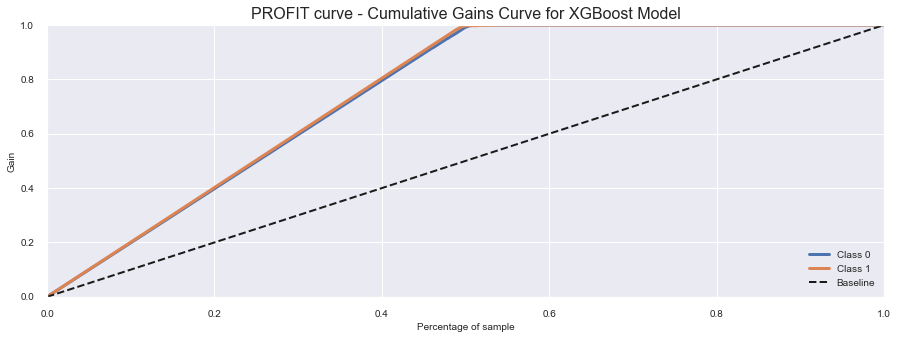

In [548]:
#PROFIT curve
skplt.metrics.plot_cumulative_gain(y_test_XGB,
                                   y_prob,
                                   figsize=(15,5),
                                   title_fontsize=16,
                                   text_fontsize=10,
                                   title='PROFIT curve - Cumulative Gains Curve for XGBoost Model')
plt.show()

The graph illustrates how many times the model is more effective at capturing wine type relative to classifying wines without using the model. For example, in the top 10% of the list of red and white wines with the highest score, the model correctly catches 2 times as many red wines, slightly worse is in terms of white wines.

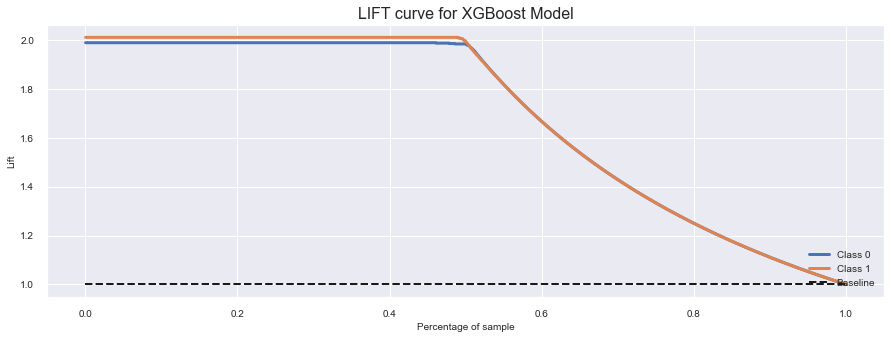

In [549]:
#LIFT curve
skplt.metrics.plot_lift_curve(y_test_XGB,
                              y_prob,
                              figsize=(15,5),
                              title_fontsize=16,
                              text_fontsize=10,
                              title='LIFT curve for XGBoost Model')
plt.show()

### Results and export results to Excel file

In [550]:
#Results on full dataset (probabilities of 0 and 1)
X_all = data_modelling.loc[:, data.columns != "wine_type"].values
y_all_prob = XGB.predict_proba(X_all)

#Main DF and DF with probabilities
df_X_all = data_modelling
df_y_all_prob = pd.DataFrame(y_all_prob)

#Concatenation DF and probabilities
df_X_all_scored = pd.concat([df_X_all, df_y_all_prob * 100], axis = 1)
df_X_all_scored.rename(columns={0 : "Prob_0_white_wine", 1 : "Prob_1_red_wine"}, inplace=True)
df_X_all_scored

wine_type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0             1          7.400             0.700        0.000           1.900   
1             1          7.800             0.880        0.000           2.600   
2             1          7.800             0.760        0.040           2.300   
3             1          7.800             0.280        0.020           1.900   
4             1          7.400             0.660        0.000           1.800   
...         ...            ...               ...          ...             ...   
7917          1          7.866             0.560        0.170           2.100   
7918          1          9.148             0.506        0.344           1.951   
7919          1          7.600             0.415        0.290           2.002   
7920          1          8.335             0.568        0.260           2.045   
7921          1         10.362             0.412        0.473           2.500   

      total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  \
0                   34.000    0.998 3.230      0.560    9.800    5.000   
1                   67.000    0.997 3.200      0.680    9.800    5.000   
2                   54.000    0.997 3.260      0.650    9.800    5.000   
3                   60.000    0.998 3.160      0.580    9.800    5.000   
4                   56.500    0.998 3.510      0.560    9.400    5.000   
...                    ...      ...   ...        ...      ...      ...   
7917                86.000    0.998 3.403      0.617    9.567    5.666   
7918                21.494    0.997 3.275      0.636    9.551    5.000   
7919                66.000    0.997 3.424      0.616    9.500    5.488   
7920               140.869    0.997 3.244      0.543    9.471    5.000   
7921                53.192    0.999 3.267      0.707   10.015    5.192   

      sulphates_level_medium  sulphates_level_minimum  Prob_0_white_wine  \
0                          1                        0              0.001   
1                          1                        0              0.001   
2                          1                        0              0.000   
3                          1                        0              1.475   
4                          1                        0              0.001   
...                      ...                      ...                ...   
7917                       1                        0              0.000   
7918                       0                        0              0.000   
7919                       1                        0              0.001   
7920                       1                        0              0.011   
7921                       0                        0              0.000   

      Prob_1_red_wine  
0              99.999  
1              99.999  
2             100.000  
3              98.525  
4              99.999  
...               ...  
7917          100.000  
7918          100.000  
7919           99.999  
7920           99.989  
7921          100.000  

[7922 rows x 15 columns]

In [551]:
#Save columns with wine type and probabilities to Excel file
df_X_all_scored[["wine_type", "Prob_0_white_wine", "Prob_1_red_wine"]].to_excel("probabilities_results/prob_XGBoost.xlsx")
#Save all dataset with probabilities to Excel file
df_X_all_scored.to_excel("probabilities_results/all_df_XGBoost.xlsx")

# 10. Comparision of statistics of models and ROC plot of all models

## 10.1 Comparision of statistics of models

In [552]:
#Results on test datasets

#Logistic Regression
accuracy_LR = accuracy_score(y_test_LR, TEST_pred_LR)
recall_LR = recall_score(y_test_LR, TEST_pred_LR)
precision_LR = precision_score(y_test_LR, TEST_pred_LR)
f1_LR = f1_score(y_test_LR, TEST_pred_LR)
AUC_LR = metrics.roc_auc_score(y_test_LR, model.predict_proba(X_test_LR)[::,1])
Gini_LR = (2*AUC_LR) - 1

#KNN
accuracy_KNN = accuracy_score(y_test_KNN, TEST_pred_KNN)
recall_KNN = recall_score(y_test_KNN, TEST_pred_KNN)
precision_KNN = precision_score(y_test_KNN, TEST_pred_KNN)
f1_KNN = f1_score(y_test_KNN, TEST_pred_KNN)
AUC_KNN = metrics.roc_auc_score(y_test_KNN, model.predict_proba(X_test_KNN)[::,1])
Gini_KNN = (2*AUC_KNN) - 1

# #SVM
accuracy_SVM = accuracy_score(y_test_SVM, TEST_pred_SVM)
recall_SVM = recall_score(y_test_SVM, TEST_pred_SVM)
precision_SVM = precision_score(y_test_SVM, TEST_pred_SVM)
f1_SVM = f1_score(y_test_SVM, TEST_pred_SVM)
AUC_SVM = metrics.roc_auc_score(y_test_SVM, model.predict_proba(X_test_SVM)[::,1])
Gini_SVM = (2*AUC_SVM) - 1

#Naive Bayes
accuracy_NB = accuracy_score(y_test_NB, TEST_pred_NB)
recall_NB = recall_score(y_test_NB, TEST_pred_NB)
precision_NB = precision_score(y_test_NB, TEST_pred_NB)
f1_NB = f1_score(y_test_NB, TEST_pred_NB)
AUC_NB = metrics.roc_auc_score(y_test_NB, model.predict_proba(X_test_NB)[::,1])
Gini_NB = (2*AUC_NB) - 1

#Decision Tree
accuracy_DT = accuracy_score(y_test_DT, TEST_pred_DT)
recall_DT = recall_score(y_test_DT, TEST_pred_DT)
precision_DT = precision_score(y_test_DT, TEST_pred_DT)
f1_DT = f1_score(y_test_DT, TEST_pred_DT)
AUC_DT = metrics.roc_auc_score(y_test_DT, model.predict_proba(X_test_DT)[::,1])
Gini_DT = (2*AUC_DT) - 1

#Random Forest
accuracy_RF = accuracy_score(y_test_RF, TEST_pred_RF)
recall_RF = recall_score(y_test_DT, TEST_pred_DT)
precision_RF = precision_score(y_test_RF, TEST_pred_RF)
f1_RF = f1_score(y_test_RF, TEST_pred_RF)
AUC_RF = metrics.roc_auc_score(y_test_RF, model.predict_proba(X_test_RF)[::,1])
Gini_RF = (2*AUC_RF) - 1

#XGBoost
accuracy_XGB = accuracy_score(y_test_XGB, TEST_pred_XGB)
recall_XGB = recall_score(y_test_XGB, TEST_pred_XGB)
precision_XGB = precision_score(y_test_XGB, TEST_pred_XGB)
f1_XGB = f1_score(y_test_XGB, TEST_pred_XGB)
AUC_XGB = metrics.roc_auc_score(y_test_XGB, model.predict_proba(X_test_XGB)[::,1])
Gini_XGB = (2*AUC_XGB) - 1

In [553]:
#Data Frame with statistics of model on test dataset to compare results of models
statistics_comparision_df = pd.DataFrame()
statistics_comparision_df["MODEL"] = ["Logistic Regression", "KNN", "SVM","Naive Bayes",
                                      "Decision Tree", "Random Forest", "XGBoost"]
statistics_comparision_df["Accuracy"] = [accuracy_LR, accuracy_KNN, accuracy_SVM, accuracy_NB,
                                         accuracy_DT, accuracy_RF, accuracy_XGB]
statistics_comparision_df["Precision"] = [precision_LR, precision_KNN, precision_SVM, precision_NB,
                                          precision_DT, precision_RF, precision_XGB]
statistics_comparision_df["Recall"] = [recall_LR, recall_KNN, recall_SVM, recall_NB,
                                       recall_DT, recall_RF, recall_XGB]
statistics_comparision_df["F1"] = [f1_LR, f1_KNN, f1_SVM, f1_NB,
                                   f1_DT, f1_RF, f1_XGB]
statistics_comparision_df["AUC"] = [AUC_LR, AUC_KNN, AUC_SVM, AUC_NB,
                                    AUC_DT, AUC_RF, AUC_XGB]
statistics_comparision_df["Gini"] = [Gini_LR, Gini_KNN, Gini_SVM, Gini_NB,
                                     Gini_DT, Gini_RF, Gini_XGB]

#Add index and sort by Accuracy
statistics_comparision_df.set_index("MODEL", inplace=True)
statistics_comparision_df.sort_values(by="Accuracy", ascending=False, inplace=True)
statistics_comparision_df.to_excel("models_comparision/models_comparision.xlsx")
statistics_comparision_df

Accuracy  Precision  Recall    F1   AUC  Gini
MODEL                                                             
XGBoost                 0.996      0.997   0.995 0.996 1.000 1.000
Random Forest           0.996      0.996   0.970 0.996 1.000 1.000
SVM                     0.988      0.990   0.985 0.987 1.000 1.000
Logistic Regression     0.983      0.982   0.984 0.983 1.000 0.999
Decision Tree           0.968      0.964   0.970 0.967 1.000 1.000
KNN                     0.958      0.956   0.961 0.958 1.000 1.000
Naive Bayes             0.941      0.900   0.991 0.943 1.000 1.000

## 10.2 Comparision of models on ROC curve with AUC

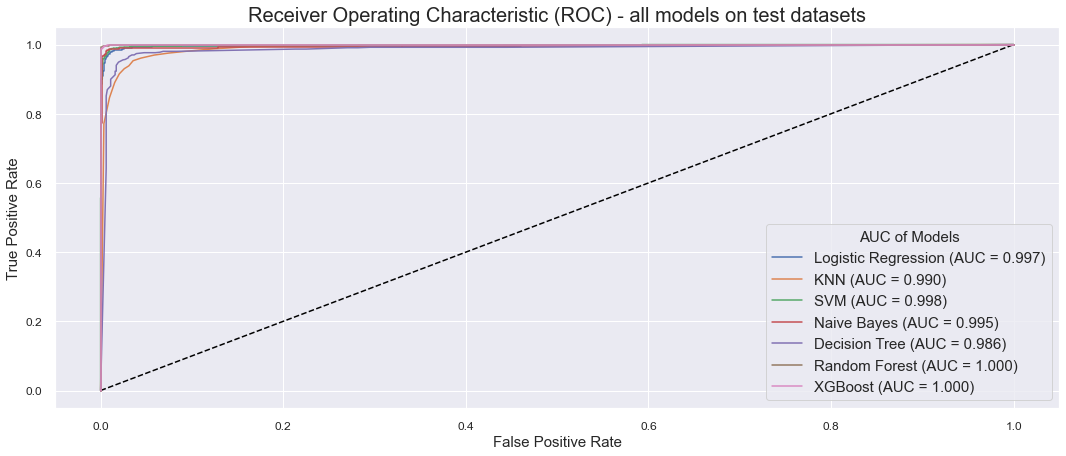

In [554]:
#Comparision of models based on ROC curve based on test datasets

#Logistic Regression
y_pred_prob1 = LR.predict_proba(X_test_LR)[:,1]
auc1 = metrics.roc_auc_score(y_test_LR, y_pred_prob1)
fpr1 , tpr1, thresholds1 = roc_curve(y_test_LR, y_pred_prob1)

#KNN
y_pred_prob2 = KNN.predict_proba(X_test_KNN)[:,1]
auc2 = metrics.roc_auc_score(y_test_KNN, y_pred_prob2)
fpr2 , tpr2, thresholds2 = roc_curve(y_test_KNN, y_pred_prob2)

#SVM
y_pred_prob3 = SVM.predict_proba(X_test_SVM)[:,1]
auc3 = metrics.roc_auc_score(y_test_SVM, y_pred_prob3)
fpr3 , tpr3, thresholds3 = roc_curve(y_test_SVM, y_pred_prob3)

#Naive Bayes
y_pred_prob4 = NB.predict_proba(X_test_NB)[:,1]
auc4 = metrics.roc_auc_score(y_test_NB, y_pred_prob4)
fpr4 , tpr4, thresholds4 = roc_curve(y_test_NB, y_pred_prob4)

#Decision Tree
y_pred_prob5 = DT.predict_proba(X_test_DT)[:,1]
auc5 = metrics.roc_auc_score(y_test_DT, y_pred_prob5)
fpr5 , tpr5, thresholds5 = roc_curve(y_test_DT, y_pred_prob5)

#Random Forest
y_pred_prob6 = RF.predict_proba(X_test_RF)[:,1]
auc6 = metrics.roc_auc_score(y_test_RF, y_pred_prob6)
fpr6 , tpr6, thresholds6 = roc_curve(y_test_RF, y_pred_prob6)

#XGBoost
y_pred_prob7 = XGB.predict_proba(X_test_XGB)[:,1]
auc7 = metrics.roc_auc_score(y_test_XGB, y_pred_prob7)
fpr7 , tpr7, thresholds7 = roc_curve(y_test_XGB, y_pred_prob7)

#Plot
rcParams["figure.figsize"] = 18,7
plt.plot([0,1],[0,1], 'k--', color="black")
plt.plot(fpr1, tpr1, label= "Logistic Regression" + " (AUC = %0.3f)" % auc1)
plt.plot(fpr2, tpr2, label= "KNN" + " (AUC = %0.3f)" % auc2)
plt.plot(fpr3, tpr3, label= "SVM" + " (AUC = %0.3f)" % auc3)
plt.plot(fpr4, tpr4, label= "Naive Bayes" + " (AUC = %0.3f)" % auc4)
plt.plot(fpr5, tpr5, label= "Decision Tree" + " (AUC = %0.3f)" % auc5)
plt.plot(fpr6, tpr6, label= "Random Forest" + " (AUC = %0.3f)" % auc6)
plt.plot(fpr7, tpr7, label= "XGBoost" + " (AUC = %0.3f)" % auc7)
#Axis
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) - all models on test datasets', fontsize=20)
#Legend
plt.legend(loc="best",
           prop={"size": 15},
           title="AUC of Models",
           title_fontsize="15",
           frameon=True)
#Save fig
plt.savefig("models_comparision/ROC_all_models.png", bbox_inches="tight")
plt.show()

In [555]:
#Time of full code compilation
end = datetime.datetime.now()
print("Compilation of full script is:", end - start)

Compilation of full script is: 1 day, 1:18:48.348492


# 11. Conclusions

**General summary** <br>


The main target of this project was to build and evaluate models to predict class of wine (red / white). Then the best model was choosen based on statistics of classification model as well as visualization of ROC curves of each model on one plot with AUC score.<br>

**The modelling dataset is really small because has only 7922 observations and 13 variables include target variable (wine_type). By doing so, results of models may be overfitting because regardless of the algorithms chosen, hiper parameters tunning or data engineering techniques implement, dataset large enought is the most important for models, data are good quality data is more important than algorithms.**<br>


**EDA (Exploratory Data Analysis) summary** <br>

The input dataset without data engineering techniques contained: 6497 observations as well as 13 variables. Input dataset after concatenation was presented on two different reports: Pandas Profiling and Sweetviz.<br>
Then many different data modifications processes were used: renaming columns, enumerate new variables, checking and changing data types, removing duplicates, missing variables, outliers detection by boxplots, Isolation Forest and Hampel method, checking of balance of target varaible, analysis of distribution of variables on 5 ways: histograms, Kolmogorov-Smirnov test, Shapiro-Wilk test, normal test from Scipy library, kurtosis nad skew. <br>
Then data was visualized by scatter plots.

**Modelling summary**<br>

Before modelling were carried out dummy coding and then variables selection by: analysis of correlation (Pearson / Spearman), VIF, IF, Forward / Backward selection, TREE, RFE. Then was made oversampling by SMOTE method so as to make dataset balanced. Last thing before modelling was creation useful function to count quickly and easily: confusion matrix. classification report, ROC curve, comparision of statistics of models on test and train datasets to eventually detect overfitting. Because of small dataset, data was selected only by CORR and VIF methods.<br>

Generally, 7 models were build (include ensembling techniques like Random Forest and boosting): Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest and XGBoost. Each model were build after tunning of hyperparameters in classifier and in train test split so as to find both the best parameters of classifier and the best configuration of train test split. <br>
In Logistic Regression tunning of hiper parameters was performed by GrichSearchCV, in rest models (KNN, SVM, Naive Bayes, Decision Tree, Random Forest and XGBoost) tunning of hiper parameters was performed by using loop which created different combinations of all choosen classifier parameters so as to achieve best AUC on test dataset and also simmilar AUC result on train and test datasets. Tunning of train test split was performed in each model by loop. <br>

Each model was evaluated by: confusion matrix, classification report, ROC curve, AUC, Accuracy, Precision, Recall, F1, Gini. Moreover in each model was performed comparision of results on train and test dataset to eventually detect overfitting. Moveorver 2 plots for easy business interpretaion was plot from each model: PROFIT, LIFT. <br>

Finally statistics of models were compared on one Data Frame and on one ROC plot. By doing so, can say that Random FOrest presents the highest Accuracy and the highest Precision together with XGBoost, nevertheless, althought XGBoost has slightly worse Accuracy than Random Forest, XGBoost has significantly higher results on Recall, so the best model from build models is XGBoost. <br>

Of course as was mentioned at the beginning of conclusion, both input dataset and modelling dataset were really small and results of models may be overfitting because regardless of the algorithms chosen, hiper parameters tunning or data engineering techniques implement, dataset large enought dataset is the most important for models. In this way solution could be to make data enrichment and either buy more data from for instance bank of data or perform some additional analysies or perform surveys to collect more data. 